In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataIncu/'
npz_name = 'Incucyte48.npz'
npz_val_name = 'Incucyte48Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd56SMALL.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 56
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 48
imagey = 48

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=38, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd38SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataIncu/', npz_name='Incucyte48.npz', npz_val_name='Incucyte48Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 5180
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 273
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(5180, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5180 samples, validate on 273 samples
Epoch 1/250
5180/5180 [==============================] - 11s 2ms/step - loss: 1.7471 - acc: 0.5243 - val_loss: 1.4955 - val_acc: 0.4212

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 1.495484852965498, 'val_acc': 0.4212454251753978, 'loss': 1.7471140894650492, 'acc': 0.524324319652609, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

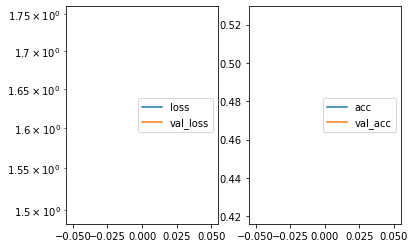

Predicted cell: Cells Probability: [[0.7606081]]
True Cell type: Cells
x [[0.7611768]]
True positional value x 0.5
y [[0.7218626]]
True positional value y 0.7083333333333334


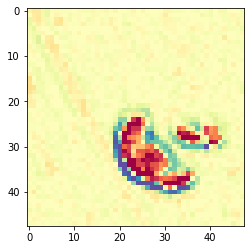

Epoch 2/250
5180/5180 [==============================] - 5s 1ms/step - loss: 1.2298 - acc: 0.6566 - val_loss: 1.0253 - val_acc: 0.8718

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 1.0252528590160412, 'val_acc': 0.8717948894797664, 'loss': 1.22981319303218, 'acc': 0.656563702007058, 'lr': 1e-06}


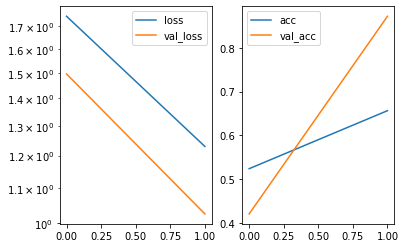

Predicted cell: Cells Probability: [[0.80351746]]
True Cell type: Cells
x [[0.33646268]]
True positional value x 0.7083333333333334
y [[0.30064636]]
True positional value y 0.7083333333333334


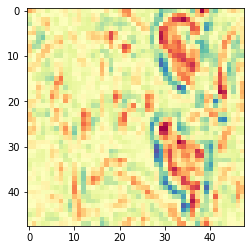

Epoch 3/250
5180/5180 [==============================] - 5s 1ms/step - loss: 0.9343 - acc: 0.8683 - val_loss: 0.8825 - val_acc: 0.8608

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8825360412126059, 'val_acc': 0.8608058671374897, 'loss': 0.9342966597512882, 'acc': 0.8683397712394537, 'lr': 1e-06}


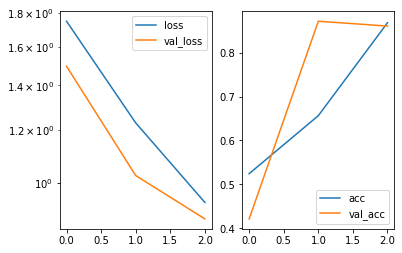

Predicted cell: Cells Probability: [[0.952682]]
True Cell type: Cells
x [[0.7903794]]
True positional value x 0.5
y [[0.70731354]]
True positional value y 0.7083333333333334


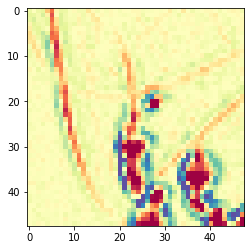

Epoch 4/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.8403 - acc: 0.8552 - val_loss: 0.8407 - val_acc: 0.8901

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8406738435829079, 'val_acc': 0.8901098853065854, 'loss': 0.8403463547754472, 'acc': 0.8552123542918202, 'lr': 1e-06}


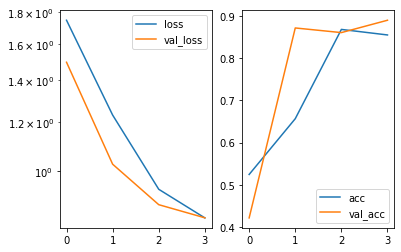

Predicted cell: Cells Probability: [[0.5276788]]
True Cell type: Normal
x [[0.58291894]]
True positional value x 0.5
y [[0.48353767]]
True positional value y 0.5


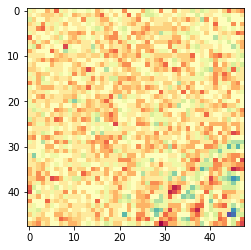

Epoch 5/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.7891 - acc: 0.9183 - val_loss: 0.8150 - val_acc: 0.8938

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8149855106304853, 'val_acc': 0.8937728963928782, 'loss': 0.789146489388234, 'acc': 0.9183397695824906, 'lr': 1e-06}


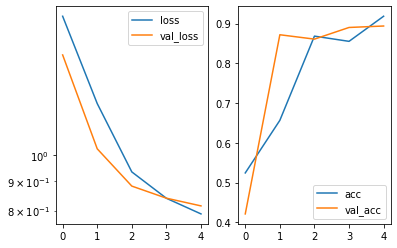

Predicted cell: Cells Probability: [[0.917737]]
True Cell type: Cells
x [[0.8068318]]
True positional value x 0.7083333333333334
y [[0.09011795]]
True positional value y 0.2916666666666667


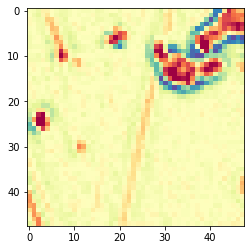

Epoch 6/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.7431 - acc: 0.9261 - val_loss: 0.7792 - val_acc: 0.9414

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7792214917175936, 'val_acc': 0.941391931785332, 'loss': 0.7430875814559377, 'acc': 0.926061777764766, 'lr': 1e-06}


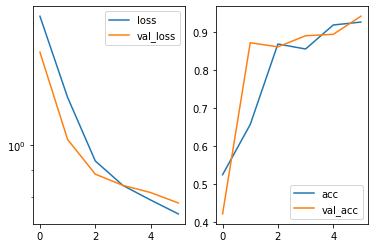

Predicted cell: Cells Probability: [[0.9857507]]
True Cell type: Cells
x [[0.8592646]]
True positional value x 0.7083333333333334
y [[0.5111632]]
True positional value y 0.5


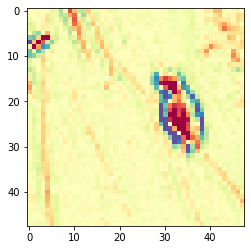

Epoch 7/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.6972 - acc: 0.9571 - val_loss: 0.7469 - val_acc: 0.9744

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7468669383953779, 'val_acc': 0.9743589878955603, 'loss': 0.6971509578605416, 'acc': 0.9571428577412049, 'lr': 1e-06}


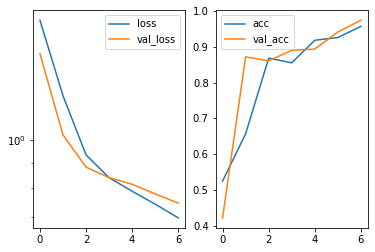

Predicted cell: Cells Probability: [[0.97430485]]
True Cell type: Cells
x [[0.5785391]]
True positional value x 0.5
y [[0.68320084]]
True positional value y 0.5


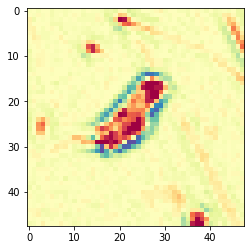

Epoch 8/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.6590 - acc: 0.9610 - val_loss: 0.7302 - val_acc: 0.9817

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7301921259352576, 'val_acc': 0.9816849936932435, 'loss': 0.6589742705628678, 'acc': 0.9610038590707374, 'lr': 1e-06}


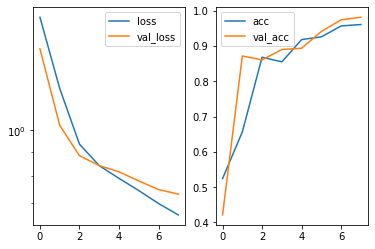

Predicted cell: Cells Probability: [[0.9060567]]
True Cell type: Cells
x [[0.69348955]]
True positional value x 0.5
y [[0.5768965]]
True positional value y 0.7083333333333334


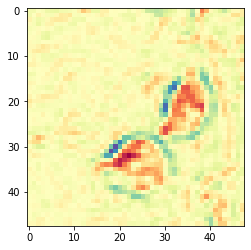

Epoch 9/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.6323 - acc: 0.9645 - val_loss: 0.7248 - val_acc: 0.9744

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.724826788290953, 'val_acc': 0.9743589878955603, 'loss': 0.6323193334704661, 'acc': 0.9644787709685366, 'lr': 1e-06}


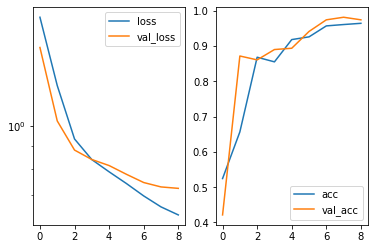

Predicted cell: Cells Probability: [[0.99951553]]
True Cell type: Cells
x [[0.16481817]]
True positional value x 0.5
y [[0.14961912]]
True positional value y 0.2916666666666667


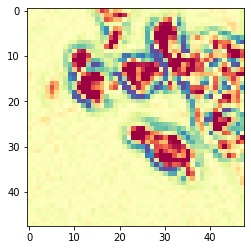

Epoch 10/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.6116 - acc: 0.9651 - val_loss: 0.7226 - val_acc: 0.9744

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7225922512047457, 'val_acc': 0.9743589878955603, 'loss': 0.6116004234115129, 'acc': 0.9650579207652324, 'lr': 1e-06}


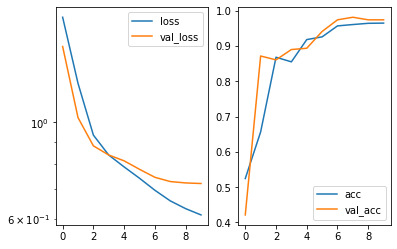

Predicted cell: Cells Probability: [[0.9487081]]
True Cell type: Cells
x [[0.43973124]]
True positional value x 0.7083333333333334
y [[0.56019527]]
True positional value y 0.7083333333333334


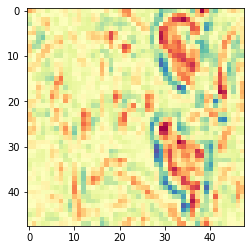

Epoch 11/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5964 - acc: 0.9668 - val_loss: 0.7176 - val_acc: 0.9744

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7175868129555559, 'val_acc': 0.9743589878955603, 'loss': 0.5963778567130041, 'acc': 0.9667953696950522, 'lr': 1e-06}


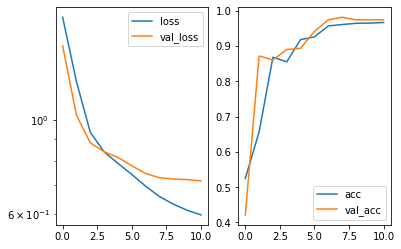

Predicted cell: Cells Probability: [[0.9462226]]
True Cell type: Cells
x [[0.2880279]]
True positional value x 0.5
y [[0.28277403]]
True positional value y 0.2916666666666667


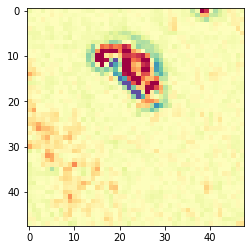

Epoch 12/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5778 - acc: 0.9672 - val_loss: 0.7109 - val_acc: 0.9744

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7109414439498286, 'val_acc': 0.9743589878955603, 'loss': 0.5778274285287011, 'acc': 0.9671814710937412, 'lr': 1e-06}


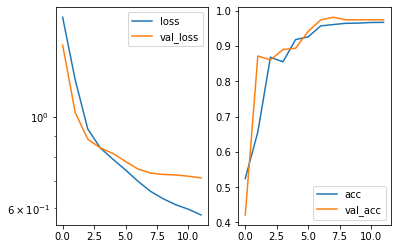

Predicted cell: Normal Probability: [[0.64066243]]
True Cell type: Normal
x [[0.5082635]]
True positional value x 0.5
y [[0.5022698]]
True positional value y 0.5


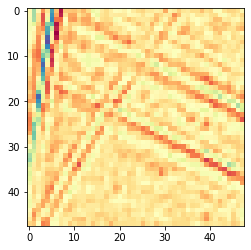

Epoch 13/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5637 - acc: 0.9676 - val_loss: 0.7052 - val_acc: 0.9744

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7051513347870264, 'val_acc': 0.9743589878955603, 'loss': 0.5636730928218503, 'acc': 0.9675675734129652, 'lr': 1e-06}


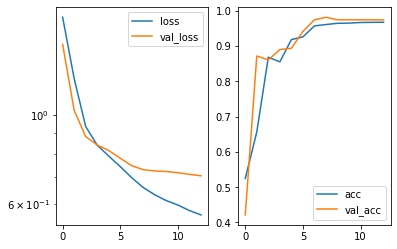

Predicted cell: Cells Probability: [[0.99152726]]
True Cell type: Cells
x [[0.17622316]]
True positional value x 0.5
y [[0.39967525]]
True positional value y 0.5


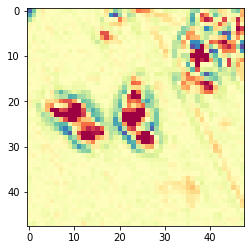

Epoch 14/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5539 - acc: 0.9687 - val_loss: 0.7001 - val_acc: 0.9744

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7001396808432135, 'val_acc': 0.9743589878955603, 'loss': 0.5539456679554059, 'acc': 0.9687258757679619, 'lr': 1e-06}


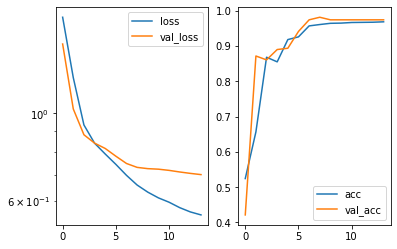

Predicted cell: Cells Probability: [[0.9661303]]
True Cell type: Cells
x [[0.1668212]]
True positional value x 0.7083333333333334
y [[0.35931316]]
True positional value y 0.5


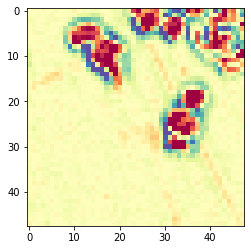

Epoch 15/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5424 - acc: 0.9687 - val_loss: 0.6959 - val_acc: 0.9744

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6959397615967217, 'val_acc': 0.9743589878955603, 'loss': 0.5423954988768662, 'acc': 0.968725876688497, 'lr': 1e-06}


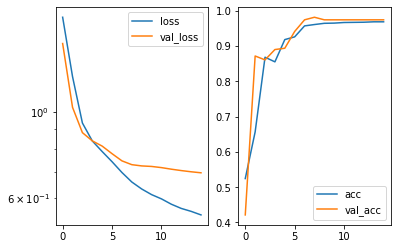

Predicted cell: Cells Probability: [[0.94188935]]
True Cell type: Cells
x [[0.25962695]]
True positional value x 0.5
y [[0.21998577]]
True positional value y 0.2916666666666667


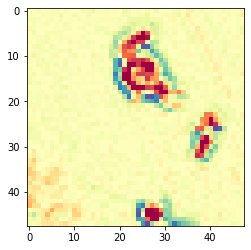

Epoch 16/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5317 - acc: 0.9685 - val_loss: 0.6928 - val_acc: 0.9780

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6927588728321341, 'val_acc': 0.9780219880652515, 'loss': 0.5317075265190316, 'acc': 0.9685328266795538, 'lr': 1e-06}


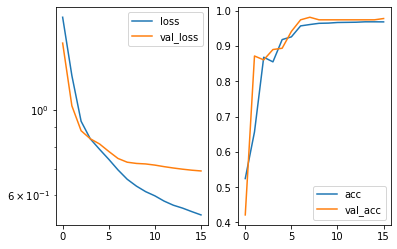

Predicted cell: Cells Probability: [[0.9443861]]
True Cell type: Cells
x [[0.51473147]]
True positional value x 0.2916666666666667
y [[0.70640045]]
True positional value y 0.5


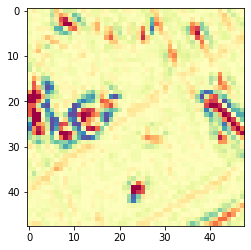

Epoch 17/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5266 - acc: 0.9681 - val_loss: 0.6908 - val_acc: 0.9780

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6908320994167537, 'val_acc': 0.9780219880652515, 'loss': 0.5265875855698089, 'acc': 0.9681467268918011, 'lr': 1e-06}


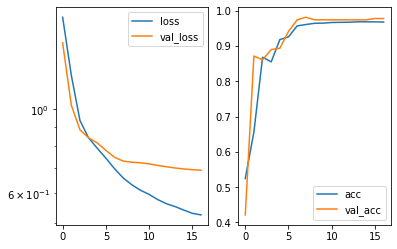

Predicted cell: Cells Probability: [[0.94197565]]
True Cell type: Cells
x [[0.79399735]]
True positional value x 0.7083333333333334
y [[0.39316013]]
True positional value y 0.2916666666666667


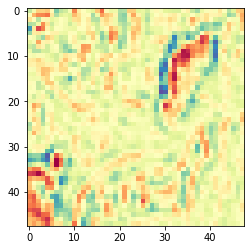

Epoch 18/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5178 - acc: 0.9699 - val_loss: 0.6887 - val_acc: 0.9780

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6887202963724242, 'val_acc': 0.9780219880652515, 'loss': 0.5178310267023138, 'acc': 0.9698841804242962, 'lr': 1e-06}


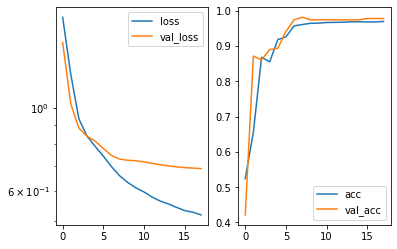

Predicted cell: Cells Probability: [[0.9852475]]
True Cell type: Cells
x [[0.66568315]]
True positional value x 0.7083333333333334
y [[0.5197319]]
True positional value y 0.2916666666666667


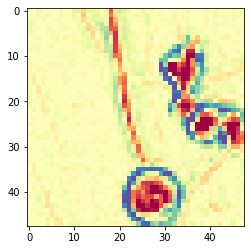

Epoch 19/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5101 - acc: 0.9707 - val_loss: 0.6866 - val_acc: 0.9780

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6865560449523367, 'val_acc': 0.9780219880652515, 'loss': 0.5101495160789563, 'acc': 0.9706563793094002, 'lr': 1e-06}


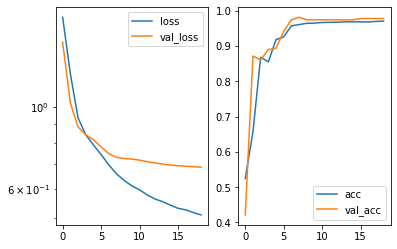

Predicted cell: Cells Probability: [[0.9885898]]
True Cell type: Cells
x [[0.32907063]]
True positional value x 0.7083333333333334
y [[0.8263076]]
True positional value y 0.7083333333333334


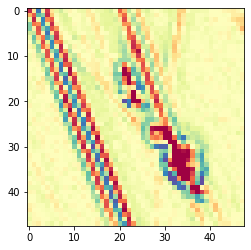

Epoch 20/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.5041 - acc: 0.9714 - val_loss: 0.6852 - val_acc: 0.9780

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6852002360008576, 'val_acc': 0.9780219880652515, 'loss': 0.5041014924933092, 'acc': 0.9714285793451729, 'lr': 1e-06}


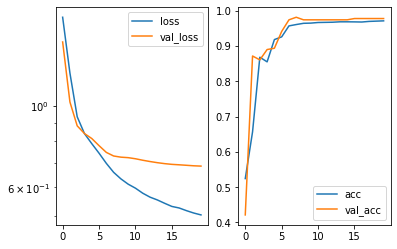

Predicted cell: Cells Probability: [[0.9805871]]
True Cell type: Cells
x [[0.6386857]]
True positional value x 0.7083333333333334
y [[0.7570968]]
True positional value y 0.7083333333333334


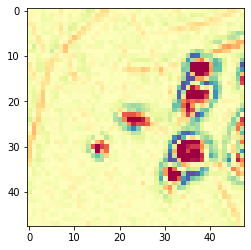

Epoch 21/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4981 - acc: 0.9714 - val_loss: 0.6835 - val_acc: 0.9780

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6834822764326801, 'val_acc': 0.9780219880652515, 'loss': 0.498079612218275, 'acc': 0.9714285791150391, 'lr': 1e-06}


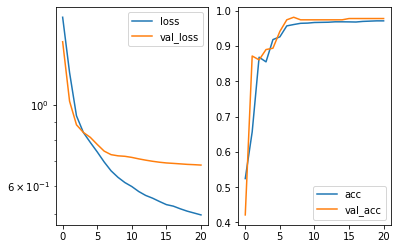

Predicted cell: Cells Probability: [[0.6922391]]
True Cell type: Normal
x [[0.46257627]]
True positional value x 0.5
y [[0.60002214]]
True positional value y 0.5


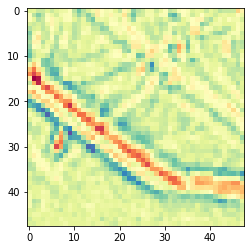

Epoch 22/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4953 - acc: 0.9722 - val_loss: 0.6819 - val_acc: 0.9780

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6819346560226692, 'val_acc': 0.9780219880652515, 'loss': 0.4952960450446744, 'acc': 0.9722007782302768, 'lr': 1e-06}


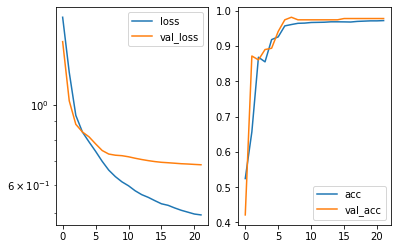

Predicted cell: Normal Probability: [[0.701132]]
True Cell type: Normal
x [[0.5048087]]
True positional value x 0.5
y [[0.5134561]]
True positional value y 0.5


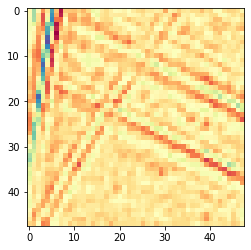

Epoch 23/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4890 - acc: 0.9720 - val_loss: 0.6802 - val_acc: 0.9780

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6802308762466515, 'val_acc': 0.9780219880652515, 'loss': 0.48896386390947466, 'acc': 0.9720077282213336, 'lr': 1e-06}


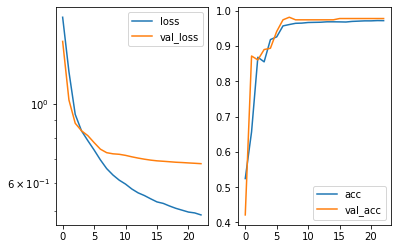

Predicted cell: Cells Probability: [[0.9905714]]
True Cell type: Cells
x [[0.87130415]]
True positional value x 0.5
y [[0.58035374]]
True positional value y 0.7083333333333334


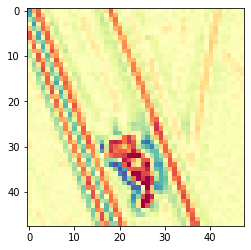

Epoch 24/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4844 - acc: 0.9722 - val_loss: 0.6790 - val_acc: 0.9780

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6790406188685378, 'val_acc': 0.9780219880652515, 'loss': 0.4844340397814526, 'acc': 0.972200778000143, 'lr': 1e-06}


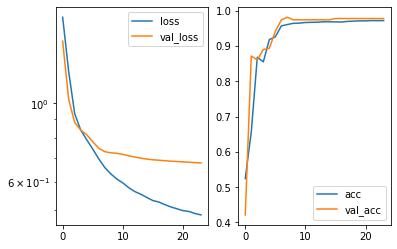

Predicted cell: Normal Probability: [[0.96952003]]
True Cell type: Normal
x [[0.43236816]]
True positional value x 0.5
y [[0.46901998]]
True positional value y 0.5


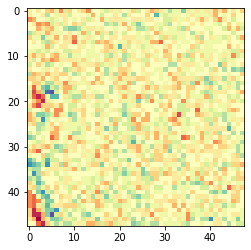

Epoch 25/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4808 - acc: 0.9724 - val_loss: 0.6775 - val_acc: 0.9780

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6774863640030662, 'val_acc': 0.9780219880652515, 'loss': 0.4808193202414568, 'acc': 0.9723938282392199, 'lr': 1e-06}


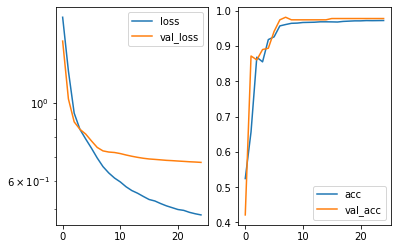

Predicted cell: Normal Probability: [[0.73741996]]
True Cell type: Normal
x [[0.3975208]]
True positional value x 0.5
y [[0.50077784]]
True positional value y 0.5


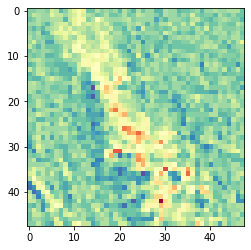

Epoch 26/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4765 - acc: 0.9728 - val_loss: 0.6764 - val_acc: 0.9780

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6763891453271383, 'val_acc': 0.9780219880652515, 'loss': 0.4764613360741884, 'acc': 0.9727799328597816, 'lr': 1e-06}


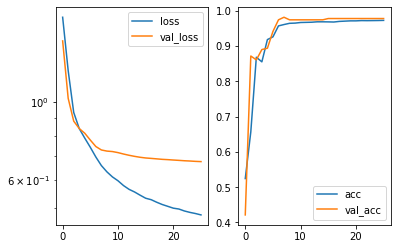

Predicted cell: Normal Probability: [[0.9427858]]
True Cell type: Normal
x [[0.57309246]]
True positional value x 0.5
y [[0.45374367]]
True positional value y 0.5


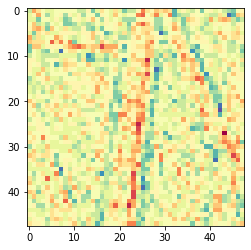

Epoch 27/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4729 - acc: 0.9741 - val_loss: 0.6759 - val_acc: 0.9780

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6758781579824594, 'val_acc': 0.9780219880652515, 'loss': 0.47293489469524513, 'acc': 0.9741312861442566, 'lr': 1e-06}


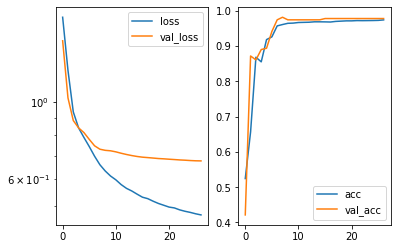

Predicted cell: Cells Probability: [[0.96178436]]
True Cell type: Cells
x [[0.26464093]]
True positional value x 0.5
y [[0.40911713]]
True positional value y 0.5


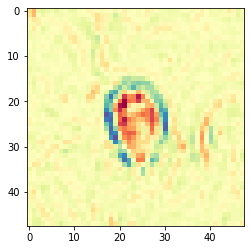

Epoch 28/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4686 - acc: 0.9743 - val_loss: 0.6751 - val_acc: 0.9780

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.675054554537539, 'val_acc': 0.9780219880652515, 'loss': 0.4685697441625779, 'acc': 0.9743243338518621, 'lr': 1e-06}


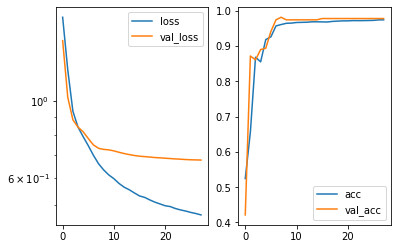

Predicted cell: Cells Probability: [[0.9708675]]
True Cell type: Cells
x [[0.44278827]]
True positional value x 0.2916666666666667
y [[0.69896996]]
True positional value y 0.7083333333333334


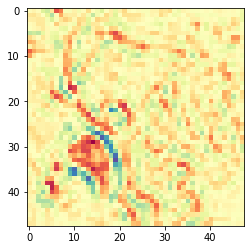

Epoch 29/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4645 - acc: 0.9739 - val_loss: 0.6741 - val_acc: 0.9780

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6741130714451437, 'val_acc': 0.9780219880652515, 'loss': 0.4645169036728995, 'acc': 0.9739382352147784, 'lr': 1e-06}


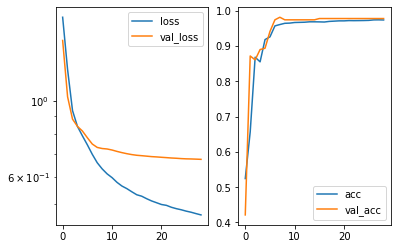

Predicted cell: Cells Probability: [[0.9520415]]
True Cell type: Cells
x [[0.15482287]]
True positional value x 0.2916666666666667
y [[0.462652]]
True positional value y 0.2916666666666667


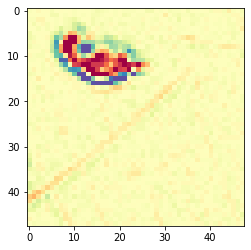

Epoch 30/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4638 - acc: 0.9743 - val_loss: 0.6737 - val_acc: 0.9780

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6736766698159578, 'val_acc': 0.9780219880652515, 'loss': 0.4638357916163662, 'acc': 0.9743243338518621, 'lr': 1e-06}


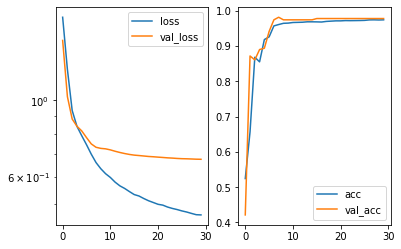

Predicted cell: Cells Probability: [[0.9907776]]
True Cell type: Cells
x [[0.66385347]]
True positional value x 0.5
y [[0.6516466]]
True positional value y 0.7083333333333334


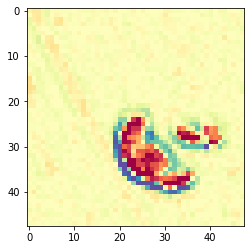

Epoch 31/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4587 - acc: 0.9741 - val_loss: 0.6731 - val_acc: 0.9780

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6730917685634488, 'val_acc': 0.9780219880652515, 'loss': 0.45868949149106, 'acc': 0.9741312826922501, 'lr': 1e-06}


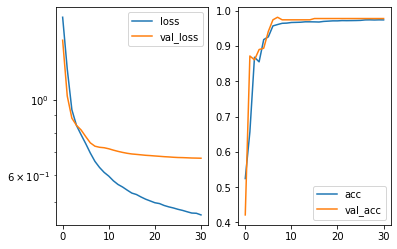

Predicted cell: Cells Probability: [[0.95174015]]
True Cell type: Cells
x [[0.30610314]]
True positional value x 0.5
y [[0.38045257]]
True positional value y 0.2916666666666667


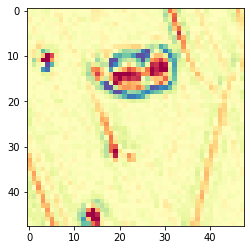

Epoch 32/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4578 - acc: 0.9741 - val_loss: 0.6726 - val_acc: 0.9780

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6725768573554881, 'val_acc': 0.9780219880652515, 'loss': 0.45784785457559535, 'acc': 0.9741312803909125, 'lr': 1e-06}


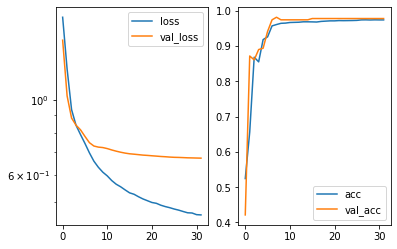

Predicted cell: Cells Probability: [[0.9873946]]
True Cell type: Cells
x [[0.59575474]]
True positional value x 0.5
y [[0.7328927]]
True positional value y 0.5


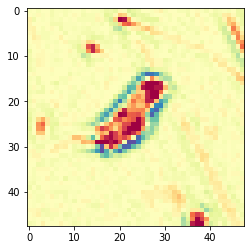

Epoch 33/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4553 - acc: 0.9743 - val_loss: 0.6717 - val_acc: 0.9780

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6717067360877991, 'val_acc': 0.9780219880652515, 'loss': 0.455348774157896, 'acc': 0.9743243350025309, 'lr': 1e-06}


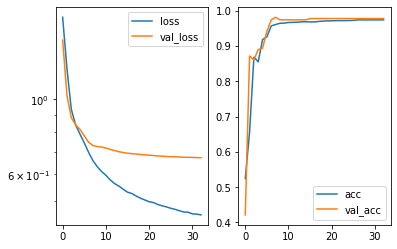

Predicted cell: Cells Probability: [[0.99364245]]
True Cell type: Cells
x [[0.35547227]]
True positional value x 0.7083333333333334
y [[0.69347084]]
True positional value y 0.7083333333333334


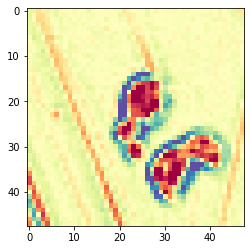

Epoch 34/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4514 - acc: 0.9732 - val_loss: 0.6709 - val_acc: 0.9780

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6709310508473015, 'val_acc': 0.9780219880652515, 'loss': 0.4514465344688607, 'acc': 0.973166033798203, 'lr': 1e-06}


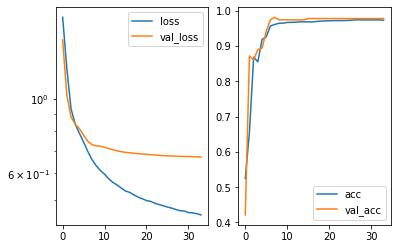

Predicted cell: Cells Probability: [[0.92397994]]
True Cell type: Normal
x [[0.64820015]]
True positional value x 0.5
y [[0.5414903]]
True positional value y 0.5


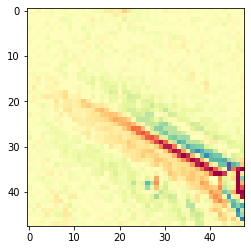

Epoch 35/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4490 - acc: 0.9747 - val_loss: 0.6705 - val_acc: 0.9780

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.670524789300157, 'val_acc': 0.9780219880652515, 'loss': 0.44903916557783324, 'acc': 0.9747104338697485, 'lr': 1e-06}


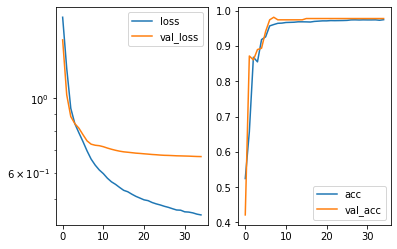

Predicted cell: Cells Probability: [[0.9972274]]
True Cell type: Cells
x [[0.77775234]]
True positional value x 0.7083333333333334
y [[0.67564344]]
True positional value y 0.7083333333333334


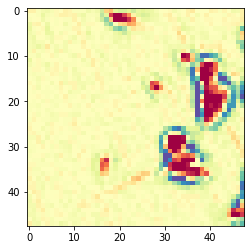

Epoch 36/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4458 - acc: 0.9753 - val_loss: 0.6701 - val_acc: 0.9780

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.670099641377236, 'val_acc': 0.9780219880652515, 'loss': 0.44581890658522205, 'acc': 0.9752895864280494, 'lr': 1e-06}


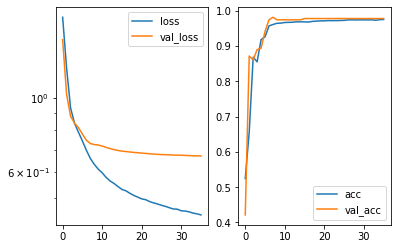

Predicted cell: Cells Probability: [[0.9938613]]
True Cell type: Cells
x [[0.62640953]]
True positional value x 0.2916666666666667
y [[0.39965072]]
True positional value y 0.7083333333333334


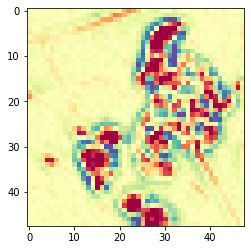

Epoch 37/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4456 - acc: 0.9743 - val_loss: 0.6701 - val_acc: 0.9780

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6700897136014023, 'val_acc': 0.9780219880652515, 'loss': 0.44561663902864496, 'acc': 0.9743243373038686, 'lr': 1e-06}


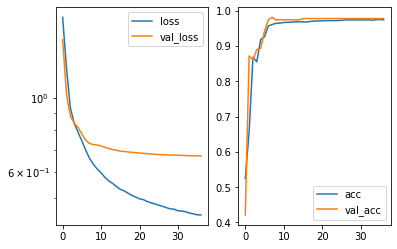

Predicted cell: Cells Probability: [[0.9965372]]
True Cell type: Cells
x [[0.37417063]]
True positional value x 0.2916666666666667
y [[0.5915524]]
True positional value y 0.5


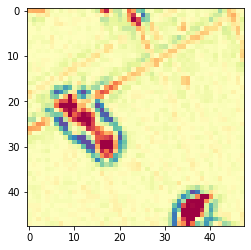

Epoch 38/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4424 - acc: 0.9749 - val_loss: 0.6696 - val_acc: 0.9780

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6696143881741897, 'val_acc': 0.9780219880652515, 'loss': 0.44237880403010543, 'acc': 0.9749034850293605, 'lr': 1e-06}


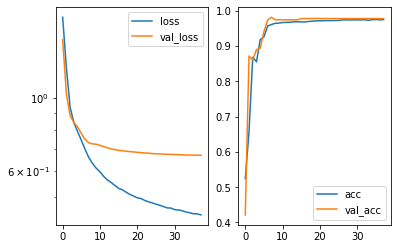

Predicted cell: Cells Probability: [[0.9051177]]
True Cell type: Cells
x [[0.8550999]]
True positional value x 0.7083333333333334
y [[0.34228256]]
True positional value y 0.2916666666666667


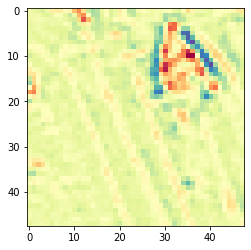

Epoch 39/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4394 - acc: 0.9753 - val_loss: 0.6691 - val_acc: 0.9780

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6691140700609256, 'val_acc': 0.9780219880652515, 'loss': 0.4393598512102738, 'acc': 0.9752895852773806, 'lr': 1e-06}


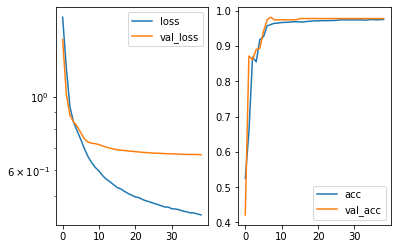

Predicted cell: Cells Probability: [[0.9959507]]
True Cell type: Cells
x [[0.47768232]]
True positional value x 0.5
y [[0.5697622]]
True positional value y 0.5


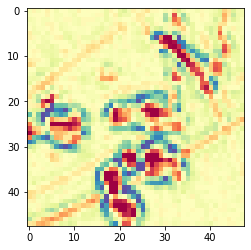

Epoch 40/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4377 - acc: 0.9751 - val_loss: 0.6684 - val_acc: 0.9780

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6683612247526427, 'val_acc': 0.9780219880652515, 'loss': 0.43770181212185894, 'acc': 0.9750965373396413, 'lr': 1e-06}


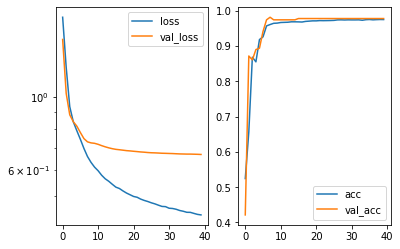

Predicted cell: Normal Probability: [[0.98598886]]
True Cell type: Normal
x [[0.5458142]]
True positional value x 0.5
y [[0.5016729]]
True positional value y 0.5


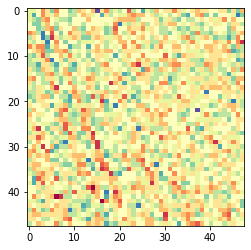

Epoch 41/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4355 - acc: 0.9759 - val_loss: 0.6680 - val_acc: 0.9780

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6680105003245148, 'val_acc': 0.9780219880652515, 'loss': 0.43553305293602373, 'acc': 0.9758687353042101, 'lr': 1e-06}


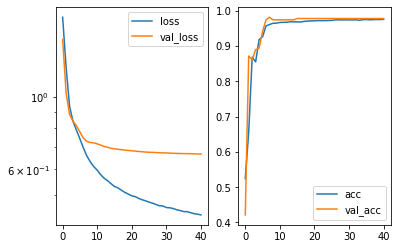

Predicted cell: Cells Probability: [[0.94716966]]
True Cell type: Cells
x [[0.64180183]]
True positional value x 0.7083333333333334
y [[0.5658823]]
True positional value y 0.5


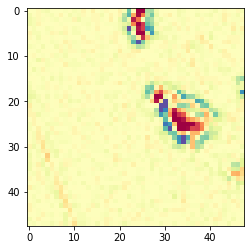

Epoch 42/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4345 - acc: 0.9757 - val_loss: 0.6677 - val_acc: 0.9780

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6676874234999493, 'val_acc': 0.9780219880652515, 'loss': 0.4345135730205816, 'acc': 0.9756756850651332, 'lr': 1e-06}


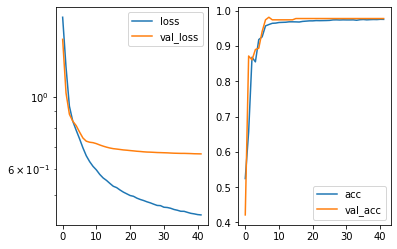

Predicted cell: Cells Probability: [[0.98646045]]
True Cell type: Cells
x [[0.34947652]]
True positional value x 0.2916666666666667
y [[0.60282266]]
True positional value y 0.7083333333333334


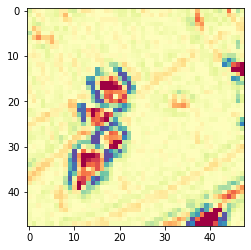

Epoch 43/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4331 - acc: 0.9759 - val_loss: 0.6675 - val_acc: 0.9780

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6674843299519885, 'val_acc': 0.9780219880652515, 'loss': 0.4331287429829822, 'acc': 0.9758687307015349, 'lr': 1e-06}


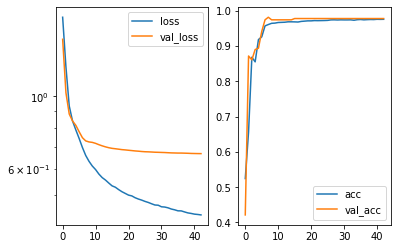

Predicted cell: Cells Probability: [[0.9881761]]
True Cell type: Cells
x [[0.41586643]]
True positional value x 0.7083333333333334
y [[0.6309752]]
True positional value y 0.2916666666666667


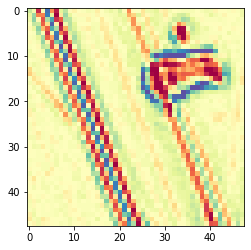

Epoch 44/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4307 - acc: 0.9763 - val_loss: 0.6672 - val_acc: 0.9817

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6672134945244143, 'val_acc': 0.9816849936932435, 'loss': 0.4307466568173589, 'acc': 0.9762548373933004, 'lr': 1e-06}


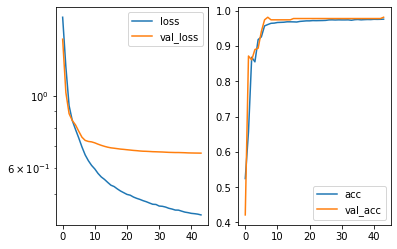

Predicted cell: Cells Probability: [[0.98580927]]
True Cell type: Cells
x [[0.14921002]]
True positional value x 0.2916666666666667
y [[0.6574639]]
True positional value y 0.7083333333333334


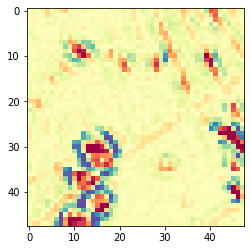

Epoch 45/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4292 - acc: 0.9761 - val_loss: 0.6667 - val_acc: 0.9817

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6666704990488269, 'val_acc': 0.9816849936932435, 'loss': 0.42923919091353546, 'acc': 0.976061787614491, 'lr': 1e-06}


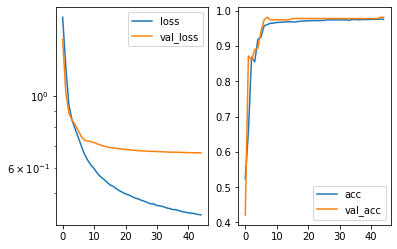

Predicted cell: Cells Probability: [[0.93178904]]
True Cell type: Normal
x [[0.63771385]]
True positional value x 0.5
y [[0.541626]]
True positional value y 0.5


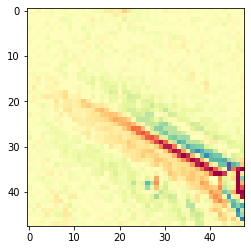

Epoch 46/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4255 - acc: 0.9763 - val_loss: 0.6664 - val_acc: 0.9817

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.666377767101749, 'val_acc': 0.9816849936932435, 'loss': 0.4255409209654598, 'acc': 0.9762548327906252, 'lr': 1e-06}


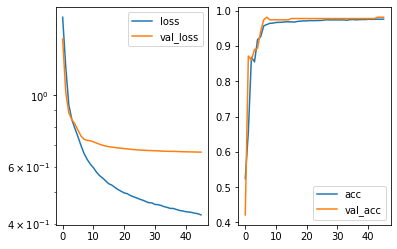

Predicted cell: Cells Probability: [[0.9861341]]
True Cell type: Cells
x [[0.69306254]]
True positional value x 0.7083333333333334
y [[0.16014479]]
True positional value y 0.5


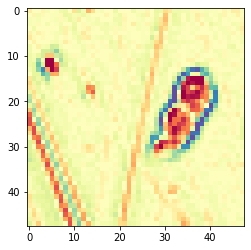

Epoch 47/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4250 - acc: 0.9764 - val_loss: 0.6658 - val_acc: 0.9817

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6657646708872729, 'val_acc': 0.9816849936932435, 'loss': 0.4250383986929669, 'acc': 0.9764478885529124, 'lr': 1e-06}


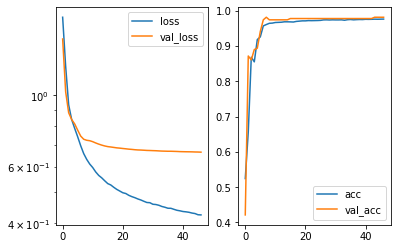

Predicted cell: Cells Probability: [[0.9721639]]
True Cell type: Cells
x [[0.642702]]
True positional value x 0.7083333333333334
y [[0.40147412]]
True positional value y 0.7083333333333334


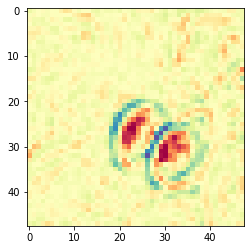

Epoch 48/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4224 - acc: 0.9766 - val_loss: 0.6659 - val_acc: 0.9817

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6659030802957304, 'val_acc': 0.9816849936932435, 'loss': 0.42237709802089973, 'acc': 0.9766409374111867, 'lr': 1e-06}


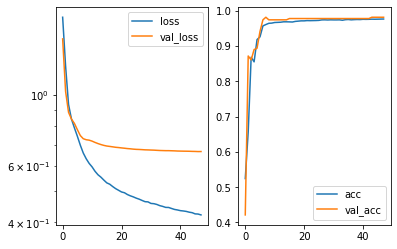

Predicted cell: Cells Probability: [[0.8394824]]
True Cell type: Cells
x [[0.46049666]]
True positional value x 0.5
y [[0.46461058]]
True positional value y 0.5


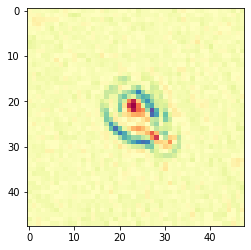

Epoch 49/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4221 - acc: 0.9770 - val_loss: 0.6654 - val_acc: 0.9817

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6654419150107946, 'val_acc': 0.9816849936932435, 'loss': 0.4220750285851909, 'acc': 0.9770270362784044, 'lr': 1e-06}


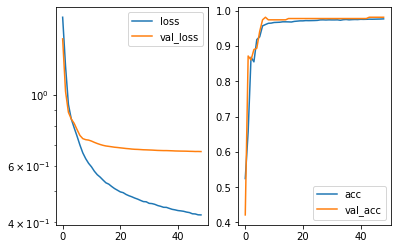

Predicted cell: Cells Probability: [[0.9202034]]
True Cell type: Cells
x [[0.8548111]]
True positional value x 0.7083333333333334
y [[0.34937945]]
True positional value y 0.2916666666666667


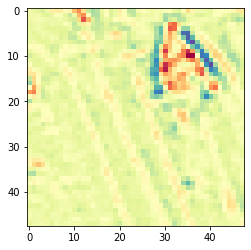

Epoch 50/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4193 - acc: 0.9774 - val_loss: 0.6652 - val_acc: 0.9817

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6651571703044487, 'val_acc': 0.9816849936932435, 'loss': 0.4193334874038991, 'acc': 0.9774131432003036, 'lr': 1e-06}


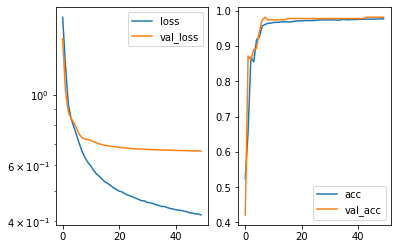

Predicted cell: Cells Probability: [[0.9980118]]
True Cell type: Cells
x [[0.21220642]]
True positional value x 0.2916666666666667
y [[0.8420873]]
True positional value y 0.7083333333333334


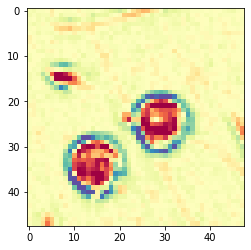

Epoch 51/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4189 - acc: 0.9774 - val_loss: 0.6649 - val_acc: 0.9817

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6649276319440904, 'val_acc': 0.9816849936932435, 'loss': 0.4189423039613083, 'acc': 0.9774131374469595, 'lr': 1e-06}


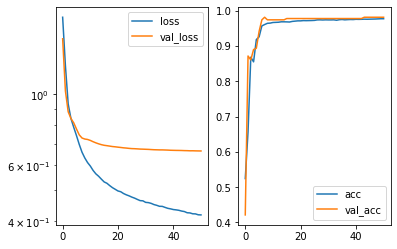

Predicted cell: Cells Probability: [[0.99910563]]
True Cell type: Cells
x [[0.85642725]]
True positional value x 0.2916666666666667
y [[0.20482586]]
True positional value y 0.5


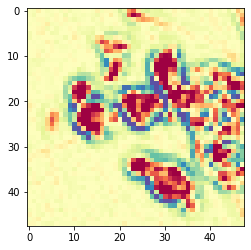

Epoch 52/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4176 - acc: 0.9784 - val_loss: 0.6649 - val_acc: 0.9817

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6648991749836848, 'val_acc': 0.9816849936932435, 'loss': 0.417611614387468, 'acc': 0.9783783886423443, 'lr': 1e-06}


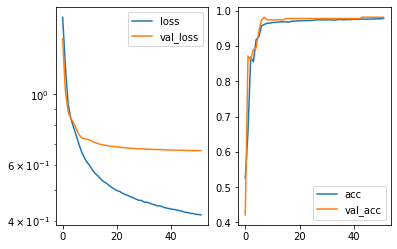

Predicted cell: Cells Probability: [[0.98721296]]
True Cell type: Cells
x [[0.33551797]]
True positional value x 0.7083333333333334
y [[0.36640456]]
True positional value y 0.2916666666666667


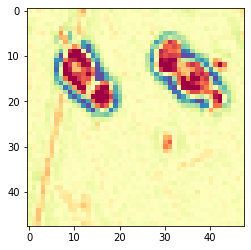

Epoch 53/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4162 - acc: 0.9770 - val_loss: 0.6648 - val_acc: 0.9817

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6647953168376461, 'val_acc': 0.9816849936932435, 'loss': 0.4162498668814258, 'acc': 0.9770270385797419, 'lr': 1e-06}


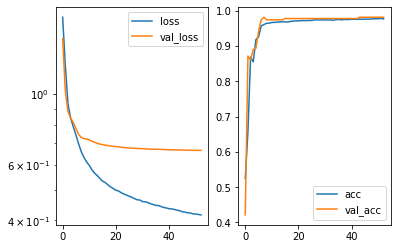

Predicted cell: Cells Probability: [[0.9935189]]
True Cell type: Cells
x [[0.3094035]]
True positional value x 0.2916666666666667
y [[0.669751]]
True positional value y 0.7083333333333334


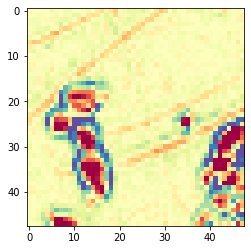

Epoch 54/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4155 - acc: 0.9784 - val_loss: 0.6642 - val_acc: 0.9817

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6641636541038206, 'val_acc': 0.9816849936932435, 'loss': 0.41553950275233353, 'acc': 0.9783783863410066, 'lr': 1e-06}


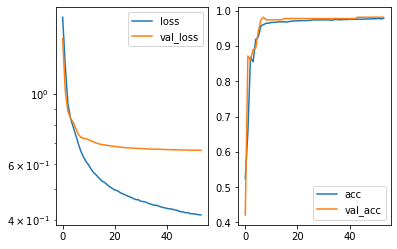

Predicted cell: Cells Probability: [[0.9854152]]
True Cell type: Cells
x [[0.90637845]]
True positional value x 0.7083333333333334
y [[0.69309634]]
True positional value y 0.7083333333333334


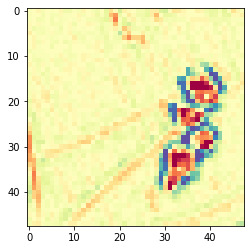

Epoch 55/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4144 - acc: 0.9770 - val_loss: 0.6637 - val_acc: 0.9817

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6636546562006186, 'val_acc': 0.9816849936932435, 'loss': 0.4144059358646511, 'acc': 0.9770270351277355, 'lr': 1e-06}


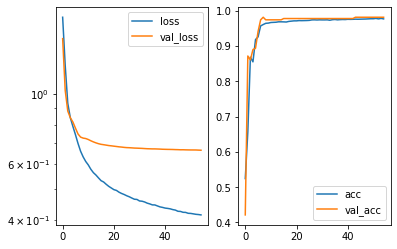

Predicted cell: Cells Probability: [[0.94802076]]
True Cell type: Cells
x [[0.17726636]]
True positional value x 0.2916666666666667
y [[0.6204045]]
True positional value y 0.5


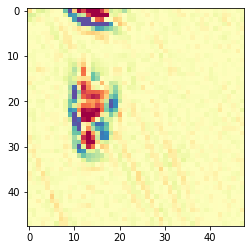

Epoch 56/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4127 - acc: 0.9793 - val_loss: 0.6635 - val_acc: 0.9817

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6635450284122985, 'val_acc': 0.9816849936932435, 'loss': 0.41273036173411776, 'acc': 0.9793436400678627, 'lr': 1e-06}


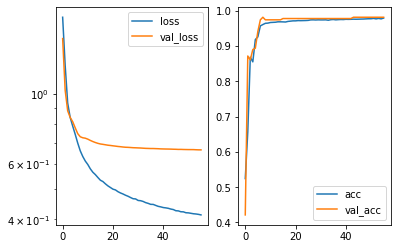

Predicted cell: Cells Probability: [[0.94400704]]
True Cell type: Cells
x [[0.7146107]]
True positional value x 0.7083333333333334
y [[0.2954723]]
True positional value y 0.5


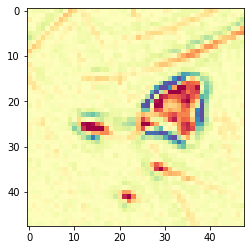

Epoch 57/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4109 - acc: 0.9784 - val_loss: 0.6635 - val_acc: 0.9817

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6635058594273997, 'val_acc': 0.9816849936932435, 'loss': 0.4108508137202171, 'acc': 0.9783783863410066, 'lr': 1e-06}


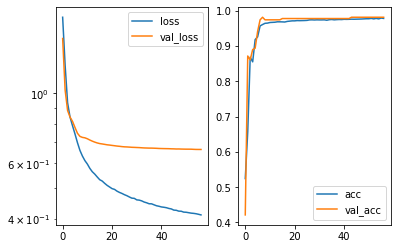

Predicted cell: Cells Probability: [[0.9804745]]
True Cell type: Cells
x [[0.27544504]]
True positional value x 0.7083333333333334
y [[0.69528127]]
True positional value y 0.7083333333333334


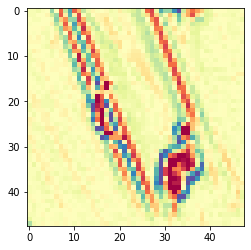

Epoch 58/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4096 - acc: 0.9788 - val_loss: 0.6629 - val_acc: 0.9817

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.662920471076127, 'val_acc': 0.9816849936932435, 'loss': 0.40958944135651165, 'acc': 0.978764486358893, 'lr': 1e-06}


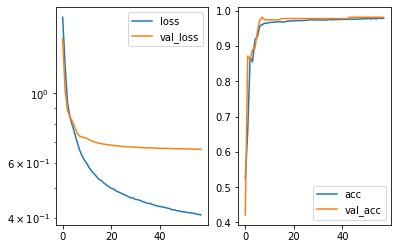

Predicted cell: Normal Probability: [[0.9692488]]
True Cell type: Normal
x [[0.4962998]]
True positional value x 0.5
y [[0.52785593]]
True positional value y 0.5


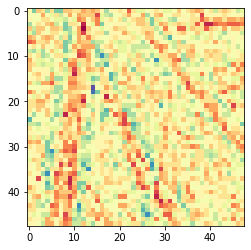

Epoch 59/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4073 - acc: 0.9795 - val_loss: 0.6626 - val_acc: 0.9817

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6626149824250749, 'val_acc': 0.9816849936932435, 'loss': 0.40733220034124307, 'acc': 0.9795366921480098, 'lr': 1e-06}


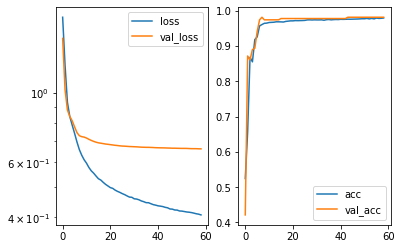

Predicted cell: Cells Probability: [[0.9875124]]
True Cell type: Cells
x [[0.51498]]
True positional value x 0.5
y [[0.6733693]]
True positional value y 0.5


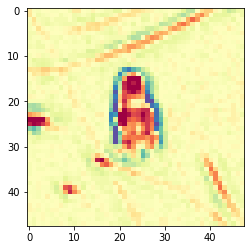

Epoch 60/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4091 - acc: 0.9778 - val_loss: 0.6628 - val_acc: 0.9817

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6628419983954656, 'val_acc': 0.9816849936932435, 'loss': 0.4090604454163879, 'acc': 0.9777992388456485, 'lr': 1e-06}


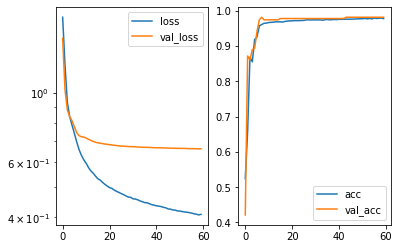

Predicted cell: Cells Probability: [[0.96818906]]
True Cell type: Cells
x [[0.68787646]]
True positional value x 0.7083333333333334
y [[0.8557131]]
True positional value y 0.7083333333333334


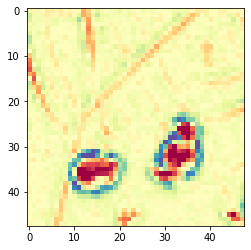

Epoch 61/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4069 - acc: 0.9795 - val_loss: 0.6624 - val_acc: 0.9817

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6624453017563173, 'val_acc': 0.9816849936932435, 'loss': 0.4068544474807945, 'acc': 0.979536690997341, 'lr': 1e-06}


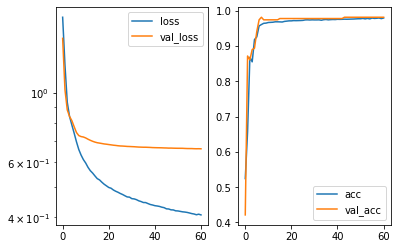

Predicted cell: Normal Probability: [[0.98920023]]
True Cell type: Normal
x [[0.55223453]]
True positional value x 0.5
y [[0.49749184]]
True positional value y 0.5


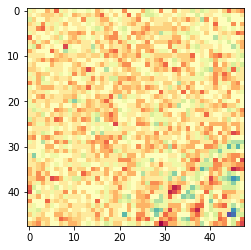

Epoch 62/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4045 - acc: 0.9792 - val_loss: 0.6624 - val_acc: 0.9817

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6623884646883814, 'val_acc': 0.9816849936932435, 'loss': 0.40445992108937856, 'acc': 0.9791505877575819, 'lr': 1e-06}


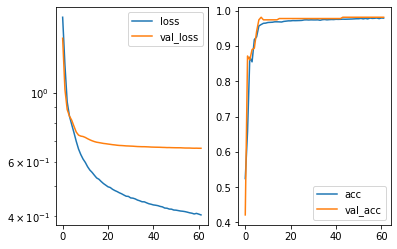

Predicted cell: Cells Probability: [[0.9811887]]
True Cell type: Cells
x [[0.42521352]]
True positional value x 0.5
y [[0.55003214]]
True positional value y 0.5


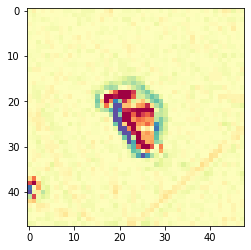

Epoch 63/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4060 - acc: 0.9793 - val_loss: 0.6622 - val_acc: 0.9817

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6622359992820265, 'val_acc': 0.9816849936932435, 'loss': 0.4059522438463557, 'acc': 0.9793436409883978, 'lr': 1e-06}


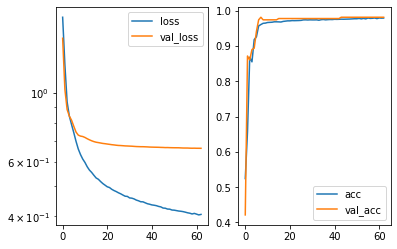

Predicted cell: Cells Probability: [[0.97269326]]
True Cell type: Cells
x [[0.37122834]]
True positional value x 0.7083333333333334
y [[0.32059243]]
True positional value y 0.5


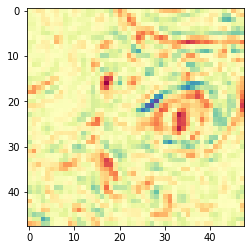

Epoch 64/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4048 - acc: 0.9792 - val_loss: 0.6617 - val_acc: 0.9817

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.661720817560678, 'val_acc': 0.9816849936932435, 'loss': 0.40480502530874896, 'acc': 0.9791505898287858, 'lr': 1e-06}


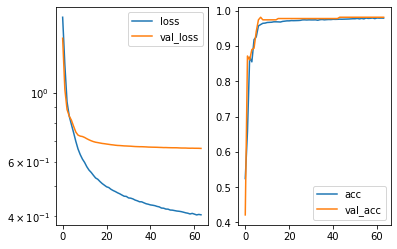

Predicted cell: Cells Probability: [[0.98961836]]
True Cell type: Cells
x [[0.3249388]]
True positional value x 0.2916666666666667
y [[0.776267]]
True positional value y 0.7083333333333334


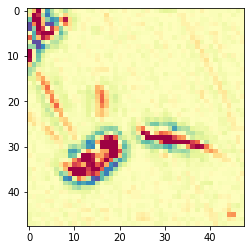

Epoch 65/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4032 - acc: 0.9792 - val_loss: 0.6619 - val_acc: 0.9817

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6619472728544102, 'val_acc': 0.9816849936932435, 'loss': 0.4032347572816385, 'acc': 0.9791505909794546, 'lr': 1e-06}


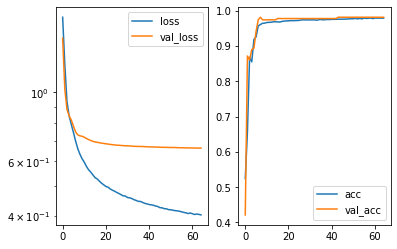

Predicted cell: Cells Probability: [[0.99798775]]
True Cell type: Cells
x [[0.5025058]]
True positional value x 0.2916666666666667
y [[0.5440251]]
True positional value y 0.7083333333333334


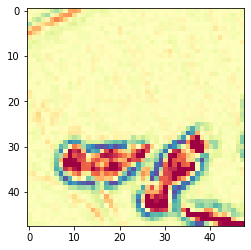

Epoch 66/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4010 - acc: 0.9801 - val_loss: 0.6619 - val_acc: 0.9817

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6618694839896736, 'val_acc': 0.9816849936932435, 'loss': 0.4009593644657651, 'acc': 0.9801158410241705, 'lr': 1e-06}


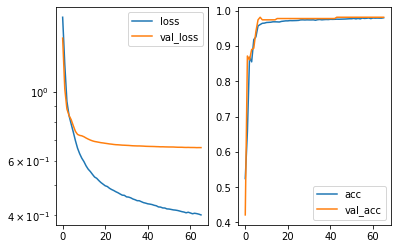

Predicted cell: Normal Probability: [[0.9562038]]
True Cell type: Normal
x [[0.57686555]]
True positional value x 0.5
y [[0.50992674]]
True positional value y 0.5


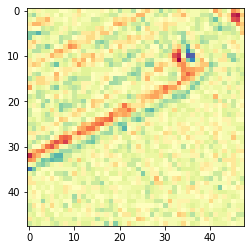

Epoch 67/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3993 - acc: 0.9807 - val_loss: 0.6624 - val_acc: 0.9817

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6623512154970413, 'val_acc': 0.9816849936932435, 'loss': 0.39927822926790096, 'acc': 0.980694990130465, 'lr': 1e-06}


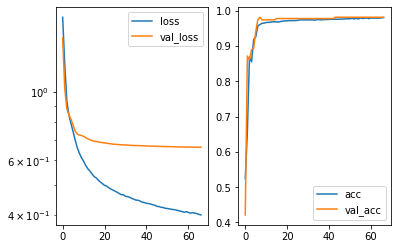

Predicted cell: Cells Probability: [[0.99636465]]
True Cell type: Cells
x [[0.66455823]]
True positional value x 0.7083333333333334
y [[0.17755458]]
True positional value y 0.2916666666666667


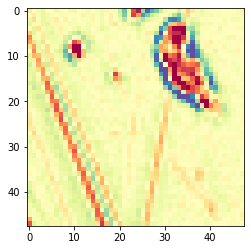

Epoch 68/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.4004 - acc: 0.9799 - val_loss: 0.6610 - val_acc: 0.9817

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6609816784823771, 'val_acc': 0.9816849936932435, 'loss': 0.4004285623207976, 'acc': 0.9799227887138897, 'lr': 1e-06}


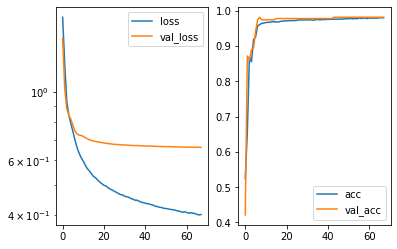

Predicted cell: Cells Probability: [[0.9580946]]
True Cell type: Cells
x [[0.3520071]]
True positional value x 0.5
y [[0.38339517]]
True positional value y 0.2916666666666667


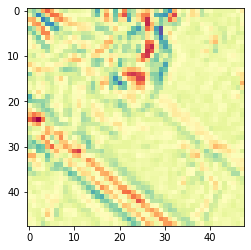

Epoch 69/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3989 - acc: 0.9809 - val_loss: 0.6613 - val_acc: 0.9817

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6612720151087303, 'val_acc': 0.9816849936932435, 'loss': 0.39892875826036606, 'acc': 0.9808880433612809, 'lr': 1e-06}


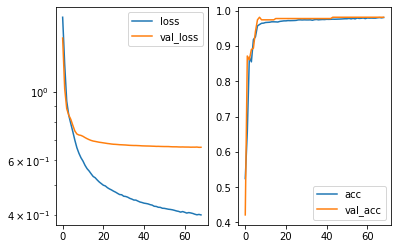

Predicted cell: Cells Probability: [[0.9746522]]
True Cell type: Cells
x [[0.7491073]]
True positional value x 0.5
y [[0.52217275]]
True positional value y 0.2916666666666667


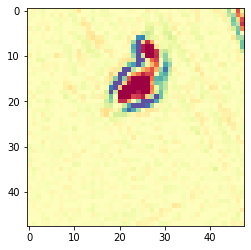

Epoch 70/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3959 - acc: 0.9809 - val_loss: 0.6604 - val_acc: 0.9817

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.660416922726474, 'val_acc': 0.9816849936932435, 'loss': 0.3958528903690544, 'acc': 0.9808880433612809, 'lr': 1e-06}


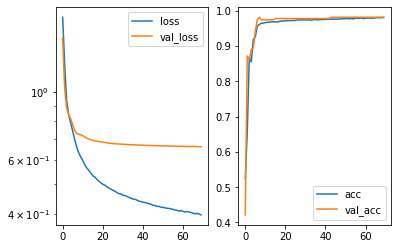

Predicted cell: Cells Probability: [[0.9894873]]
True Cell type: Cells
x [[0.49315766]]
True positional value x 0.5
y [[0.31728172]]
True positional value y 0.7083333333333334


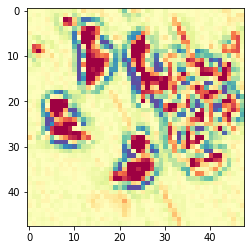

Epoch 71/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3961 - acc: 0.9807 - val_loss: 0.6601 - val_acc: 0.9817

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6601466012525035, 'val_acc': 0.9816849936932435, 'loss': 0.3960988786229756, 'acc': 0.9806949922016689, 'lr': 1e-06}


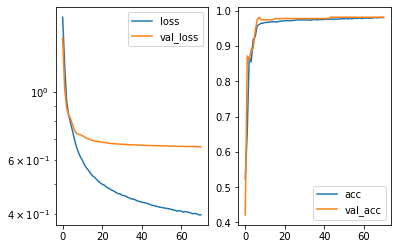

Predicted cell: Cells Probability: [[0.9862629]]
True Cell type: Cells
x [[0.84186256]]
True positional value x 0.7083333333333334
y [[0.68319124]]
True positional value y 0.5


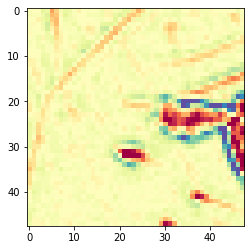

Epoch 72/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3939 - acc: 0.9815 - val_loss: 0.6602 - val_acc: 0.9817

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6602145505475474, 'val_acc': 0.9816849936932435, 'loss': 0.39390802095755645, 'acc': 0.9814671924675754, 'lr': 1e-06}


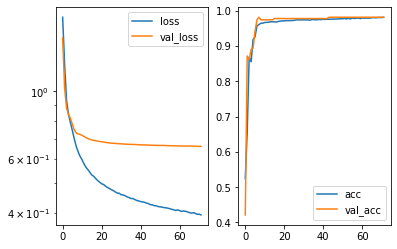

Predicted cell: Cells Probability: [[0.98807037]]
True Cell type: Cells
x [[0.8031666]]
True positional value x 0.5
y [[0.1378413]]
True positional value y 0.2916666666666667


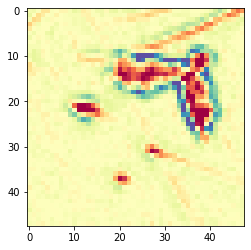

Epoch 73/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3948 - acc: 0.9817 - val_loss: 0.6597 - val_acc: 0.9817

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.659718754527333, 'val_acc': 0.9816849936932435, 'loss': 0.3948046681273398, 'acc': 0.9816602468490601, 'lr': 1e-06}


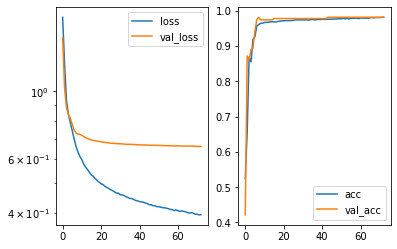

Predicted cell: Cells Probability: [[0.9817271]]
True Cell type: Cells
x [[0.26604086]]
True positional value x 0.7083333333333334
y [[0.70197654]]
True positional value y 0.7083333333333334


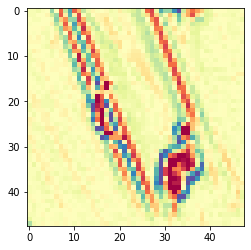

Epoch 74/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3945 - acc: 0.9819 - val_loss: 0.6602 - val_acc: 0.9817

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6601973234952151, 'val_acc': 0.9816849936932435, 'loss': 0.39454204373378093, 'acc': 0.9818532957073344, 'lr': 1e-06}


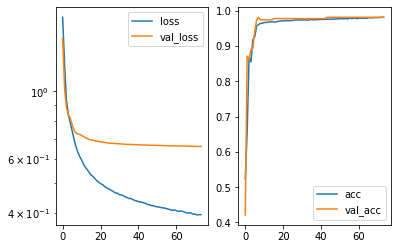

Predicted cell: Cells Probability: [[0.9645627]]
True Cell type: Cells
x [[0.33450696]]
True positional value x 0.5
y [[0.38037336]]
True positional value y 0.2916666666666667


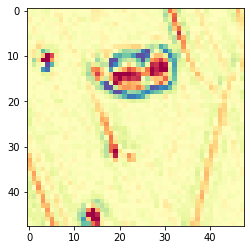

Epoch 75/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3934 - acc: 0.9819 - val_loss: 0.6602 - val_acc: 0.9817

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6602138333268218, 'val_acc': 0.9816849936932435, 'loss': 0.39342810184799104, 'acc': 0.9818532934059968, 'lr': 1e-06}


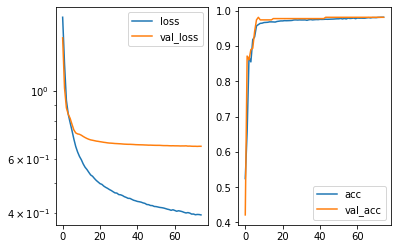

Predicted cell: Cells Probability: [[0.9889655]]
True Cell type: Cells
x [[0.42530453]]
True positional value x 0.5
y [[0.78324807]]
True positional value y 0.7083333333333334


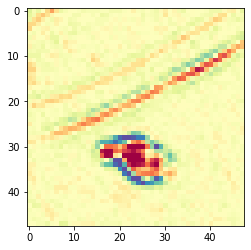

Epoch 76/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3934 - acc: 0.9809 - val_loss: 0.6604 - val_acc: 0.9817

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.660422281686203, 'val_acc': 0.9816849936932435, 'loss': 0.393376850828701, 'acc': 0.9808880422106121, 'lr': 1e-06}


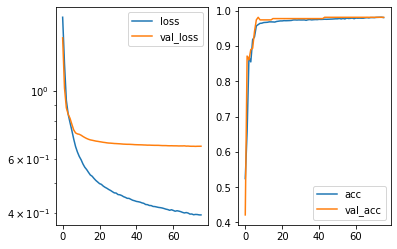

Predicted cell: Cells Probability: [[0.988296]]
True Cell type: Cells
x [[0.39700824]]
True positional value x 0.7083333333333334
y [[0.68460464]]
True positional value y 0.7083333333333334


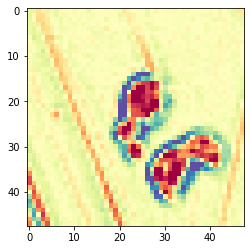

Epoch 77/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3915 - acc: 0.9832 - val_loss: 0.6606 - val_acc: 0.9817

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6605980758701925, 'val_acc': 0.9816849936932435, 'loss': 0.3915440338919062, 'acc': 0.9832046446192679, 'lr': 1e-06}


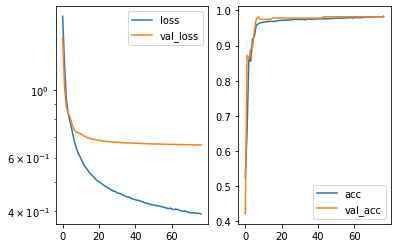

Predicted cell: Cells Probability: [[0.9318084]]
True Cell type: Cells
x [[0.614359]]
True positional value x 0.7083333333333334
y [[0.7013532]]
True positional value y 0.5


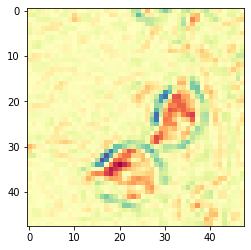

Epoch 78/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3899 - acc: 0.9832 - val_loss: 0.6603 - val_acc: 0.9817

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6602638983901167, 'val_acc': 0.9816849936932435, 'loss': 0.389862540490839, 'acc': 0.983204643468599, 'lr': 1e-06}


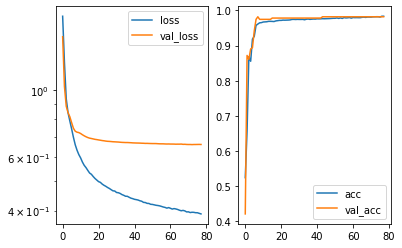

Predicted cell: Normal Probability: [[0.8751924]]
True Cell type: Normal
x [[0.39936084]]
True positional value x 0.5
y [[0.50578296]]
True positional value y 0.5


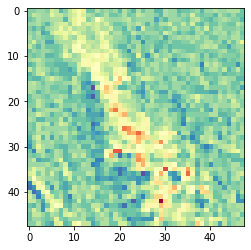

Epoch 79/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3908 - acc: 0.9832 - val_loss: 0.6600 - val_acc: 0.9817

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.660032223432492, 'val_acc': 0.9816849936932435, 'loss': 0.3907940666187684, 'acc': 0.9832046469206055, 'lr': 1e-06}


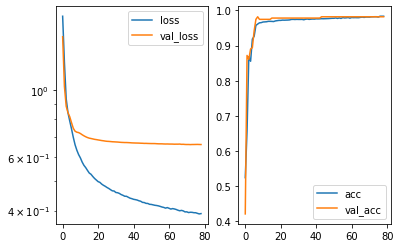

Predicted cell: Cells Probability: [[0.98969615]]
True Cell type: Cells
x [[0.53946966]]
True positional value x 0.5
y [[0.14569463]]
True positional value y 0.2916666666666667


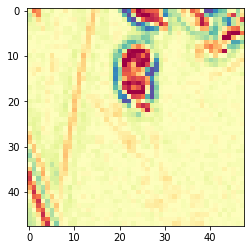

Epoch 80/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3895 - acc: 0.9842 - val_loss: 0.6596 - val_acc: 0.9817

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6596058668234409, 'val_acc': 0.9816849936932435, 'loss': 0.3895401656627655, 'acc': 0.9841698958146526, 'lr': 1e-06}


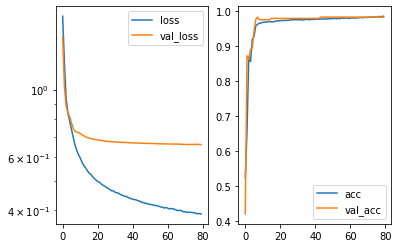

Predicted cell: Cells Probability: [[0.95072424]]
True Cell type: Cells
x [[0.70477694]]
True positional value x 0.7083333333333334
y [[0.30111027]]
True positional value y 0.5


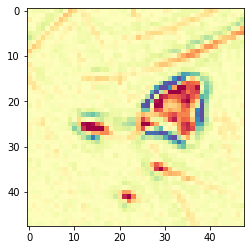

Epoch 81/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3886 - acc: 0.9840 - val_loss: 0.6592 - val_acc: 0.9817

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6592142088509305, 'val_acc': 0.9816849936932435, 'loss': 0.38863258460773925, 'acc': 0.9839768458057094, 'lr': 1e-06}


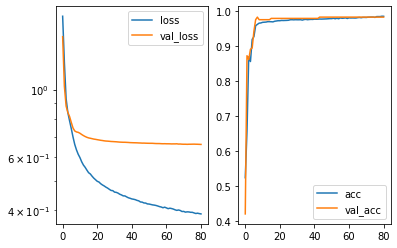

Predicted cell: Cells Probability: [[0.84031856]]
True Cell type: Cells
x [[0.5542651]]
True positional value x 0.2916666666666667
y [[0.3524878]]
True positional value y 0.2916666666666667


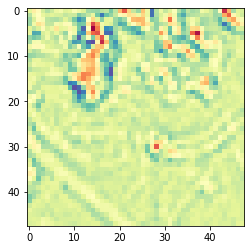

Epoch 82/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3873 - acc: 0.9855 - val_loss: 0.6592 - val_acc: 0.9817

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6592046865176805, 'val_acc': 0.9816849936932435, 'loss': 0.38729843623849874, 'acc': 0.9855212470279237, 'lr': 1e-06}


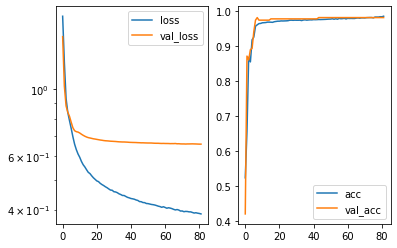

Predicted cell: Cells Probability: [[0.9360012]]
True Cell type: Cells
x [[0.8426211]]
True positional value x 0.7083333333333334
y [[0.66831446]]
True positional value y 0.5


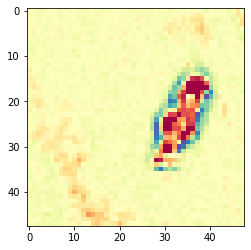

Epoch 83/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3863 - acc: 0.9851 - val_loss: 0.6593 - val_acc: 0.9817

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6592775247035882, 'val_acc': 0.9816849936932435, 'loss': 0.3862659060126566, 'acc': 0.9851351435580309, 'lr': 1e-06}


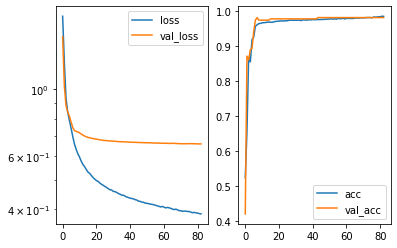

Predicted cell: Cells Probability: [[0.9685925]]
True Cell type: Cells
x [[0.58412623]]
True positional value x 0.7083333333333334
y [[0.40762925]]
True positional value y 0.7083333333333334


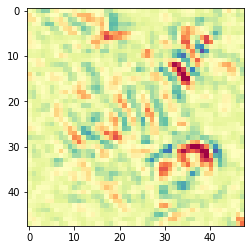

Epoch 84/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3869 - acc: 0.9847 - val_loss: 0.6593 - val_acc: 0.9817

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6592778738165076, 'val_acc': 0.9816849936932435, 'loss': 0.3868705858134855, 'acc': 0.9847490446908134, 'lr': 1e-06}


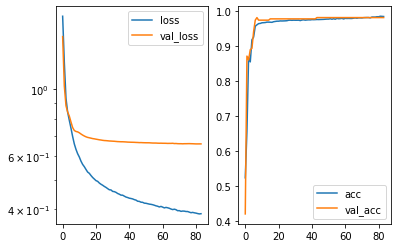

Predicted cell: Cells Probability: [[0.99723107]]
True Cell type: Cells
x [[0.19577193]]
True positional value x 0.2916666666666667
y [[0.368504]]
True positional value y 0.5


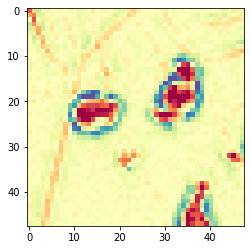

Epoch 85/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3854 - acc: 0.9853 - val_loss: 0.6589 - val_acc: 0.9817

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6588612419345004, 'val_acc': 0.9816849936932435, 'loss': 0.38537998273105695, 'acc': 0.9853281937971078, 'lr': 1e-06}


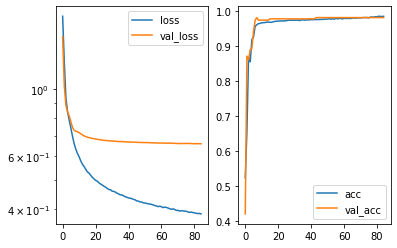

Predicted cell: Cells Probability: [[0.97881144]]
True Cell type: Cells
x [[0.8089878]]
True positional value x 0.7083333333333334
y [[0.42436165]]
True positional value y 0.2916666666666667


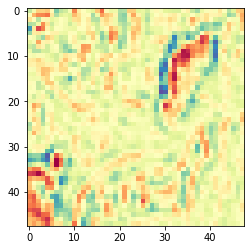

Epoch 86/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3845 - acc: 0.9859 - val_loss: 0.6588 - val_acc: 0.9817

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6587636916192023, 'val_acc': 0.9816849936932435, 'loss': 0.38446224748397884, 'acc': 0.9859073481964788, 'lr': 1e-06}


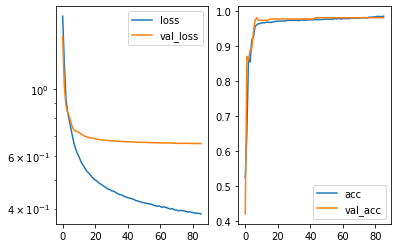

Predicted cell: Cells Probability: [[0.988891]]
True Cell type: Cells
x [[0.72690684]]
True positional value x 0.5
y [[0.558077]]
True positional value y 0.5


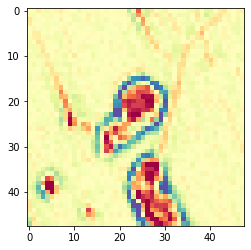

Epoch 87/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3851 - acc: 0.9855 - val_loss: 0.6591 - val_acc: 0.9817

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6590645743377043, 'val_acc': 0.9816849936932435, 'loss': 0.38512251149273286, 'acc': 0.9855212447265861, 'lr': 1e-06}


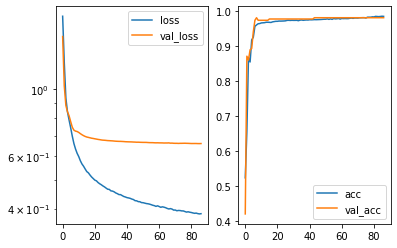

Predicted cell: Cells Probability: [[0.9969909]]
True Cell type: Cells
x [[0.61182404]]
True positional value x 0.2916666666666667
y [[0.7293204]]
True positional value y 0.7083333333333334


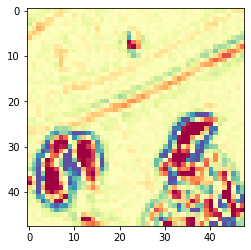

Epoch 88/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3846 - acc: 0.9863 - val_loss: 0.6589 - val_acc: 0.9817

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6589035992220644, 'val_acc': 0.9816849936932435, 'loss': 0.38462507057374046, 'acc': 0.9862934459130276, 'lr': 1e-06}


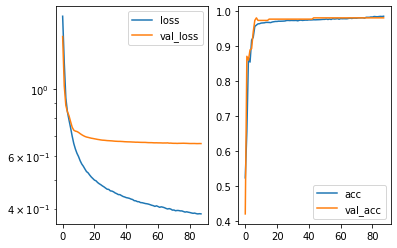

Predicted cell: Cells Probability: [[0.9951865]]
True Cell type: Cells
x [[0.5209679]]
True positional value x 0.2916666666666667
y [[0.10868681]]
True positional value y 0.5


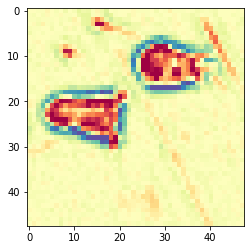

Epoch 89/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3836 - acc: 0.9865 - val_loss: 0.6592 - val_acc: 0.9817

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6592336849415259, 'val_acc': 0.9816849936932435, 'loss': 0.38358106817978227, 'acc': 0.9864864959219708, 'lr': 1e-06}


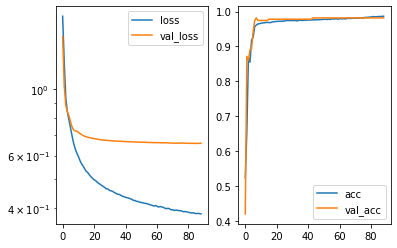

Predicted cell: Cells Probability: [[0.9915206]]
True Cell type: Cells
x [[0.5983724]]
True positional value x 0.7083333333333334
y [[0.75706166]]
True positional value y 0.7083333333333334


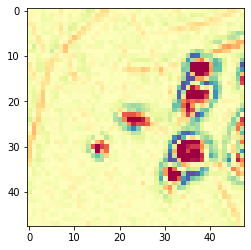

Epoch 90/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3831 - acc: 0.9855 - val_loss: 0.6588 - val_acc: 0.9817

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6587627244083, 'val_acc': 0.9816849936932435, 'loss': 0.3831333753915367, 'acc': 0.9855212447265861, 'lr': 1e-06}


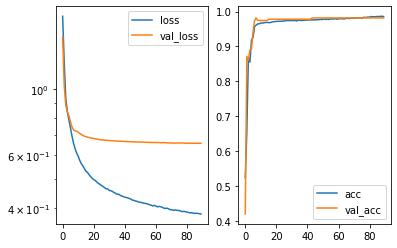

Predicted cell: Normal Probability: [[0.9590886]]
True Cell type: Normal
x [[0.43214244]]
True positional value x 0.5
y [[0.5657962]]
True positional value y 0.5


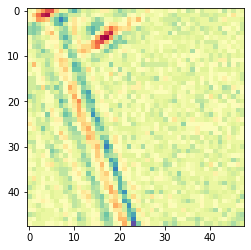

Epoch 91/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3826 - acc: 0.9875 - val_loss: 0.6588 - val_acc: 0.9817

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6587880026726496, 'val_acc': 0.9816849936932435, 'loss': 0.3825874588664434, 'acc': 0.9874517459666867, 'lr': 1e-06}


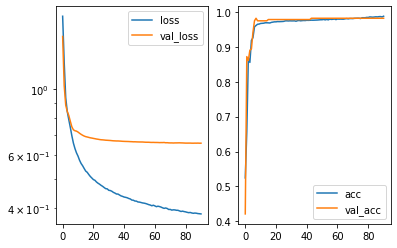

Predicted cell: Cells Probability: [[0.9985814]]
True Cell type: Cells
x [[0.6266669]]
True positional value x 0.2916666666666667
y [[0.6395442]]
True positional value y 0.7083333333333334


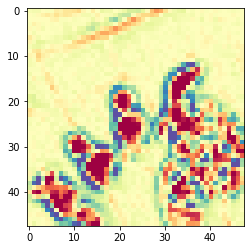

Epoch 92/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3806 - acc: 0.9890 - val_loss: 0.6587 - val_acc: 0.9817

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.658656337758997, 'val_acc': 0.9816849936932435, 'loss': 0.3806230331479813, 'acc': 0.9889961483395698, 'lr': 1e-06}


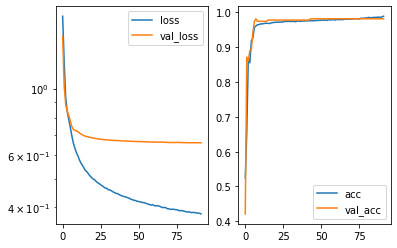

Predicted cell: Cells Probability: [[0.9535745]]
True Cell type: Normal
x [[0.2664597]]
True positional value x 0.5
y [[0.49392948]]
True positional value y 0.5


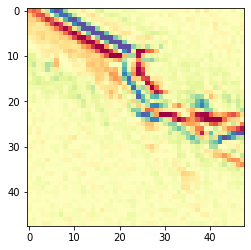

Epoch 93/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3813 - acc: 0.9892 - val_loss: 0.6580 - val_acc: 0.9817

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6580005571955726, 'val_acc': 0.9816849936932435, 'loss': 0.3813433463048751, 'acc': 0.9891891971978442, 'lr': 1e-06}


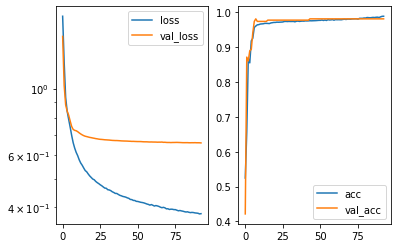

Predicted cell: Cells Probability: [[0.99334806]]
True Cell type: Cells
x [[0.55071574]]
True positional value x 0.5
y [[0.506138]]
True positional value y 0.5


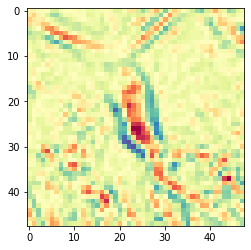

Epoch 94/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3815 - acc: 0.9873 - val_loss: 0.6581 - val_acc: 0.9817

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.658104209891169, 'val_acc': 0.9816849936932435, 'loss': 0.3815172504504215, 'acc': 0.9872586948070747, 'lr': 1e-06}


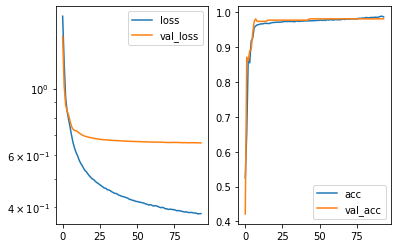

Predicted cell: Cells Probability: [[0.9902132]]
True Cell type: Cells
x [[0.5730515]]
True positional value x 0.7083333333333334
y [[0.69199306]]
True positional value y 0.7083333333333334


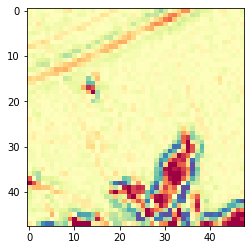

Epoch 95/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3799 - acc: 0.9900 - val_loss: 0.6577 - val_acc: 0.9817

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6576799807094392, 'val_acc': 0.9816849936932435, 'loss': 0.3799147387268921, 'acc': 0.9899613983842858, 'lr': 1e-06}


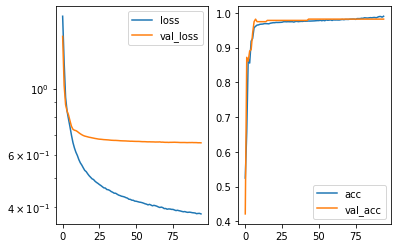

Predicted cell: Cells Probability: [[0.9935197]]
True Cell type: Cells
x [[0.55205303]]
True positional value x 0.5
y [[0.50733143]]
True positional value y 0.5


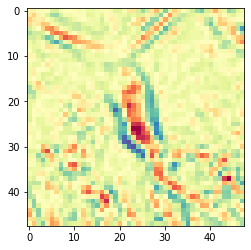

Epoch 96/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3795 - acc: 0.9892 - val_loss: 0.6570 - val_acc: 0.9817

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6570160292880439, 'val_acc': 0.9816849936932435, 'loss': 0.3794892106967543, 'acc': 0.9891891983485129, 'lr': 1e-06}


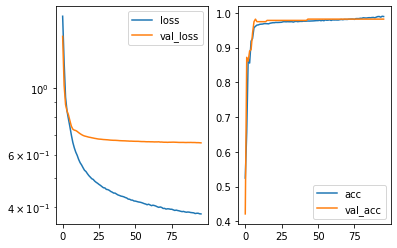

Predicted cell: Cells Probability: [[0.9789473]]
True Cell type: Cells
x [[0.7702811]]
True positional value x 0.5
y [[0.37218177]]
True positional value y 0.2916666666666667


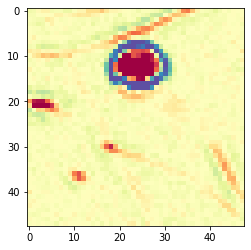

Epoch 97/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3797 - acc: 0.9890 - val_loss: 0.6572 - val_acc: 0.9817

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6571636575482267, 'val_acc': 0.9816849936932435, 'loss': 0.379674720142799, 'acc': 0.9889961460382322, 'lr': 1e-06}


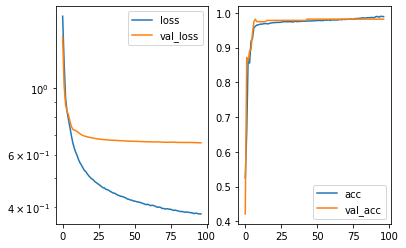

Predicted cell: Cells Probability: [[0.96690214]]
True Cell type: Cells
x [[0.6501434]]
True positional value x 0.7083333333333334
y [[0.35999167]]
True positional value y 0.2916666666666667


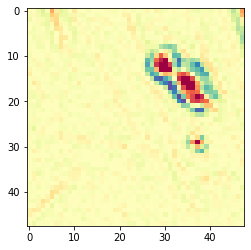

Epoch 98/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3787 - acc: 0.9917 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569323362884941, 'val_acc': 0.9816849936932435, 'loss': 0.3786762590343888, 'acc': 0.9916988496154432, 'lr': 1e-06}


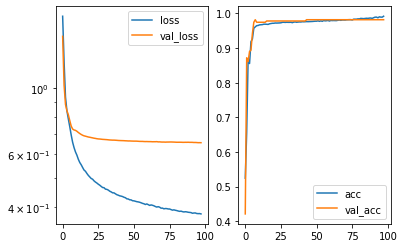

Predicted cell: Cells Probability: [[0.9915044]]
True Cell type: Cells
x [[0.76541704]]
True positional value x 0.7083333333333334
y [[0.25647926]]
True positional value y 0.2916666666666667


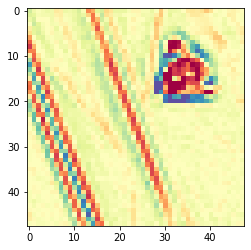

Epoch 99/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3786 - acc: 0.9898 - val_loss: 0.6577 - val_acc: 0.9817

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6577138223927537, 'val_acc': 0.9816849936932435, 'loss': 0.3786446478606191, 'acc': 0.9897683483753426, 'lr': 1e-06}


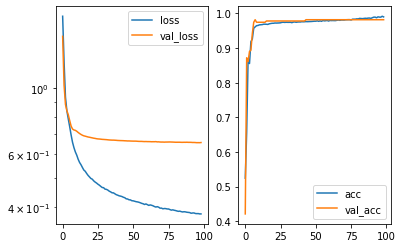

Predicted cell: Cells Probability: [[0.99421084]]
True Cell type: Cells
x [[0.47684053]]
True positional value x 0.2916666666666667
y [[0.5866239]]
True positional value y 0.2916666666666667


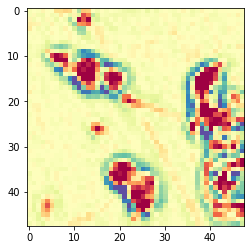

Epoch 100/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3769 - acc: 0.9907 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656683528597975, 'val_acc': 0.9816849936932435, 'loss': 0.3768827659743173, 'acc': 0.9907335984200585, 'lr': 1e-06}


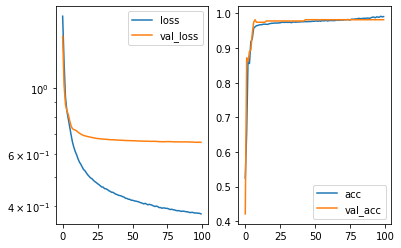

Predicted cell: Cells Probability: [[0.9838837]]
True Cell type: Cells
x [[0.63267]]
True positional value x 0.7083333333333334
y [[0.3931345]]
True positional value y 0.7083333333333334


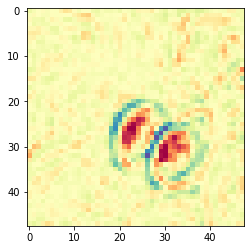

Epoch 101/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3772 - acc: 0.9900 - val_loss: 0.6571 - val_acc: 0.9817

Epoch 00101: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6570714511277475, 'val_acc': 0.9816849936932435, 'loss': 0.37723885252208783, 'acc': 0.9899613983842858, 'lr': 1e-06}


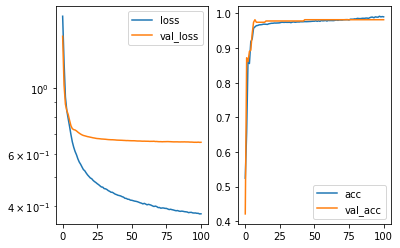

Predicted cell: Cells Probability: [[0.9904204]]
True Cell type: Cells
x [[0.6450995]]
True positional value x 0.5
y [[0.50505465]]
True positional value y 0.2916666666666667


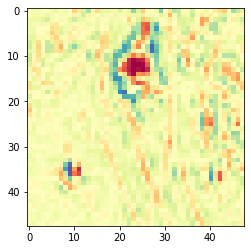

Epoch 102/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3769 - acc: 0.9913 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00102: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568171971446866, 'val_acc': 0.9816849936932435, 'loss': 0.37687346224158885, 'acc': 0.991312748446888, 'lr': 1e-06}


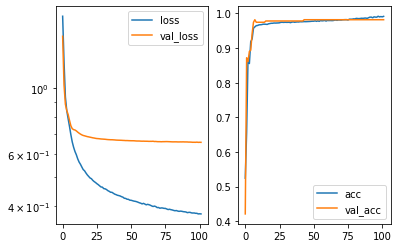

Predicted cell: Cells Probability: [[0.97682744]]
True Cell type: Cells
x [[0.7567481]]
True positional value x 0.7083333333333334
y [[0.27797157]]
True positional value y 0.2916666666666667


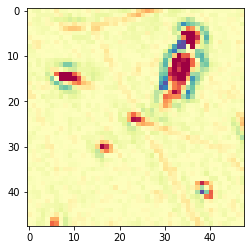

Epoch 103/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3757 - acc: 0.9919 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00103: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568989659840371, 'val_acc': 0.9816849936932435, 'loss': 0.37567819775761785, 'acc': 0.9918918996243864, 'lr': 1e-06}


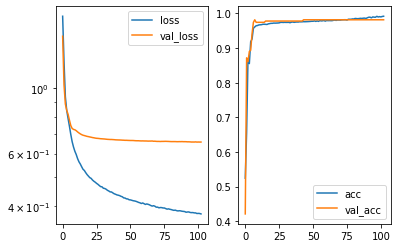

Predicted cell: Cells Probability: [[0.9903639]]
True Cell type: Cells
x [[0.44195926]]
True positional value x 0.2916666666666667
y [[0.5659625]]
True positional value y 0.7083333333333334


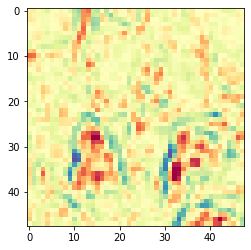

Epoch 104/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3744 - acc: 0.9934 - val_loss: 0.6571 - val_acc: 0.9817

Epoch 00104: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6571103185961098, 'val_acc': 0.9816849936932435, 'loss': 0.3743674093461865, 'acc': 0.9934362985452629, 'lr': 1e-06}


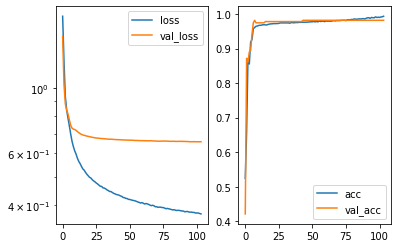

Predicted cell: Cells Probability: [[0.9824472]]
True Cell type: Cells
x [[0.5650438]]
True positional value x 0.7083333333333334
y [[0.6969576]]
True positional value y 0.5


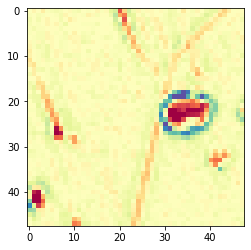

Epoch 105/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3755 - acc: 0.9925 - val_loss: 0.6571 - val_acc: 0.9817

Epoch 00105: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6570633400927534, 'val_acc': 0.9816849936932435, 'loss': 0.37554228789097555, 'acc': 0.9924710485005471, 'lr': 1e-06}


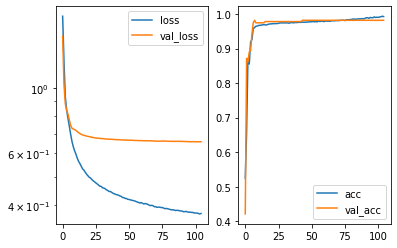

Predicted cell: Cells Probability: [[0.9961725]]
True Cell type: Cells
x [[0.32340664]]
True positional value x 0.2916666666666667
y [[0.67167926]]
True positional value y 0.7083333333333334


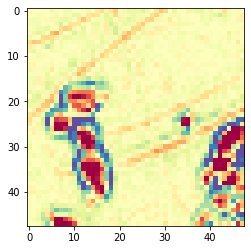

Epoch 106/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3746 - acc: 0.9921 - val_loss: 0.6573 - val_acc: 0.9817

Epoch 00106: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6573015294232212, 'val_acc': 0.9816849936932435, 'loss': 0.3746327987969152, 'acc': 0.9920849496333295, 'lr': 1e-06}


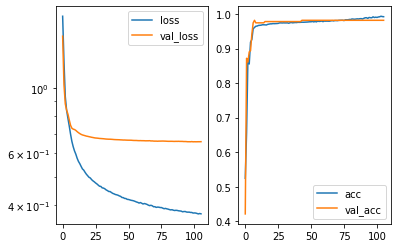

Predicted cell: Cells Probability: [[0.97943306]]
True Cell type: Cells
x [[0.57609355]]
True positional value x 0.5
y [[0.6589682]]
True positional value y 0.7083333333333334


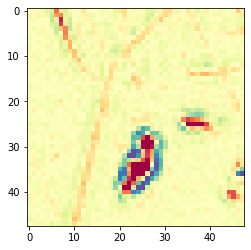

Epoch 107/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3753 - acc: 0.9913 - val_loss: 0.6575 - val_acc: 0.9817

Epoch 00107: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.657539331869328, 'val_acc': 0.9816849936932435, 'loss': 0.37527819581933924, 'acc': 0.991312748446888, 'lr': 1e-06}


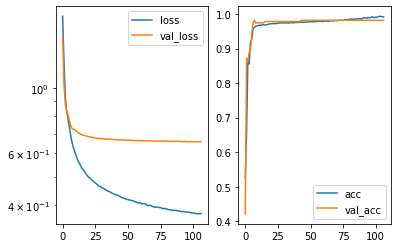

Predicted cell: Cells Probability: [[0.97723323]]
True Cell type: Cells
x [[0.2970401]]
True positional value x 0.5
y [[0.36152506]]
True positional value y 0.2916666666666667


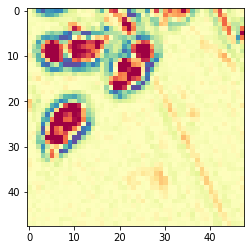

Epoch 108/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3745 - acc: 0.9931 - val_loss: 0.6570 - val_acc: 0.9817

Epoch 00108: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00108: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.657045616771712, 'val_acc': 0.9816849936932435, 'loss': 0.3744549608598805, 'acc': 0.9930501985273766, 'lr': 1e-06}


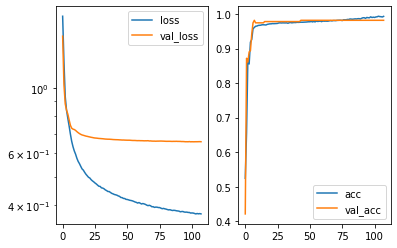

Predicted cell: Cells Probability: [[0.9931463]]
True Cell type: Cells
x [[0.51772726]]
True positional value x 0.2916666666666667
y [[0.38465247]]
True positional value y 0.5


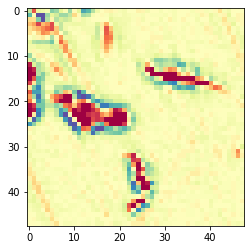

Epoch 109/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3736 - acc: 0.9938 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00109: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656873053465134, 'val_acc': 0.9816849936932435, 'loss': 0.37358444480362085, 'acc': 0.9938223997138181, 'lr': 1e-07}


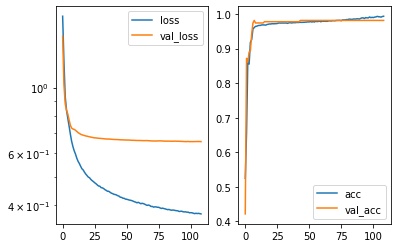

Predicted cell: Cells Probability: [[0.9934989]]
True Cell type: Cells
x [[0.3286781]]
True positional value x 0.2916666666666667
y [[0.37925342]]
True positional value y 0.2916666666666667


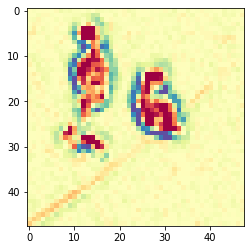

Epoch 110/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3740 - acc: 0.9936 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00110: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656910703077421, 'val_acc': 0.9816849936932435, 'loss': 0.37395136789005234, 'acc': 0.993629349704875, 'lr': 1e-07}


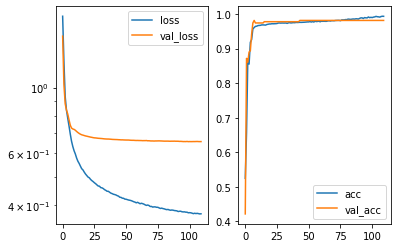

Predicted cell: Normal Probability: [[0.9897315]]
True Cell type: Normal
x [[0.49798563]]
True positional value x 0.5
y [[0.3836033]]
True positional value y 0.5


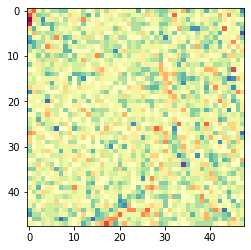

Epoch 111/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9942 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00111: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568639614643195, 'val_acc': 0.9816849936932435, 'loss': 0.3728594987088649, 'acc': 0.9942084997317046, 'lr': 1e-07}


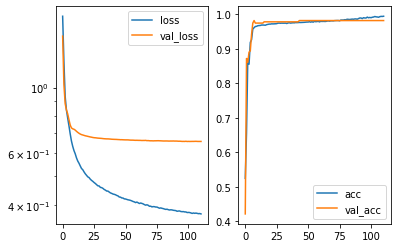

Predicted cell: Cells Probability: [[0.9753262]]
True Cell type: Cells
x [[0.6928567]]
True positional value x 0.7083333333333334
y [[0.52228904]]
True positional value y 0.5


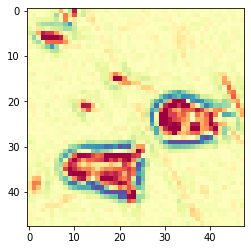

Epoch 112/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3739 - acc: 0.9944 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00112: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567090092561184, 'val_acc': 0.9816849936932435, 'loss': 0.3739286329755452, 'acc': 0.9944015497406478, 'lr': 1e-07}


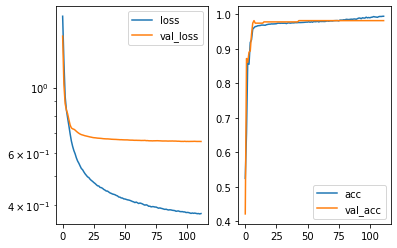

Predicted cell: Cells Probability: [[0.9989802]]
True Cell type: Cells
x [[0.5051321]]
True positional value x 0.2916666666666667
y [[0.5848483]]
True positional value y 0.7083333333333334


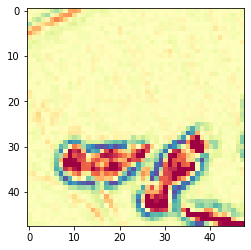

Epoch 113/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3752 - acc: 0.9932 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00113: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565591393809616, 'val_acc': 0.9816849936932435, 'loss': 0.3751555996511894, 'acc': 0.9932432496869886, 'lr': 1e-07}


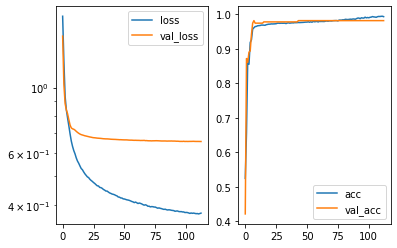

Predicted cell: Cells Probability: [[0.979592]]
True Cell type: Cells
x [[0.42641786]]
True positional value x 0.5
y [[0.60281014]]
True positional value y 0.7083333333333334


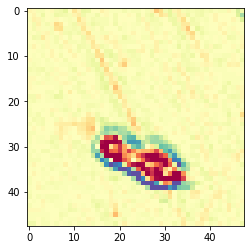

Epoch 114/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3720 - acc: 0.9942 - val_loss: 0.6565 - val_acc: 0.9817

Epoch 00114: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565076802676414, 'val_acc': 0.9816849936932435, 'loss': 0.37202703400468273, 'acc': 0.9942084997317046, 'lr': 1e-07}


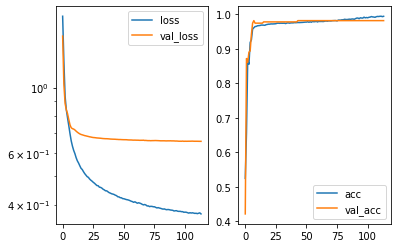

Predicted cell: Cells Probability: [[0.9698523]]
True Cell type: Cells
x [[0.615531]]
True positional value x 0.2916666666666667
y [[0.493874]]
True positional value y 0.2916666666666667


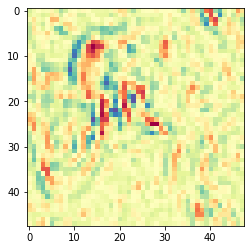

Epoch 115/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9944 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00115: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566812557615204, 'val_acc': 0.9816849936932435, 'loss': 0.37236976830655544, 'acc': 0.9944015497406478, 'lr': 1e-07}


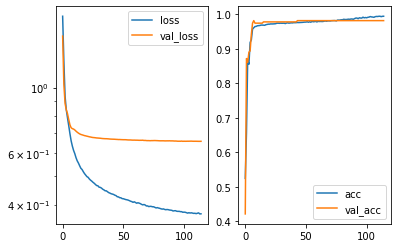

Predicted cell: Normal Probability: [[0.95582336]]
True Cell type: Normal
x [[0.5809964]]
True positional value x 0.5
y [[0.5862328]]
True positional value y 0.5


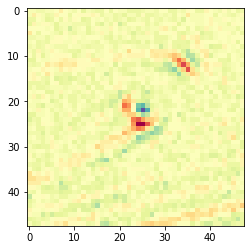

Epoch 116/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9938 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00116: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567967852830013, 'val_acc': 0.9816849936932435, 'loss': 0.37329276533200473, 'acc': 0.9938223997138181, 'lr': 1e-07}


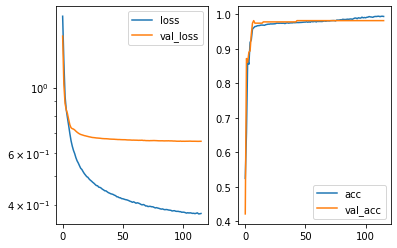

Predicted cell: Cells Probability: [[0.9392114]]
True Cell type: Cells
x [[0.7092676]]
True positional value x 0.5
y [[0.6057628]]
True positional value y 0.7083333333333334


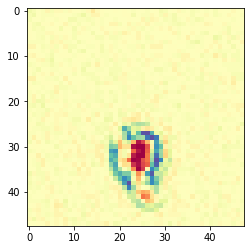

Epoch 117/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3726 - acc: 0.9940 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00117: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567187082199824, 'val_acc': 0.9816849936932435, 'loss': 0.3726394344480802, 'acc': 0.9940154497227613, 'lr': 1e-07}


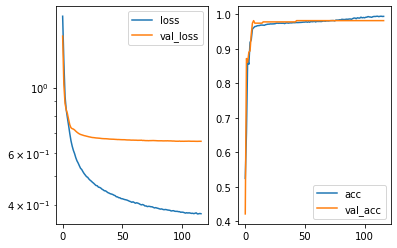

Predicted cell: Cells Probability: [[0.98526347]]
True Cell type: Cells
x [[0.47913164]]
True positional value x 0.5
y [[0.55634457]]
True positional value y 0.2916666666666667


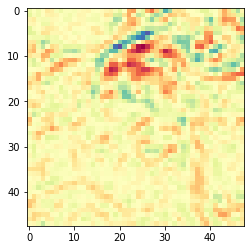

Epoch 118/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3715 - acc: 0.9952 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00118: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566563309767307, 'val_acc': 0.9816849936932435, 'loss': 0.3714762119482843, 'acc': 0.9951737497764205, 'lr': 1e-07}


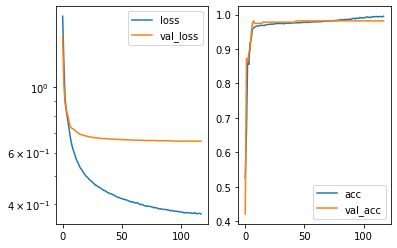

Predicted cell: Cells Probability: [[0.98846686]]
True Cell type: Cells
x [[0.27094424]]
True positional value x 0.2916666666666667
y [[0.6020615]]
True positional value y 0.5


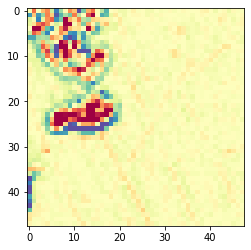

Epoch 119/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3725 - acc: 0.9946 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00119: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566066187379997, 'val_acc': 0.9816849936932435, 'loss': 0.3724503839338148, 'acc': 0.9945945997495909, 'lr': 1e-07}


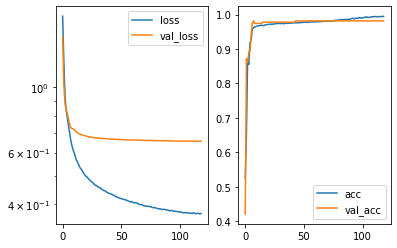

Predicted cell: Cells Probability: [[0.98057705]]
True Cell type: Cells
x [[0.20621158]]
True positional value x 0.2916666666666667
y [[0.26870424]]
True positional value y 0.5


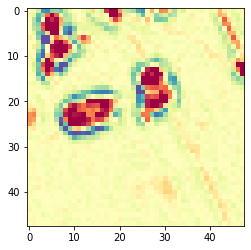

Epoch 120/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3727 - acc: 0.9936 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00120: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566665655090695, 'val_acc': 0.9816849936932435, 'loss': 0.3726846675845187, 'acc': 0.993629349704875, 'lr': 1e-07}


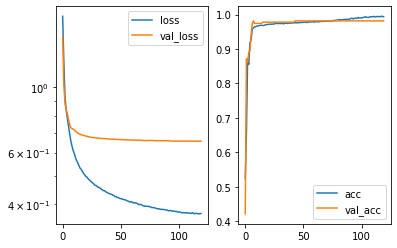

Predicted cell: Cells Probability: [[0.9890753]]
True Cell type: Cells
x [[0.2538229]]
True positional value x 0.2916666666666667
y [[0.15275076]]
True positional value y 0.2916666666666667


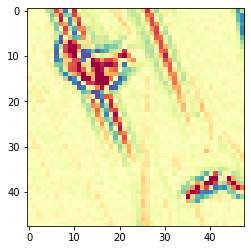

Epoch 121/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9936 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00121: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565959802914015, 'val_acc': 0.9816849936932435, 'loss': 0.3733651498800079, 'acc': 0.993629349704875, 'lr': 1e-07}


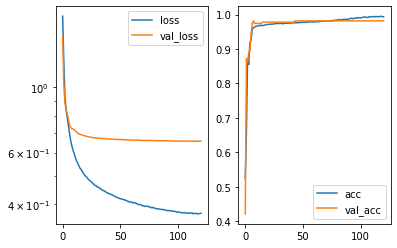

Predicted cell: Cells Probability: [[0.9815575]]
True Cell type: Cells
x [[0.52984375]]
True positional value x 0.5
y [[0.5846119]]
True positional value y 0.2916666666666667


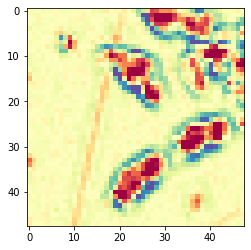

Epoch 122/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3717 - acc: 0.9944 - val_loss: 0.6565 - val_acc: 0.9817

Epoch 00122: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00122: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6564784213736817, 'val_acc': 0.9816849936932435, 'loss': 0.3716567856004339, 'acc': 0.9944015497406478, 'lr': 1e-07}


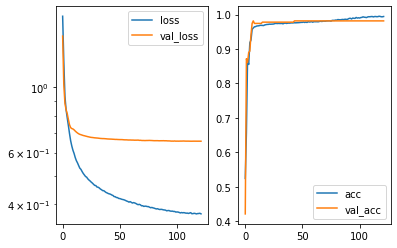

Predicted cell: Cells Probability: [[0.9700318]]
True Cell type: Cells
x [[0.1527775]]
True positional value x 0.2916666666666667
y [[0.72007215]]
True positional value y 0.5


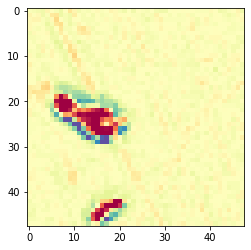

Epoch 123/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9932 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00123: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566505914642697, 'val_acc': 0.9816849936932435, 'loss': 0.37331732888939756, 'acc': 0.9932432496869886, 'lr': 1e-08}


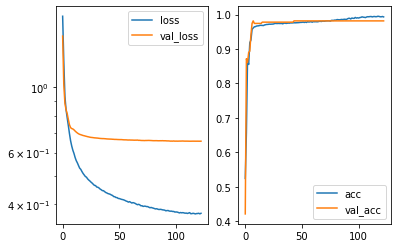

Predicted cell: Cells Probability: [[0.9662302]]
True Cell type: Cells
x [[0.6410788]]
True positional value x 0.2916666666666667
y [[0.64694685]]
True positional value y 0.7083333333333334


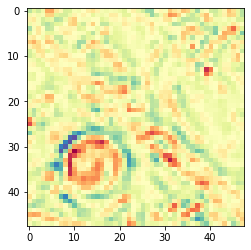

Epoch 124/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3730 - acc: 0.9934 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00124: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566770384599875, 'val_acc': 0.9816849936932435, 'loss': 0.37299720235312767, 'acc': 0.9934362985452629, 'lr': 1e-08}


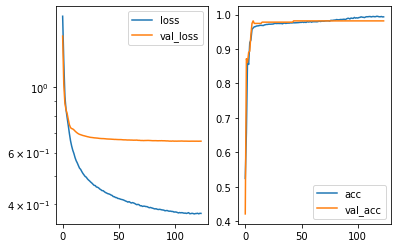

Predicted cell: Cells Probability: [[0.9927409]]
True Cell type: Cells
x [[0.23067868]]
True positional value x 0.2916666666666667
y [[0.69561976]]
True positional value y 0.7083333333333334


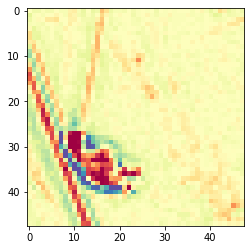

Epoch 125/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9946 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00125: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567673515050839, 'val_acc': 0.9816849936932435, 'loss': 0.3731567185357731, 'acc': 0.9945945997495909, 'lr': 1e-08}


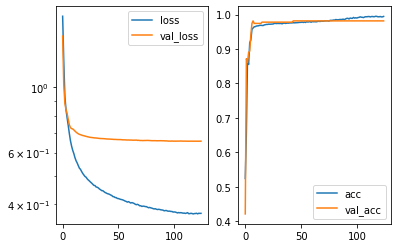

Predicted cell: Cells Probability: [[0.99639386]]
True Cell type: Cells
x [[0.3268175]]
True positional value x 0.2916666666666667
y [[0.67501485]]
True positional value y 0.7083333333333334


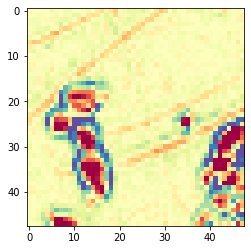

Epoch 126/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3739 - acc: 0.9934 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00126: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00126: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568107842962384, 'val_acc': 0.9816849936932435, 'loss': 0.373865170943691, 'acc': 0.9934362985452629, 'lr': 1e-08}


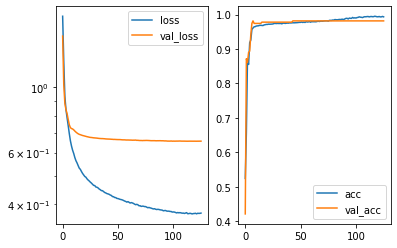

Predicted cell: Cells Probability: [[0.9886169]]
True Cell type: Cells
x [[0.27037966]]
True positional value x 0.2916666666666667
y [[0.6025911]]
True positional value y 0.5


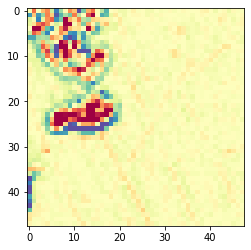

Epoch 127/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3742 - acc: 0.9940 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00127: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569166716201839, 'val_acc': 0.9816849936932435, 'loss': 0.37422313848977845, 'acc': 0.9940154485720926, 'lr': 1e-09}


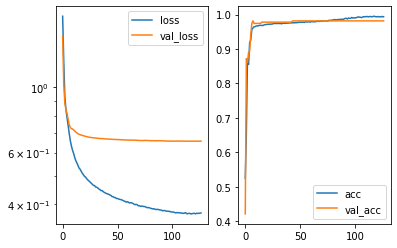

Predicted cell: Cells Probability: [[0.9843353]]
True Cell type: Cells
x [[0.3144165]]
True positional value x 0.5
y [[0.5582845]]
True positional value y 0.5


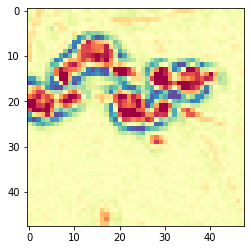

Epoch 128/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3720 - acc: 0.9946 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00128: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568706795409486, 'val_acc': 0.9816849936932435, 'loss': 0.3719966366714492, 'acc': 0.9945945997495909, 'lr': 1e-09}


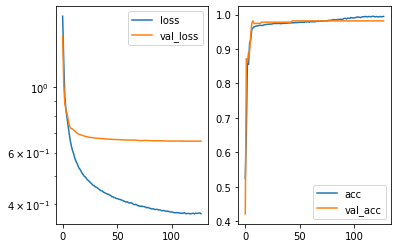

Predicted cell: Cells Probability: [[0.99148554]]
True Cell type: Cells
x [[0.40762845]]
True positional value x 0.7083333333333334
y [[0.6182717]]
True positional value y 0.7083333333333334


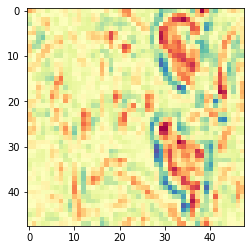

Epoch 129/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3719 - acc: 0.9946 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00129: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568629300637996, 'val_acc': 0.9816849936932435, 'loss': 0.3719284646069221, 'acc': 0.9945945997495909, 'lr': 1e-09}


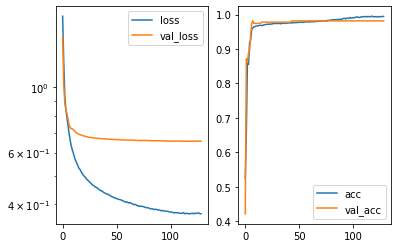

Predicted cell: Cells Probability: [[0.9923212]]
True Cell type: Cells
x [[0.28183088]]
True positional value x 0.2916666666666667
y [[0.6118949]]
True positional value y 0.7083333333333334


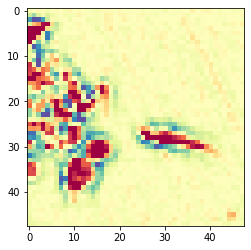

Epoch 130/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9942 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00130: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00130: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567529289277045, 'val_acc': 0.9816849936932435, 'loss': 0.3729009966592531, 'acc': 0.9942084997317046, 'lr': 1e-09}


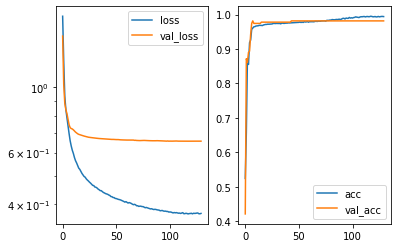

Predicted cell: Cells Probability: [[0.98958683]]
True Cell type: Cells
x [[0.37231678]]
True positional value x 0.5
y [[0.5260343]]
True positional value y 0.5


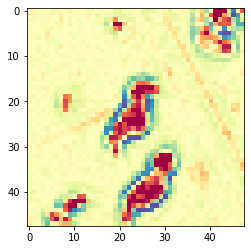

Epoch 131/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3717 - acc: 0.9946 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00131: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567904436107956, 'val_acc': 0.9816849936932435, 'loss': 0.37174961062932105, 'acc': 0.9945945997495909, 'lr': 9.9999994e-11}


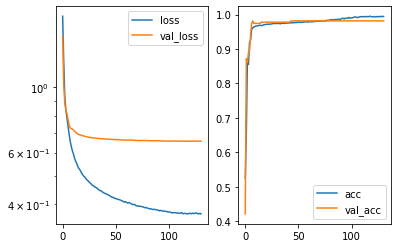

Predicted cell: Cells Probability: [[0.9843864]]
True Cell type: Cells
x [[0.31422466]]
True positional value x 0.5
y [[0.5583168]]
True positional value y 0.5


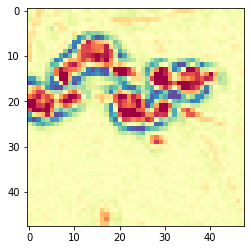

Epoch 132/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9944 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00132: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567468944486681, 'val_acc': 0.9816849936932435, 'loss': 0.3723649451631377, 'acc': 0.9944015485899789, 'lr': 9.9999994e-11}


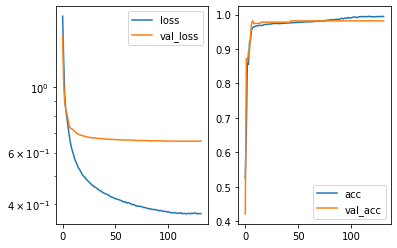

Predicted cell: Cells Probability: [[0.96070576]]
True Cell type: Cells
x [[0.6983478]]
True positional value x 0.7083333333333334
y [[0.29819408]]
True positional value y 0.5


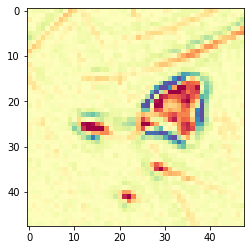

Epoch 133/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9940 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00133: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566687390044496, 'val_acc': 0.9816849936932435, 'loss': 0.37341180604857366, 'acc': 0.9940154485720926, 'lr': 9.9999994e-11}


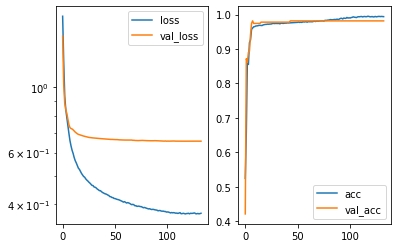

Predicted cell: Cells Probability: [[0.9679433]]
True Cell type: Cells
x [[0.6279105]]
True positional value x 0.7083333333333334
y [[0.6579085]]
True positional value y 0.7083333333333334


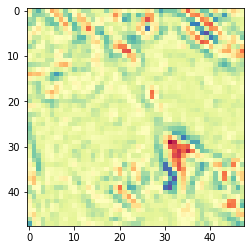

Epoch 134/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9952 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00134: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.

Epoch 00134: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567722329726586, 'val_acc': 0.9816849936932435, 'loss': 0.37306297032529323, 'acc': 0.9951737497764205, 'lr': 9.9999994e-11}


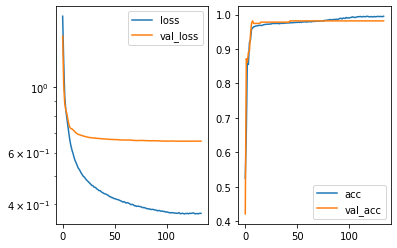

Predicted cell: Cells Probability: [[0.9938251]]
True Cell type: Cells
x [[0.6107778]]
True positional value x 0.7083333333333334
y [[0.42459422]]
True positional value y 0.2916666666666667


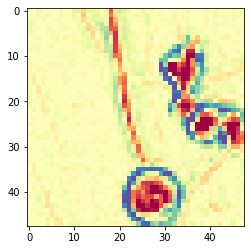

Epoch 135/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3727 - acc: 0.9956 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00135: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569233318388243, 'val_acc': 0.9816849936932435, 'loss': 0.3727251034675878, 'acc': 0.9955598497943068, 'lr': 9.999999e-12}


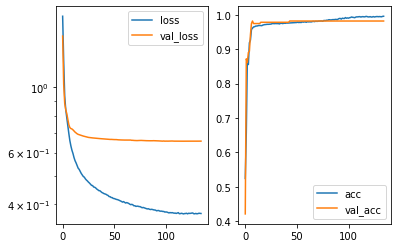

Predicted cell: Cells Probability: [[0.94654334]]
True Cell type: Cells
x [[0.60390353]]
True positional value x 0.7083333333333334
y [[0.31592992]]
True positional value y 0.2916666666666667


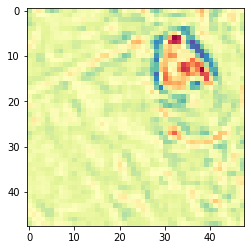

Epoch 136/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9932 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00136: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568294014686193, 'val_acc': 0.9816849936932435, 'loss': 0.37339510777281976, 'acc': 0.9932432496869886, 'lr': 9.999999e-12}


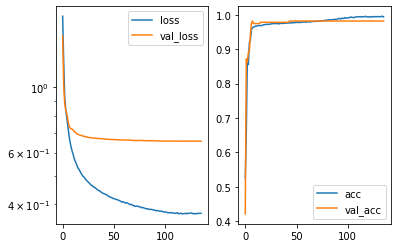

Predicted cell: Cells Probability: [[0.979836]]
True Cell type: Cells
x [[0.5750445]]
True positional value x 0.5
y [[0.6599452]]
True positional value y 0.7083333333333334


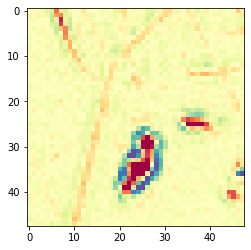

Epoch 137/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9944 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00137: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567425710377676, 'val_acc': 0.9816849936932435, 'loss': 0.37293223536152637, 'acc': 0.9944015476694439, 'lr': 9.999999e-12}


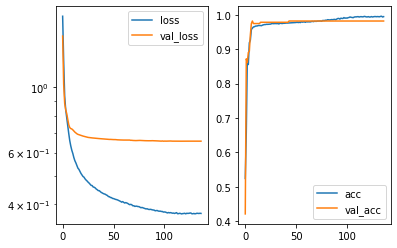

Predicted cell: Cells Probability: [[0.99584085]]
True Cell type: Cells
x [[0.60622436]]
True positional value x 0.2916666666666667
y [[0.5954828]]
True positional value y 0.5


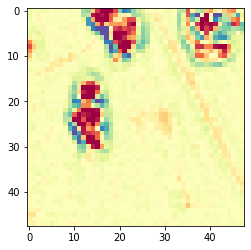

Epoch 138/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9946 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00138: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 00138: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569175927630274, 'val_acc': 0.9816849936932435, 'loss': 0.37315702484381247, 'acc': 0.9945945997495909, 'lr': 9.999999e-12}


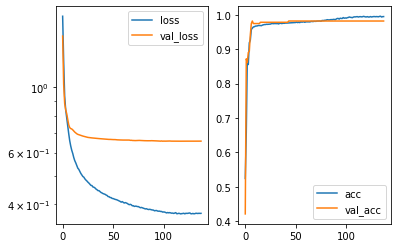

Predicted cell: Cells Probability: [[0.9955778]]
True Cell type: Cells
x [[0.32146144]]
True positional value x 0.7083333333333334
y [[0.39181584]]
True positional value y 0.2916666666666667


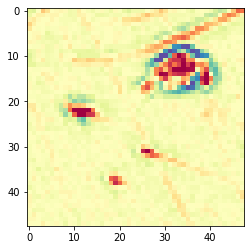

Epoch 139/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9952 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00139: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566474330730927, 'val_acc': 0.9816849936932435, 'loss': 0.3728742193301212, 'acc': 0.9951737497764205, 'lr': 9.999999e-13}


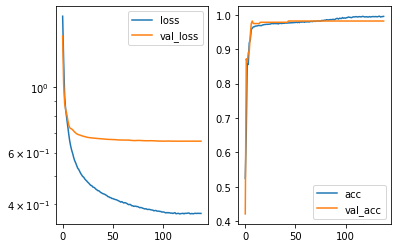

Predicted cell: Cells Probability: [[0.98690367]]
True Cell type: Cells
x [[0.5114286]]
True positional value x 0.5
y [[0.5411398]]
True positional value y 0.5


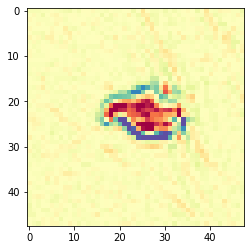

Epoch 140/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9942 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00140: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566197123282995, 'val_acc': 0.9816849936932435, 'loss': 0.37287042430929235, 'acc': 0.9942084997317046, 'lr': 9.999999e-13}


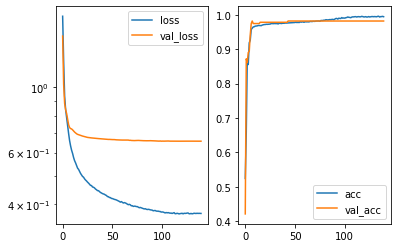

Predicted cell: Cells Probability: [[0.98050976]]
True Cell type: Cells
x [[0.27729657]]
True positional value x 0.5
y [[0.42573386]]
True positional value y 0.5


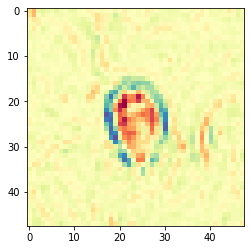

Epoch 141/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3721 - acc: 0.9940 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00141: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656736956847893, 'val_acc': 0.9816849936932435, 'loss': 0.3721092558505452, 'acc': 0.9940154497227613, 'lr': 9.999999e-13}


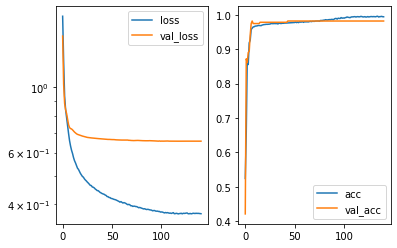

Predicted cell: Cells Probability: [[0.98805237]]
True Cell type: Cells
x [[0.41758984]]
True positional value x 0.2916666666666667
y [[0.6615805]]
True positional value y 0.7083333333333334


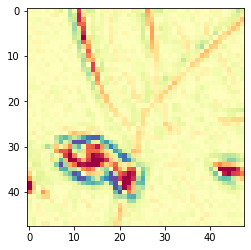

Epoch 142/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3738 - acc: 0.9940 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00142: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 00142: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656860697837103, 'val_acc': 0.9816849936932435, 'loss': 0.37379695124147483, 'acc': 0.9940154485720926, 'lr': 9.999999e-13}


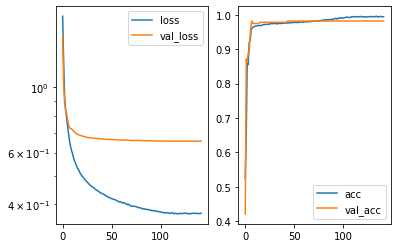

Predicted cell: Cells Probability: [[0.98401374]]
True Cell type: Cells
x [[0.56590927]]
True positional value x 0.5
y [[0.5459667]]
True positional value y 0.2916666666666667


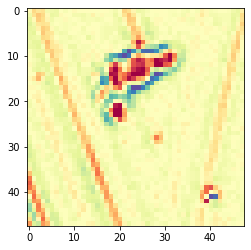

Epoch 143/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9940 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00143: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656751091445322, 'val_acc': 0.9816849936932435, 'loss': 0.37313326088618126, 'acc': 0.9940154497227613, 'lr': 9.999999e-14}


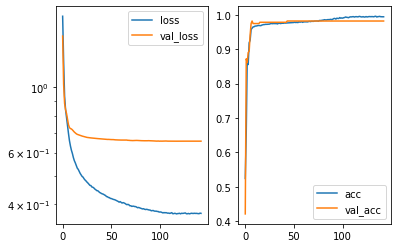

Predicted cell: Cells Probability: [[0.9988201]]
True Cell type: Cells
x [[0.49862236]]
True positional value x 0.7083333333333334
y [[0.8720653]]
True positional value y 0.7083333333333334


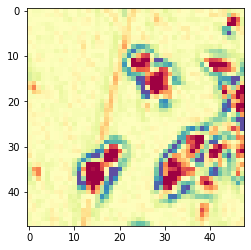

Epoch 144/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3721 - acc: 0.9946 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00144: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567052565651499, 'val_acc': 0.9816849936932435, 'loss': 0.3721050173619539, 'acc': 0.9945945985989221, 'lr': 9.999999e-14}


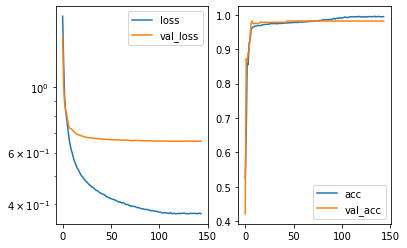

Predicted cell: Cells Probability: [[0.99466765]]
True Cell type: Cells
x [[0.9018449]]
True positional value x 0.5
y [[0.54654455]]
True positional value y 0.7083333333333334


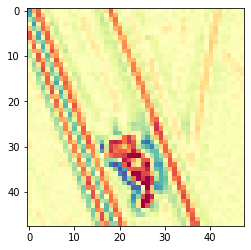

Epoch 145/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9940 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00145: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656838385395078, 'val_acc': 0.9816849936932435, 'loss': 0.3728253110725447, 'acc': 0.9940154485720926, 'lr': 9.999999e-14}


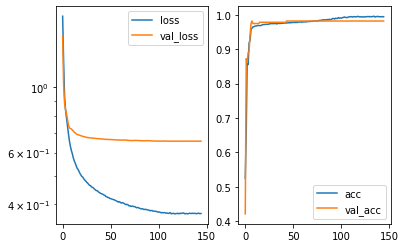

Predicted cell: Cells Probability: [[0.99185014]]
True Cell type: Cells
x [[0.5770557]]
True positional value x 0.7083333333333334
y [[0.688981]]
True positional value y 0.7083333333333334


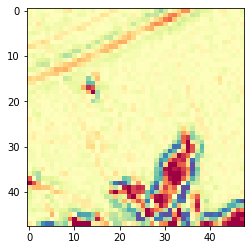

Epoch 146/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3727 - acc: 0.9948 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00146: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 00146: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568844469038995, 'val_acc': 0.9816849936932435, 'loss': 0.3726737465867665, 'acc': 0.9947876497585341, 'lr': 9.999999e-14}


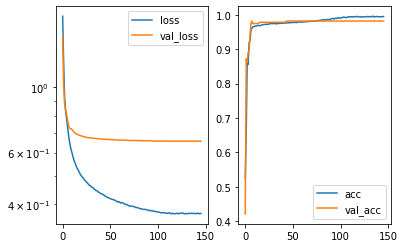

Predicted cell: Cells Probability: [[0.99608266]]
True Cell type: Cells
x [[0.5374426]]
True positional value x 0.2916666666666667
y [[0.11148807]]
True positional value y 0.5


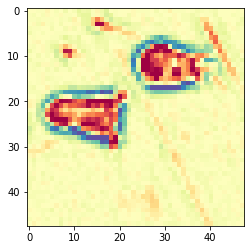

Epoch 147/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9948 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00147: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568483092409351, 'val_acc': 0.9816849936932435, 'loss': 0.3724065761308412, 'acc': 0.9947876497585341, 'lr': 9.999999e-15}


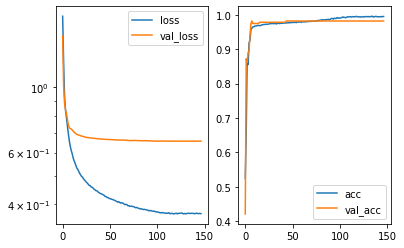

Predicted cell: Cells Probability: [[0.99306834]]
True Cell type: Cells
x [[0.5948004]]
True positional value x 0.7083333333333334
y [[0.7602]]
True positional value y 0.7083333333333334


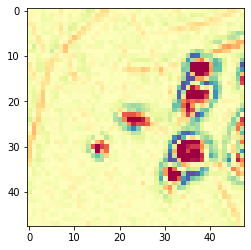

Epoch 148/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9952 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00148: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568072032142471, 'val_acc': 0.9816849936932435, 'loss': 0.37325391035282474, 'acc': 0.9951737497764205, 'lr': 9.999999e-15}


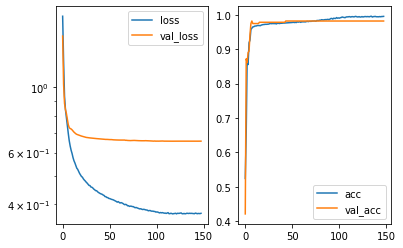

Predicted cell: Normal Probability: [[0.99395967]]
True Cell type: Normal
x [[0.5104004]]
True positional value x 0.5
y [[0.56253016]]
True positional value y 0.5


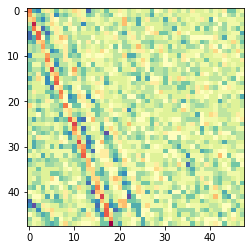

Epoch 149/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3721 - acc: 0.9952 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00149: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567561362252567, 'val_acc': 0.9816849936932435, 'loss': 0.3721275278960416, 'acc': 0.9951737497764205, 'lr': 9.999999e-15}


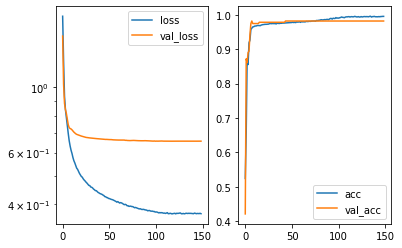

Predicted cell: Cells Probability: [[0.96954364]]
True Cell type: Cells
x [[0.56873816]]
True positional value x 0.7083333333333334
y [[0.45104146]]
True positional value y 0.2916666666666667


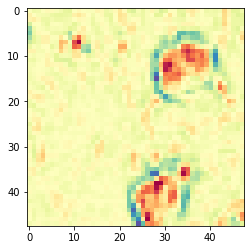

Epoch 150/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9948 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00150: ReduceLROnPlateau reducing learning rate to 9.999998977483753e-16.

Epoch 00150: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567836831777524, 'val_acc': 0.9816849936932435, 'loss': 0.3728860631642655, 'acc': 0.9947876486078653, 'lr': 9.999999e-15}


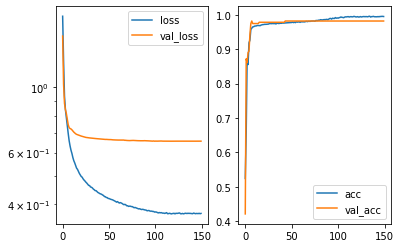

Predicted cell: Normal Probability: [[0.9869304]]
True Cell type: Normal
x [[0.60819787]]
True positional value x 0.5
y [[0.4323742]]
True positional value y 0.5


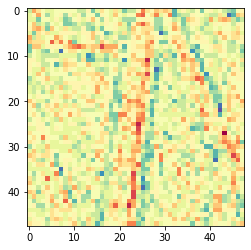

Epoch 151/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3730 - acc: 0.9936 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00151: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568922837138612, 'val_acc': 0.9816849936932435, 'loss': 0.37303783822243736, 'acc': 0.993629349704875, 'lr': 9.999999e-16}


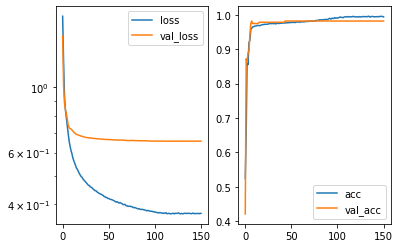

Predicted cell: Cells Probability: [[0.9825302]]
True Cell type: Cells
x [[0.40388805]]
True positional value x 0.2916666666666667
y [[0.71009034]]
True positional value y 0.7083333333333334


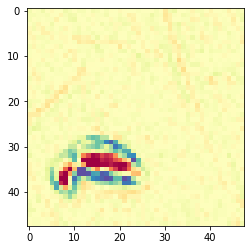

Epoch 152/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9954 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00152: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567701053270053, 'val_acc': 0.9816849936932435, 'loss': 0.3727615422723836, 'acc': 0.9953667997853636, 'lr': 9.999999e-16}


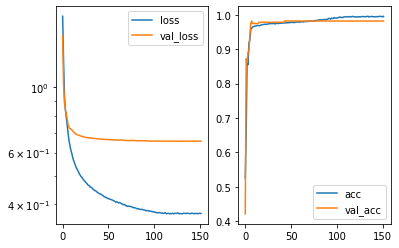

Predicted cell: Cells Probability: [[0.99014354]]
True Cell type: Cells
x [[0.3904716]]
True positional value x 0.5
y [[0.6690032]]
True positional value y 0.5


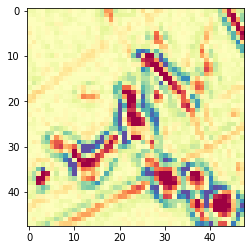

Epoch 153/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3727 - acc: 0.9932 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00153: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568131409721933, 'val_acc': 0.9816849936932435, 'loss': 0.37270535488386414, 'acc': 0.9932432485363198, 'lr': 9.999999e-16}


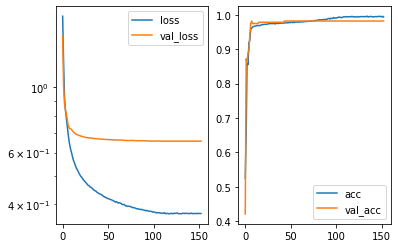

Predicted cell: Cells Probability: [[0.99368674]]
True Cell type: Cells
x [[0.32942542]]
True positional value x 0.2916666666666667
y [[0.38005894]]
True positional value y 0.2916666666666667


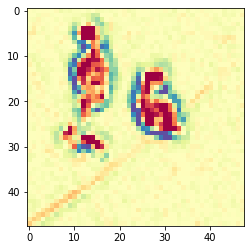

Epoch 154/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3726 - acc: 0.9952 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00154: ReduceLROnPlateau reducing learning rate to 9.999998977483754e-17.

Epoch 00154: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568264408862634, 'val_acc': 0.9816849936932435, 'loss': 0.37257682598235525, 'acc': 0.9951737486257516, 'lr': 9.999999e-16}


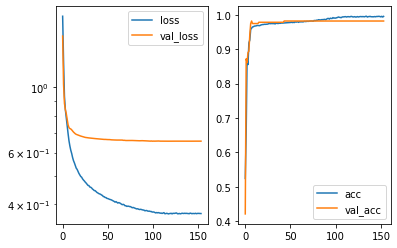

Predicted cell: Cells Probability: [[0.98164994]]
True Cell type: Cells
x [[0.52794534]]
True positional value x 0.5
y [[0.5855331]]
True positional value y 0.2916666666666667


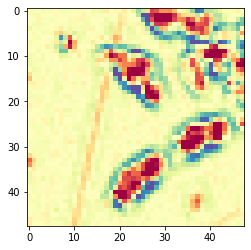

Epoch 155/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9950 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00155: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567489561580476, 'val_acc': 0.9816849936932435, 'loss': 0.37314364935440447, 'acc': 0.9949806997674773, 'lr': 9.999999e-17}


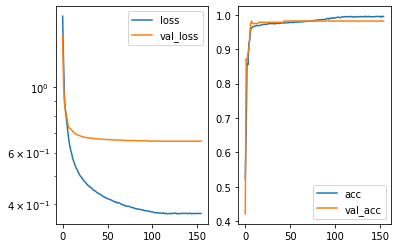

Predicted cell: Cells Probability: [[0.9902975]]
True Cell type: Cells
x [[0.57613695]]
True positional value x 0.7083333333333334
y [[0.3215576]]
True positional value y 0.2916666666666667


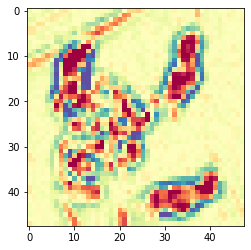

Epoch 156/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3725 - acc: 0.9946 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00156: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568850553952731, 'val_acc': 0.9816849936932435, 'loss': 0.3724973752922073, 'acc': 0.9945945997495909, 'lr': 9.999999e-17}


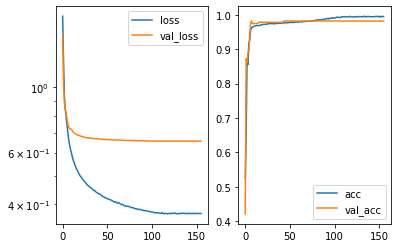

Predicted cell: Cells Probability: [[0.97121125]]
True Cell type: Cells
x [[0.34962153]]
True positional value x 0.5
y [[0.39063913]]
True positional value y 0.2916666666666667


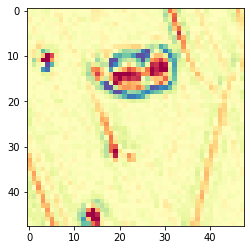

Epoch 157/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3744 - acc: 0.9942 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00157: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569400067294474, 'val_acc': 0.9816849936932435, 'loss': 0.374379538200997, 'acc': 0.9942084988111695, 'lr': 9.999999e-17}


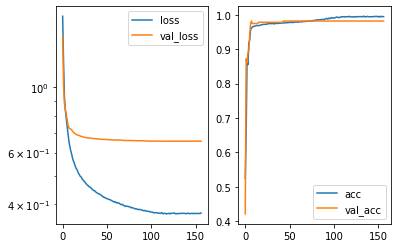

Predicted cell: Normal Probability: [[0.96573544]]
True Cell type: Normal
x [[0.43420774]]
True positional value x 0.5
y [[0.56999457]]
True positional value y 0.5


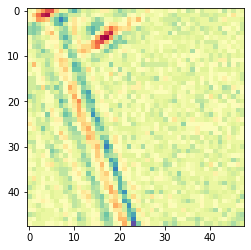

Epoch 158/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9952 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00158: ReduceLROnPlateau reducing learning rate to 9.999998845134856e-18.

Epoch 00158: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568942882202484, 'val_acc': 0.9816849936932435, 'loss': 0.3722012950876965, 'acc': 0.9951737497764205, 'lr': 9.999999e-17}


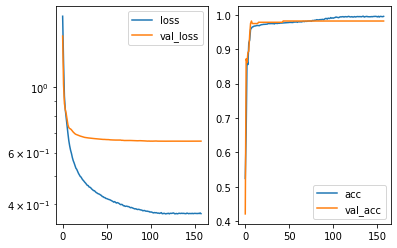

Predicted cell: Cells Probability: [[0.9989674]]
True Cell type: Cells
x [[0.19812699]]
True positional value x 0.2916666666666667
y [[0.85051733]]
True positional value y 0.7083333333333334


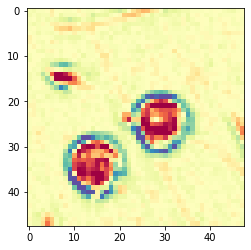

Epoch 159/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3717 - acc: 0.9954 - val_loss: 0.6570 - val_acc: 0.9817

Epoch 00159: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6570054506644224, 'val_acc': 0.9816849936932435, 'loss': 0.3716882344148334, 'acc': 0.9953667997853636, 'lr': 9.999999e-18}


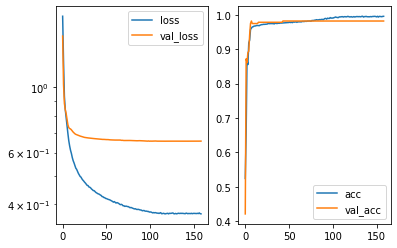

Predicted cell: Cells Probability: [[0.94568264]]
True Cell type: Cells
x [[0.46009567]]
True positional value x 0.7083333333333334
y [[0.42241585]]
True positional value y 0.5


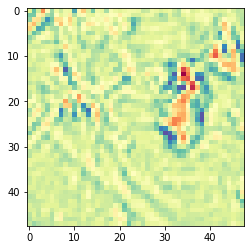

Epoch 160/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3720 - acc: 0.9952 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00160: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568374188391717, 'val_acc': 0.9816849936932435, 'loss': 0.37200955223853066, 'acc': 0.9951737497764205, 'lr': 9.999999e-18}


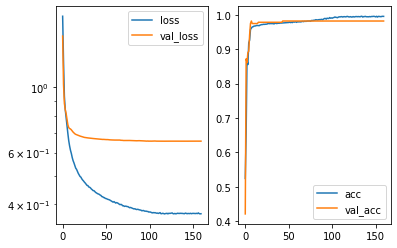

Predicted cell: Cells Probability: [[0.94810766]]
True Cell type: Cells
x [[0.84072644]]
True positional value x 0.7083333333333334
y [[0.6666699]]
True positional value y 0.5


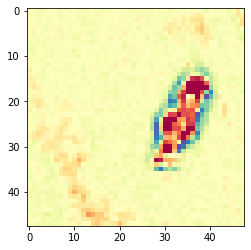

Epoch 161/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9938 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00161: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565886497934222, 'val_acc': 0.9816849936932435, 'loss': 0.3732077605936058, 'acc': 0.9938223985631494, 'lr': 9.999999e-18}


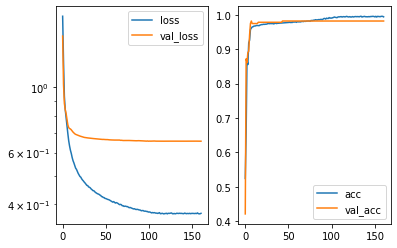

Predicted cell: Normal Probability: [[0.9698267]]
True Cell type: Normal
x [[0.58597267]]
True positional value x 0.5
y [[0.49909332]]
True positional value y 0.5


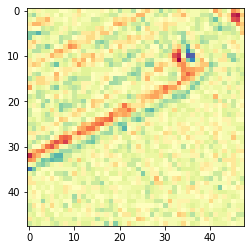

Epoch 162/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9940 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00162: ReduceLROnPlateau reducing learning rate to 9.999999010570977e-19.

Epoch 00162: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567272290642008, 'val_acc': 0.9816849936932435, 'loss': 0.3734138342174324, 'acc': 0.9940154497227613, 'lr': 9.999999e-18}


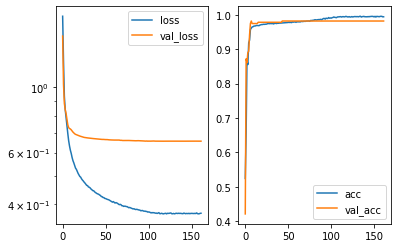

Predicted cell: Normal Probability: [[0.9904384]]
True Cell type: Normal
x [[0.48657978]]
True positional value x 0.5
y [[0.5100632]]
True positional value y 0.5


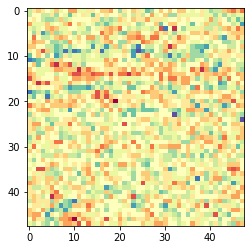

Epoch 163/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3739 - acc: 0.9944 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00163: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568671464920044, 'val_acc': 0.9816849936932435, 'loss': 0.373877572852212, 'acc': 0.9944015497406478, 'lr': 9.999999e-19}


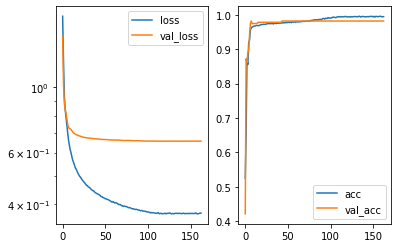

Predicted cell: Cells Probability: [[0.9946471]]
True Cell type: Cells
x [[0.90152615]]
True positional value x 0.5
y [[0.5453965]]
True positional value y 0.7083333333333334


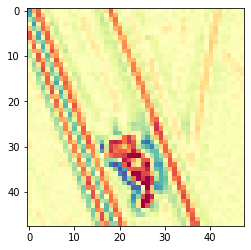

Epoch 164/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9932 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00164: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569296796243269, 'val_acc': 0.9816849936932435, 'loss': 0.37343783854977963, 'acc': 0.9932432496869886, 'lr': 9.999999e-19}


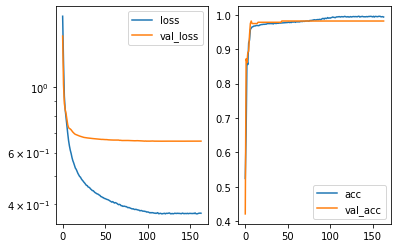

Predicted cell: Cells Probability: [[0.9962817]]
True Cell type: Cells
x [[0.65879613]]
True positional value x 0.5
y [[0.88926136]]
True positional value y 0.7083333333333334


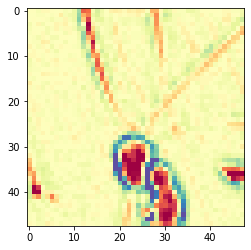

Epoch 165/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9944 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00165: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569455418831263, 'val_acc': 0.9816849936932435, 'loss': 0.37239271172225247, 'acc': 0.9944015497406478, 'lr': 9.999999e-19}


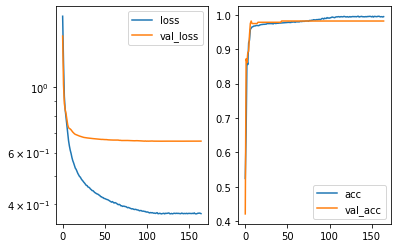

Predicted cell: Cells Probability: [[0.99771404]]
True Cell type: Cells
x [[0.17239182]]
True positional value x 0.2916666666666667
y [[0.37484768]]
True positional value y 0.2916666666666667


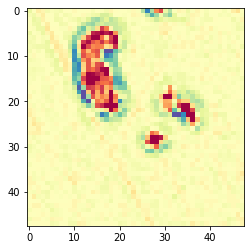

Epoch 166/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9931 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00166: ReduceLROnPlateau reducing learning rate to 9.999999424161285e-20.

Epoch 00166: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567512451510726, 'val_acc': 0.9816849936932435, 'loss': 0.3733379296584479, 'acc': 0.9930501996780454, 'lr': 9.999999e-19}


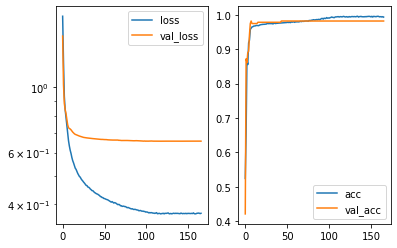

Predicted cell: Cells Probability: [[0.9946635]]
True Cell type: Cells
x [[0.9018845]]
True positional value x 0.5
y [[0.5462846]]
True positional value y 0.7083333333333334


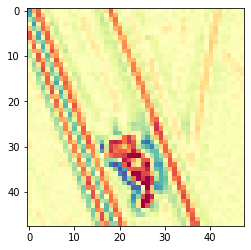

Epoch 167/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9940 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00167: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568618250853849, 'val_acc': 0.9816849936932435, 'loss': 0.3721642522968381, 'acc': 0.9940154497227613, 'lr': 1e-19}


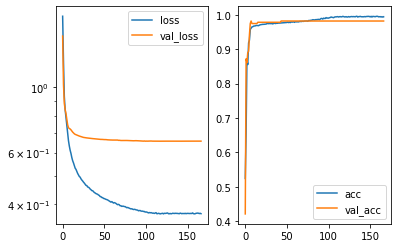

Predicted cell: Cells Probability: [[0.99908984]]
True Cell type: Cells
x [[0.41647196]]
True positional value x 0.2916666666666667
y [[0.4210077]]
True positional value y 0.5


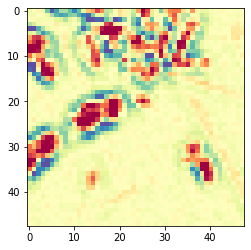

Epoch 168/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9946 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00168: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567994279739184, 'val_acc': 0.9816849936932435, 'loss': 0.3721821487640322, 'acc': 0.9945945997495909, 'lr': 1e-19}


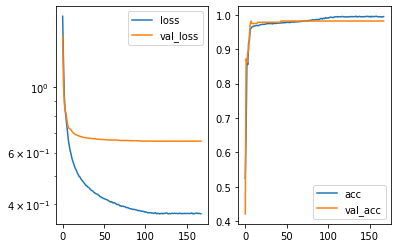

Predicted cell: Cells Probability: [[0.98957527]]
True Cell type: Cells
x [[0.3708649]]
True positional value x 0.5
y [[0.5253982]]
True positional value y 0.5


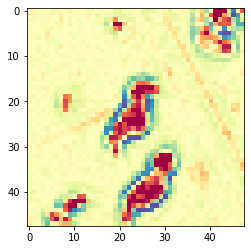

Epoch 169/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9938 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00169: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569061294580117, 'val_acc': 0.9816849936932435, 'loss': 0.3728489427032618, 'acc': 0.9938223974124806, 'lr': 1e-19}


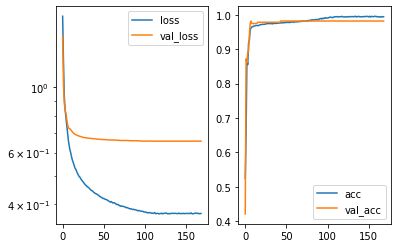

Predicted cell: Normal Probability: [[0.9961212]]
True Cell type: Normal
x [[0.5007527]]
True positional value x 0.5
y [[0.5760568]]
True positional value y 0.5


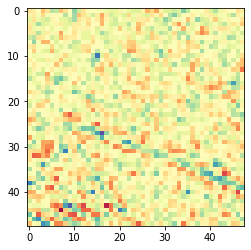

Epoch 170/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9948 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00170: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-21.

Epoch 00170: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568098611884065, 'val_acc': 0.9816849936932435, 'loss': 0.3728382949893539, 'acc': 0.9947876497585341, 'lr': 1e-19}


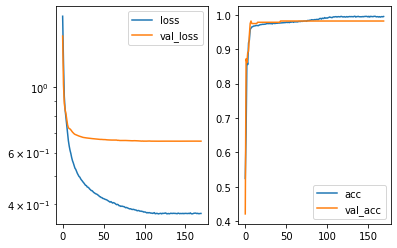

Predicted cell: Cells Probability: [[0.99018455]]
True Cell type: Cells
x [[0.17010354]]
True positional value x 0.2916666666666667
y [[0.54606193]]
True positional value y 0.5


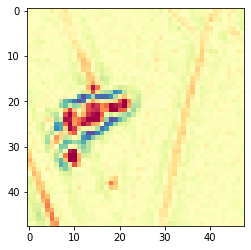

Epoch 171/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3715 - acc: 0.9946 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00171: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567146201710125, 'val_acc': 0.9816849936932435, 'loss': 0.3715068412563515, 'acc': 0.9945945997495909, 'lr': 1e-20}


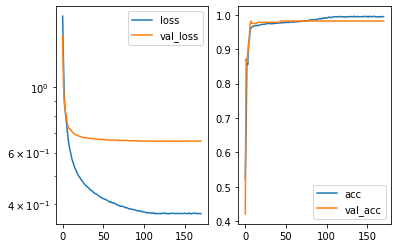

Predicted cell: Cells Probability: [[0.9990871]]
True Cell type: Cells
x [[0.41615137]]
True positional value x 0.2916666666666667
y [[0.42165515]]
True positional value y 0.5


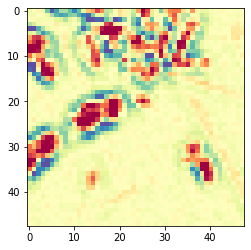

Epoch 172/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3721 - acc: 0.9940 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00172: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565772139982426, 'val_acc': 0.9816849936932435, 'loss': 0.3721368488888023, 'acc': 0.9940154497227613, 'lr': 1e-20}


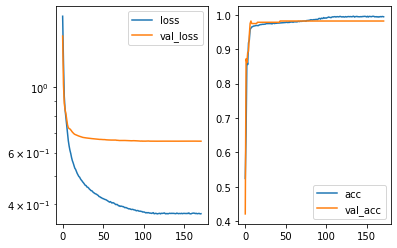

Predicted cell: Cells Probability: [[0.9856031]]
True Cell type: Cells
x [[0.6334151]]
True positional value x 0.7083333333333334
y [[0.39130014]]
True positional value y 0.7083333333333334


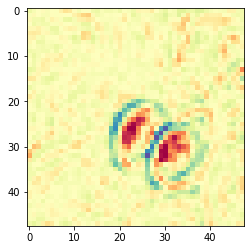

Epoch 173/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9950 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00173: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565999945441445, 'val_acc': 0.9816849936932435, 'loss': 0.3724429305916127, 'acc': 0.9949806997674773, 'lr': 1e-20}


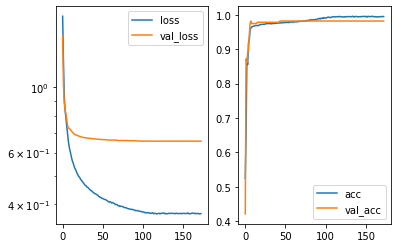

Predicted cell: Cells Probability: [[0.9960265]]
True Cell type: Cells
x [[0.49765593]]
True positional value x 0.7083333333333334
y [[0.71026945]]
True positional value y 0.5


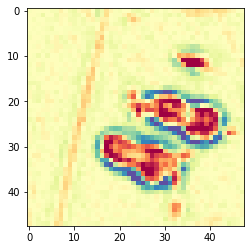

Epoch 174/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3737 - acc: 0.9934 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00174: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-22.

Epoch 00174: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565571049630861, 'val_acc': 0.9816849936932435, 'loss': 0.3737214387153567, 'acc': 0.9934362996959318, 'lr': 1e-20}


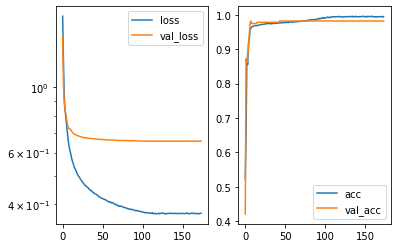

Predicted cell: Cells Probability: [[0.9856213]]
True Cell type: Cells
x [[0.6332614]]
True positional value x 0.7083333333333334
y [[0.39136642]]
True positional value y 0.7083333333333334


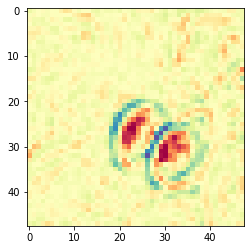

Epoch 175/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3736 - acc: 0.9938 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00175: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566260690654154, 'val_acc': 0.9816849936932435, 'loss': 0.3736006349440247, 'acc': 0.9938223985631494, 'lr': 1e-21}


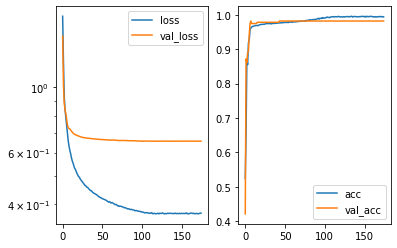

Predicted cell: Cells Probability: [[0.9691992]]
True Cell type: Cells
x [[0.3407833]]
True positional value x 0.5
y [[0.3798902]]
True positional value y 0.2916666666666667


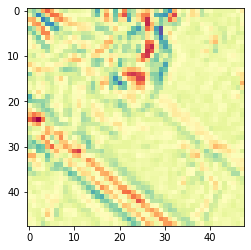

Epoch 176/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3725 - acc: 0.9942 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00176: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567513571554051, 'val_acc': 0.9816849936932435, 'loss': 0.37245237769767586, 'acc': 0.9942084997317046, 'lr': 1e-21}


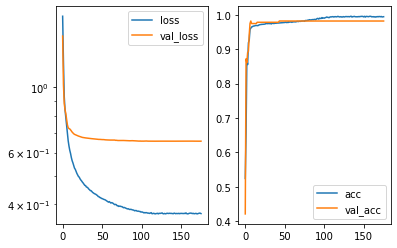

Predicted cell: Cells Probability: [[0.9940447]]
True Cell type: Cells
x [[0.33910528]]
True positional value x 0.2916666666666667
y [[0.7824808]]
True positional value y 0.7083333333333334


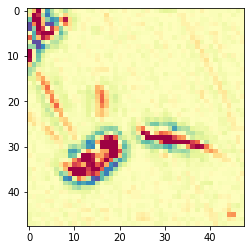

Epoch 177/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9940 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00177: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656675901823428, 'val_acc': 0.9816849936932435, 'loss': 0.3722404363532784, 'acc': 0.9940154485720926, 'lr': 1e-21}


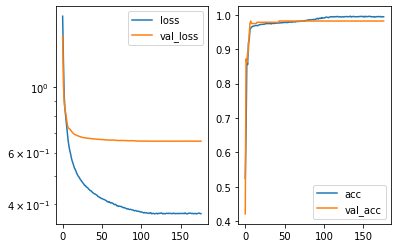

Predicted cell: Cells Probability: [[0.9845515]]
True Cell type: Cells
x [[0.688535]]
True positional value x 0.7083333333333334
y [[0.33104995]]
True positional value y 0.2916666666666667


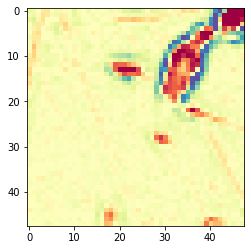

Epoch 178/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9946 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00178: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-23.

Epoch 00178: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565549222977607, 'val_acc': 0.9816849936932435, 'loss': 0.373149081201627, 'acc': 0.9945945997495909, 'lr': 1e-21}


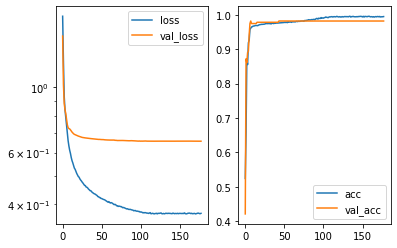

Predicted cell: Cells Probability: [[0.97391486]]
True Cell type: Cells
x [[0.57674927]]
True positional value x 0.7083333333333334
y [[0.40477672]]
True positional value y 0.7083333333333334


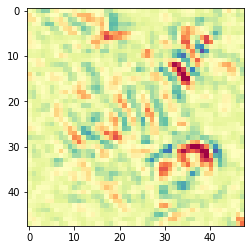

Epoch 179/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3727 - acc: 0.9940 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00179: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565640339484582, 'val_acc': 0.9816849936932435, 'loss': 0.3727426365535692, 'acc': 0.9940154497227613, 'lr': 9.9999997e-23}


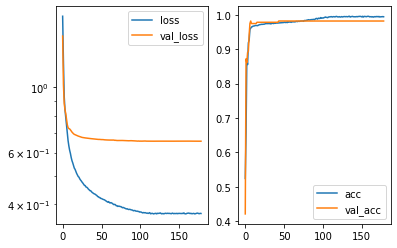

Predicted cell: Cells Probability: [[0.9867438]]
True Cell type: Cells
x [[0.46056372]]
True positional value x 0.2916666666666667
y [[0.78705955]]
True positional value y 0.7083333333333334


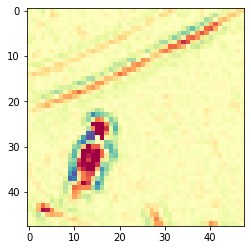

Epoch 180/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9940 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00180: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566584570940598, 'val_acc': 0.9816849936932435, 'loss': 0.3729160409636479, 'acc': 0.9940154497227613, 'lr': 9.9999997e-23}


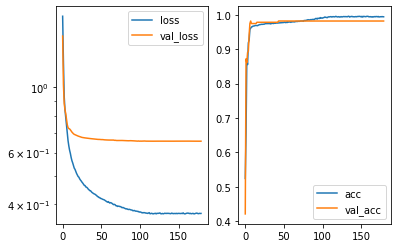

Predicted cell: Cells Probability: [[0.98402274]]
True Cell type: Cells
x [[0.5660327]]
True positional value x 0.5
y [[0.5459695]]
True positional value y 0.2916666666666667


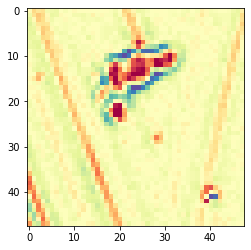

Epoch 181/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9940 - val_loss: 0.6565 - val_acc: 0.9817

Epoch 00181: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565474101475307, 'val_acc': 0.9816849936932435, 'loss': 0.37320785368271314, 'acc': 0.9940154497227613, 'lr': 9.9999997e-23}


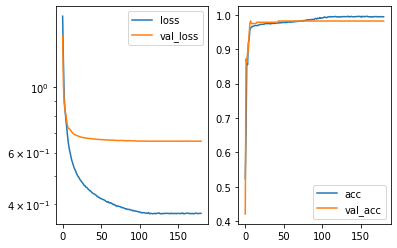

Predicted cell: Cells Probability: [[0.9944323]]
True Cell type: Cells
x [[0.544794]]
True positional value x 0.5
y [[0.5125331]]
True positional value y 0.5


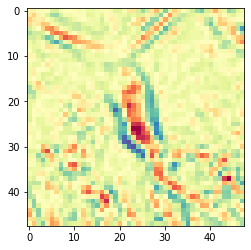

Epoch 182/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9938 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00182: ReduceLROnPlateau reducing learning rate to 9.999999682655227e-24.

Epoch 00182: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566866016213274, 'val_acc': 0.9816849936932435, 'loss': 0.37216492141075574, 'acc': 0.9938223997138181, 'lr': 9.9999997e-23}


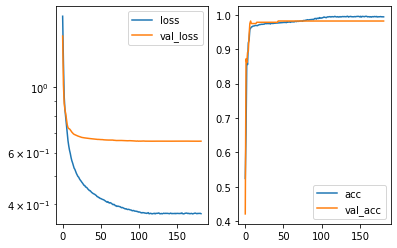

Predicted cell: Cells Probability: [[0.90001416]]
True Cell type: Cells
x [[0.33279952]]
True positional value x 0.2916666666666667
y [[0.3500481]]
True positional value y 0.2916666666666667


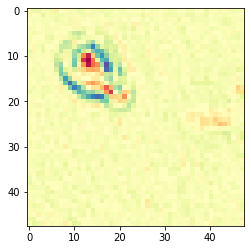

Epoch 183/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3726 - acc: 0.9954 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00183: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567854114941188, 'val_acc': 0.9816849936932435, 'loss': 0.37262334878840503, 'acc': 0.9953667997853636, 'lr': 1e-23}


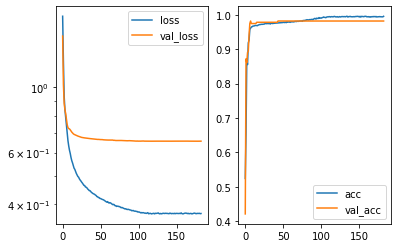

Predicted cell: Cells Probability: [[0.9868155]]
True Cell type: Cells
x [[0.460093]]
True positional value x 0.2916666666666667
y [[0.78720564]]
True positional value y 0.7083333333333334


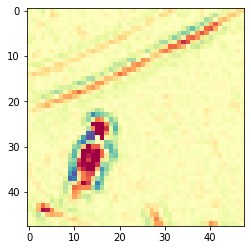

Epoch 184/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3723 - acc: 0.9946 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00184: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568827332157792, 'val_acc': 0.9816849936932435, 'loss': 0.37229708734626477, 'acc': 0.9945945997495909, 'lr': 1e-23}


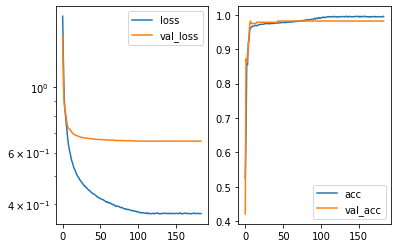

Predicted cell: Cells Probability: [[0.98162854]]
True Cell type: Cells
x [[0.5285376]]
True positional value x 0.5
y [[0.58622414]]
True positional value y 0.2916666666666667


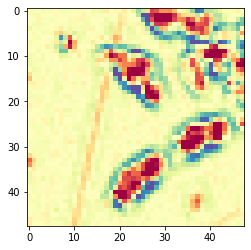

Epoch 185/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3720 - acc: 0.9940 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00185: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568520099688799, 'val_acc': 0.9816849936932435, 'loss': 0.3720012499328746, 'acc': 0.9940154497227613, 'lr': 1e-23}


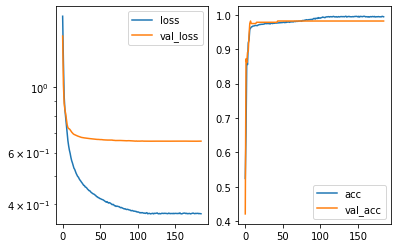

Predicted cell: Cells Probability: [[0.970293]]
True Cell type: Cells
x [[0.6163573]]
True positional value x 0.2916666666666667
y [[0.49490857]]
True positional value y 0.2916666666666667


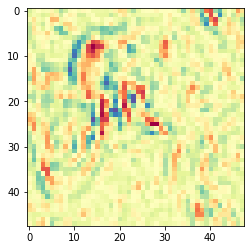

Epoch 186/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9932 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00186: ReduceLROnPlateau reducing learning rate to 9.999999998199588e-25.

Epoch 00186: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656939047160166, 'val_acc': 0.9816849936932435, 'loss': 0.3732632520576241, 'acc': 0.9932432496869886, 'lr': 1e-23}


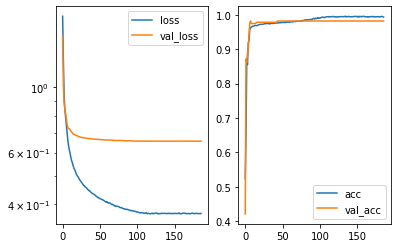

Predicted cell: Cells Probability: [[0.7975743]]
True Cell type: Cells
x [[0.73346335]]
True positional value x 0.7083333333333334
y [[0.46843]]
True positional value y 0.2916666666666667


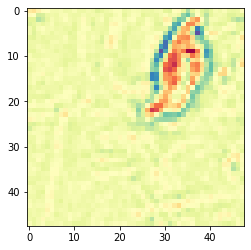

Epoch 187/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3725 - acc: 0.9942 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00187: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656799635607681, 'val_acc': 0.9816849936932435, 'loss': 0.37249335289922, 'acc': 0.9942084997317046, 'lr': 1e-24}


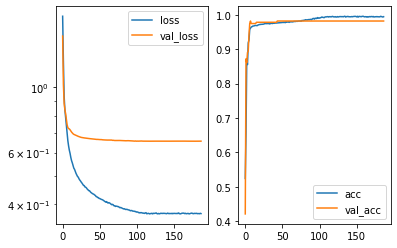

Predicted cell: Normal Probability: [[0.9904439]]
True Cell type: Normal
x [[0.48648214]]
True positional value x 0.5
y [[0.5100912]]
True positional value y 0.5


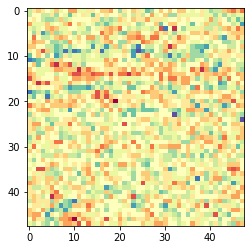

Epoch 188/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3713 - acc: 0.9938 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00188: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568693171490679, 'val_acc': 0.9816849936932435, 'loss': 0.3712985492581106, 'acc': 0.9938223997138181, 'lr': 1e-24}


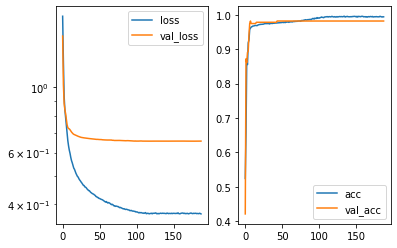

Predicted cell: Cells Probability: [[0.9978684]]
True Cell type: Cells
x [[0.67083234]]
True positional value x 0.7083333333333334
y [[0.17247431]]
True positional value y 0.2916666666666667


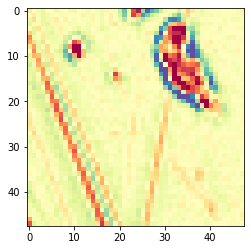

Epoch 189/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9940 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00189: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568565235469804, 'val_acc': 0.9816849936932435, 'loss': 0.3733303587178926, 'acc': 0.9940154497227613, 'lr': 1e-24}


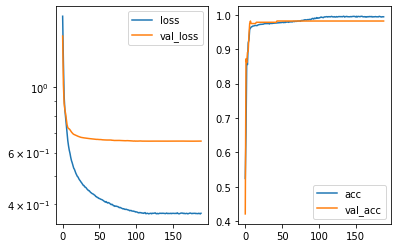

Predicted cell: Cells Probability: [[0.99901605]]
True Cell type: Cells
x [[0.50130516]]
True positional value x 0.2916666666666667
y [[0.58647937]]
True positional value y 0.7083333333333334


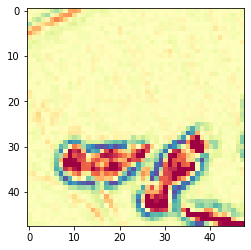

Epoch 190/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3726 - acc: 0.9948 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00190: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569158092086569, 'val_acc': 0.9816849936932435, 'loss': 0.37260103801042416, 'acc': 0.9947876497585341, 'lr': 1e-24}


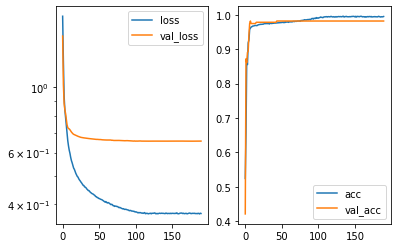

Predicted cell: Cells Probability: [[0.9952821]]
True Cell type: Cells
x [[0.37857333]]
True positional value x 0.5
y [[0.76432234]]
True positional value y 0.5


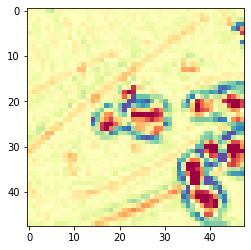

Epoch 191/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9927 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00191: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569148494210435, 'val_acc': 0.9816849936932435, 'loss': 0.3728530016875175, 'acc': 0.9926640973588214, 'lr': 1e-24}


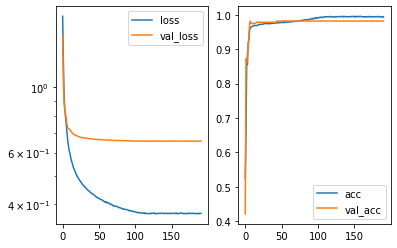

Predicted cell: Normal Probability: [[0.9696536]]
True Cell type: Normal
x [[0.58631474]]
True positional value x 0.5
y [[0.49781045]]
True positional value y 0.5


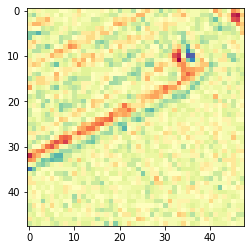

Epoch 192/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3723 - acc: 0.9948 - val_loss: 0.6570 - val_acc: 0.9817

Epoch 00192: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-25.

Epoch 00192: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6570011292185102, 'val_acc': 0.9816849936932435, 'loss': 0.3723047830193199, 'acc': 0.9947876497585341, 'lr': 1e-24}


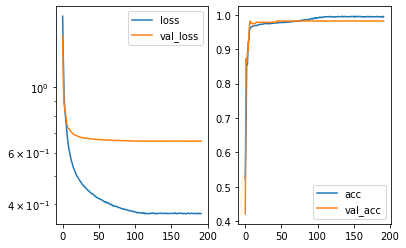

Predicted cell: Cells Probability: [[0.9834818]]
True Cell type: Cells
x [[0.56460726]]
True positional value x 0.7083333333333334
y [[0.69785213]]
True positional value y 0.5


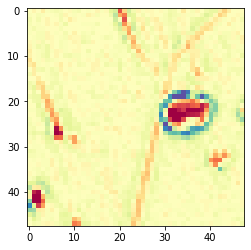

Epoch 193/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3730 - acc: 0.9946 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00193: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567558043605679, 'val_acc': 0.9816849936932435, 'loss': 0.37299184840618416, 'acc': 0.9945945997495909, 'lr': 1e-25}


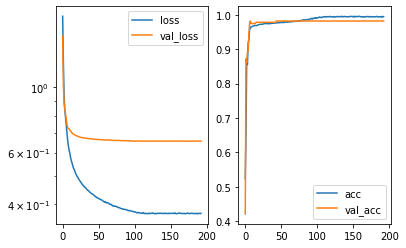

Predicted cell: Cells Probability: [[0.9787209]]
True Cell type: Cells
x [[0.7586826]]
True positional value x 0.7083333333333334
y [[0.2793132]]
True positional value y 0.2916666666666667


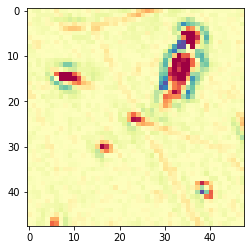

Epoch 194/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9938 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00194: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566432948077555, 'val_acc': 0.9816849936932435, 'loss': 0.3730928872542952, 'acc': 0.9938223987932832, 'lr': 1e-25}


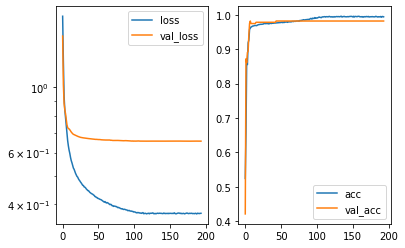

Predicted cell: Cells Probability: [[0.98451555]]
True Cell type: Cells
x [[0.68791]]
True positional value x 0.7083333333333334
y [[0.33019736]]
True positional value y 0.2916666666666667


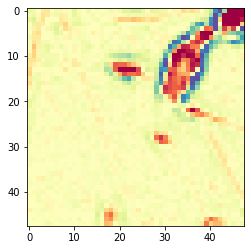

Epoch 195/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3718 - acc: 0.9950 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00195: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567183687136724, 'val_acc': 0.9816849936932435, 'loss': 0.37181477070315005, 'acc': 0.9949806997674773, 'lr': 1e-25}


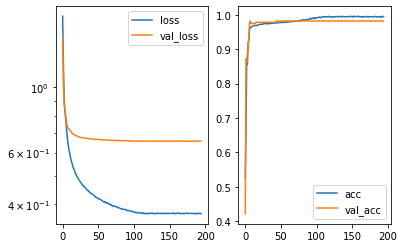

Predicted cell: Cells Probability: [[0.98988605]]
True Cell type: Cells
x [[0.7264206]]
True positional value x 0.7083333333333334
y [[0.54424286]]
True positional value y 0.7083333333333334


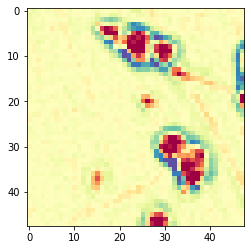

Epoch 196/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3725 - acc: 0.9932 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00196: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-26.

Epoch 00196: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566638675801483, 'val_acc': 0.9816849936932435, 'loss': 0.3725356672491346, 'acc': 0.9932432485363198, 'lr': 1e-25}


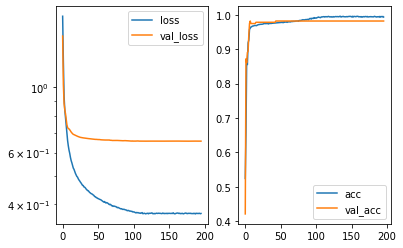

Predicted cell: Cells Probability: [[0.996031]]
True Cell type: Cells
x [[0.49794137]]
True positional value x 0.7083333333333334
y [[0.71001786]]
True positional value y 0.5


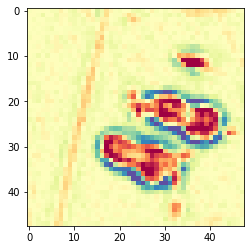

Epoch 197/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3720 - acc: 0.9946 - val_loss: 0.6570 - val_acc: 0.9817

Epoch 00197: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569733617506621, 'val_acc': 0.9816849936932435, 'loss': 0.3719951410321195, 'acc': 0.9945945997495909, 'lr': 1e-26}


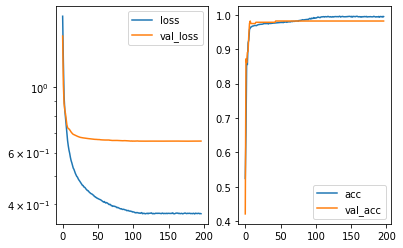

Predicted cell: Cells Probability: [[0.98108727]]
True Cell type: Cells
x [[0.7639571]]
True positional value x 0.5
y [[0.37348032]]
True positional value y 0.2916666666666667


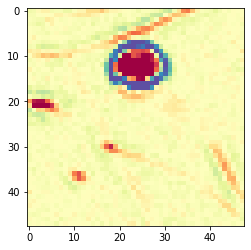

Epoch 198/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9938 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00198: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568631082227379, 'val_acc': 0.9816849936932435, 'loss': 0.37280009807767095, 'acc': 0.9938223985631494, 'lr': 1e-26}


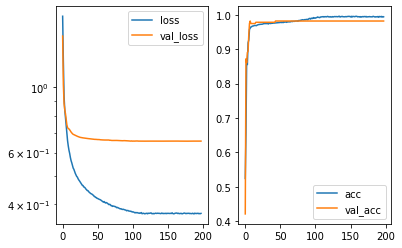

Predicted cell: Cells Probability: [[0.972042]]
True Cell type: Cells
x [[0.6434256]]
True positional value x 0.7083333333333334
y [[0.59761643]]
True positional value y 0.5


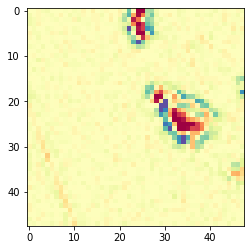

Epoch 199/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3727 - acc: 0.9944 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00199: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656863727194049, 'val_acc': 0.9816849936932435, 'loss': 0.3726619599408625, 'acc': 0.9944015497406478, 'lr': 1e-26}


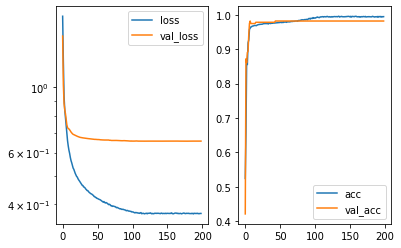

Predicted cell: Cells Probability: [[0.9905545]]
True Cell type: Cells
x [[0.31211108]]
True positional value x 0.2916666666666667
y [[0.56868297]]
True positional value y 0.7083333333333334


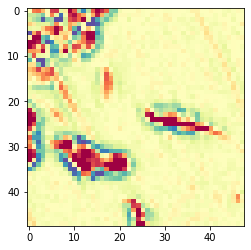

Epoch 200/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3723 - acc: 0.9944 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00200: ReduceLROnPlateau reducing learning rate to 9.999999887266024e-28.

Epoch 00200: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568888251161401, 'val_acc': 0.9816849936932435, 'loss': 0.372339357280363, 'acc': 0.9944015474393101, 'lr': 1e-26}


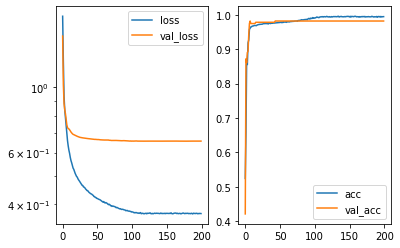

Predicted cell: Normal Probability: [[0.969648]]
True Cell type: Normal
x [[0.5864092]]
True positional value x 0.5
y [[0.49775872]]
True positional value y 0.5


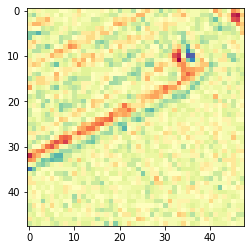

Epoch 201/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3709 - acc: 0.9946 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00201: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567839239979838, 'val_acc': 0.9816849936932435, 'loss': 0.3709357953900076, 'acc': 0.9945945997495909, 'lr': 1e-27}


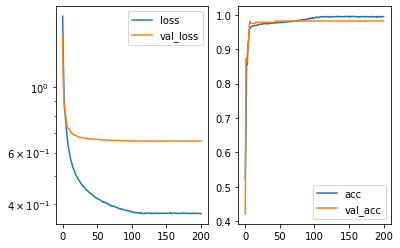

Predicted cell: Cells Probability: [[0.98251843]]
True Cell type: Cells
x [[0.40383938]]
True positional value x 0.2916666666666667
y [[0.7101385]]
True positional value y 0.7083333333333334


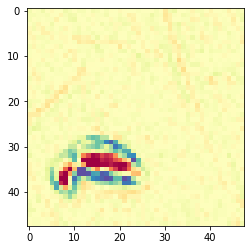

Epoch 202/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3730 - acc: 0.9946 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00202: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567104825606713, 'val_acc': 0.9816849936932435, 'loss': 0.3730215465930438, 'acc': 0.9945945997495909, 'lr': 1e-27}


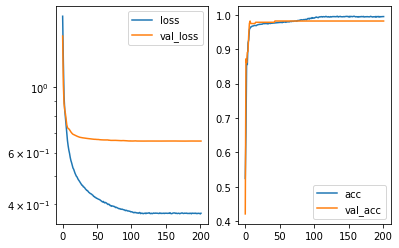

Predicted cell: Cells Probability: [[0.9946391]]
True Cell type: Cells
x [[0.8119992]]
True positional value x 0.7083333333333334
y [[0.21780662]]
True positional value y 0.2916666666666667


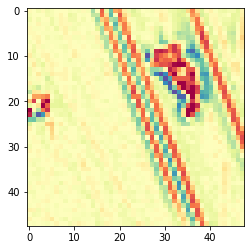

Epoch 203/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9952 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00203: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568029383163312, 'val_acc': 0.9816849936932435, 'loss': 0.37239845114325004, 'acc': 0.9951737497764205, 'lr': 1e-27}


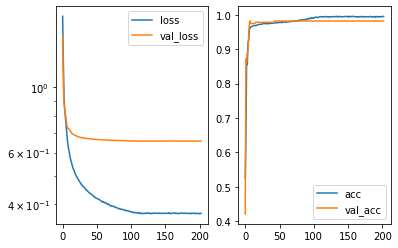

Predicted cell: Cells Probability: [[0.972398]]
True Cell type: Cells
x [[0.24255033]]
True positional value x 0.5
y [[0.2937909]]
True positional value y 0.7083333333333334


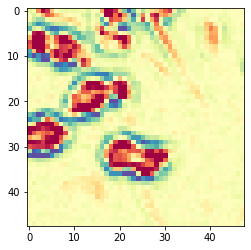

Epoch 204/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3736 - acc: 0.9925 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00204: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566548266690293, 'val_acc': 0.9816849936932435, 'loss': 0.37355751455060304, 'acc': 0.9924710473498782, 'lr': 1e-27}


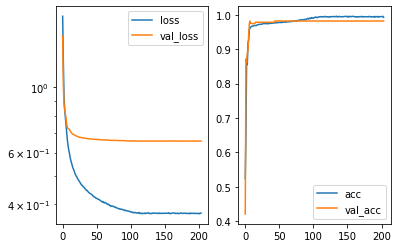

Predicted cell: Cells Probability: [[0.9014349]]
True Cell type: Cells
x [[0.36155707]]
True positional value x 0.2916666666666667
y [[0.6844554]]
True positional value y 0.7083333333333334


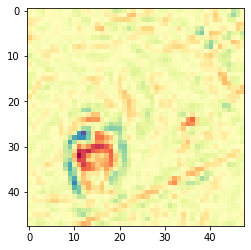

Epoch 205/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9940 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00205: ReduceLROnPlateau reducing learning rate to 1.0000000272452012e-28.

Epoch 00205: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567935736188085, 'val_acc': 0.9816849936932435, 'loss': 0.37336077434676035, 'acc': 0.9940154485720926, 'lr': 1e-27}


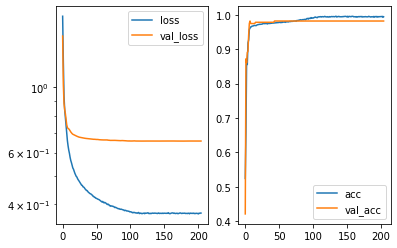

Predicted cell: Cells Probability: [[0.987778]]
True Cell type: Cells
x [[0.4781167]]
True positional value x 0.5
y [[0.20143352]]
True positional value y 0.2916666666666667


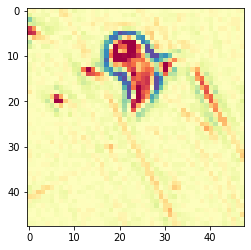

Epoch 206/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9940 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00206: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656795084476471, 'val_acc': 0.9816849936932435, 'loss': 0.3731637169035245, 'acc': 0.9940154497227613, 'lr': 1e-28}


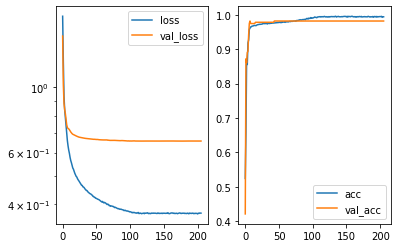

Predicted cell: Cells Probability: [[0.98387617]]
True Cell type: Cells
x [[0.7414273]]
True positional value x 0.5
y [[0.5122575]]
True positional value y 0.2916666666666667


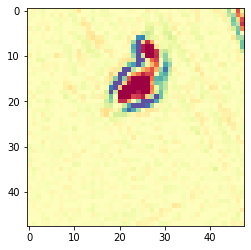

Epoch 207/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9944 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00207: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567916409436599, 'val_acc': 0.9816849936932435, 'loss': 0.37244886643177755, 'acc': 0.9944015497406478, 'lr': 1e-28}


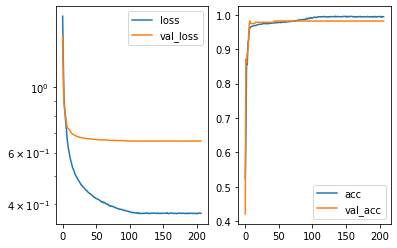

Predicted cell: Cells Probability: [[0.9826434]]
True Cell type: Cells
x [[0.80584276]]
True positional value x 0.7083333333333334
y [[0.4400221]]
True positional value y 0.2916666666666667


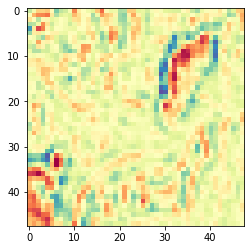

Epoch 208/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3723 - acc: 0.9946 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00208: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567672329507904, 'val_acc': 0.9816849936932435, 'loss': 0.37233673306505655, 'acc': 0.9945945997495909, 'lr': 1e-28}


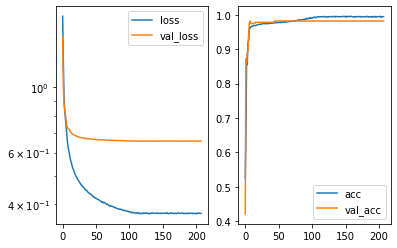

Predicted cell: Normal Probability: [[0.9925608]]
True Cell type: Normal
x [[0.48337066]]
True positional value x 0.5
y [[0.39308637]]
True positional value y 0.5


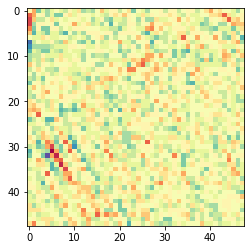

Epoch 209/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3726 - acc: 0.9952 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00209: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-29.

Epoch 00209: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568367027101063, 'val_acc': 0.9816849936932435, 'loss': 0.37262502128553204, 'acc': 0.9951737497764205, 'lr': 1e-28}


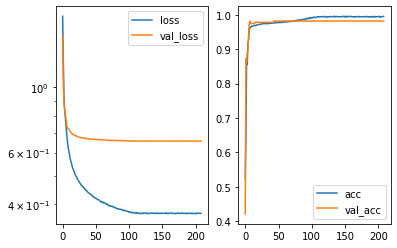

Predicted cell: Cells Probability: [[0.96608335]]
True Cell type: Cells
x [[0.2709179]]
True positional value x 0.2916666666666667
y [[0.59937656]]
True positional value y 0.2916666666666667


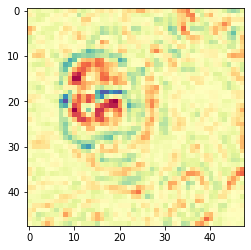

Epoch 210/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9929 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00210: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567153183968513, 'val_acc': 0.9816849936932435, 'loss': 0.3733005158919625, 'acc': 0.9928571485184334, 'lr': 1e-29}


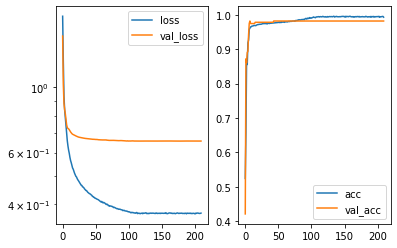

Predicted cell: Cells Probability: [[0.9810792]]
True Cell type: Cells
x [[0.45846403]]
True positional value x 0.2916666666666667
y [[0.22019309]]
True positional value y 0.2916666666666667


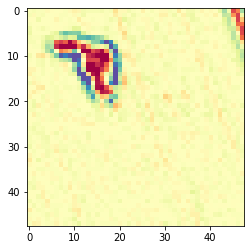

Epoch 211/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9931 - val_loss: 0.6564 - val_acc: 0.9817

Epoch 00211: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6564478380776151, 'val_acc': 0.9816849936932435, 'loss': 0.37333121343469067, 'acc': 0.9930501985273766, 'lr': 1e-29}


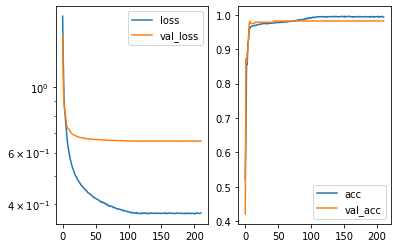

Predicted cell: Cells Probability: [[0.9435601]]
True Cell type: Cells
x [[0.5102134]]
True positional value x 0.5
y [[0.2755783]]
True positional value y 0.2916666666666667


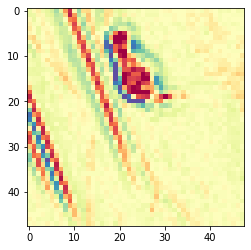

Epoch 212/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3721 - acc: 0.9954 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00212: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656623994692778, 'val_acc': 0.9816849936932435, 'loss': 0.3721450234702195, 'acc': 0.9953667997853636, 'lr': 1e-29}


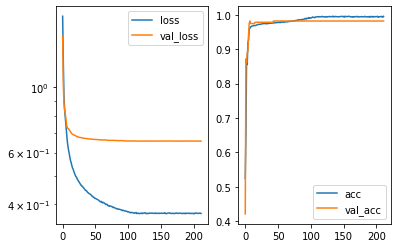

Predicted cell: Cells Probability: [[0.99786156]]
True Cell type: Cells
x [[0.67087036]]
True positional value x 0.7083333333333334
y [[0.17209418]]
True positional value y 0.2916666666666667


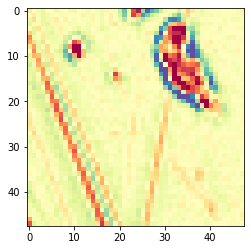

Epoch 213/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9938 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00213: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-30.

Epoch 00213: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566662216361189, 'val_acc': 0.9816849936932435, 'loss': 0.372156025935324, 'acc': 0.9938223997138181, 'lr': 1e-29}


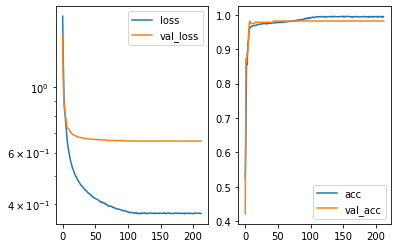

Predicted cell: Cells Probability: [[0.9591182]]
True Cell type: Normal
x [[0.26174]]
True positional value x 0.5
y [[0.49731535]]
True positional value y 0.5


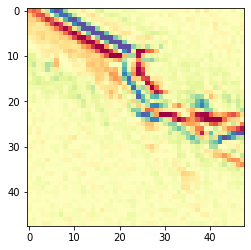

Epoch 214/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3721 - acc: 0.9938 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00214: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6565917053502122, 'val_acc': 0.9816849936932435, 'loss': 0.3720728940254933, 'acc': 0.9938223997138181, 'lr': 1e-30}


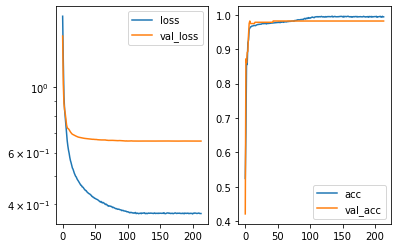

Predicted cell: Cells Probability: [[0.9902575]]
True Cell type: Cells
x [[0.57637227]]
True positional value x 0.7083333333333334
y [[0.32148606]]
True positional value y 0.2916666666666667


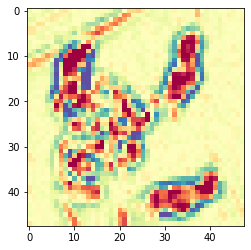

Epoch 215/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9946 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00215: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566239274465121, 'val_acc': 0.9816849936932435, 'loss': 0.37215972096303257, 'acc': 0.9945945997495909, 'lr': 1e-30}


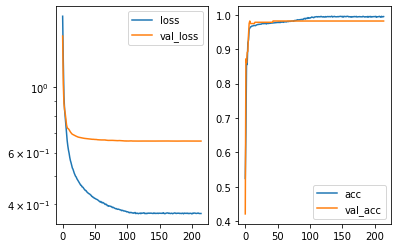

Predicted cell: Cells Probability: [[0.99627244]]
True Cell type: Cells
x [[0.65989375]]
True positional value x 0.5
y [[0.8891952]]
True positional value y 0.7083333333333334


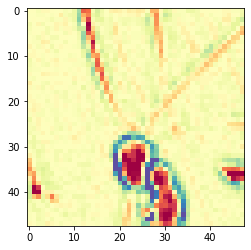

Epoch 216/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9948 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00216: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656590984636174, 'val_acc': 0.9816849936932435, 'loss': 0.3729252834807952, 'acc': 0.9947876497585341, 'lr': 1e-30}


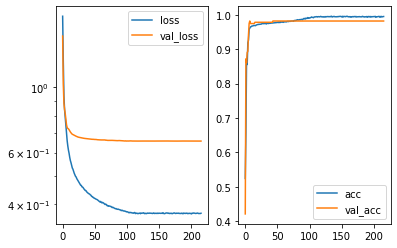

Predicted cell: Cells Probability: [[0.98938227]]
True Cell type: Cells
x [[0.53099155]]
True positional value x 0.5
y [[0.64636004]]
True positional value y 0.7083333333333334


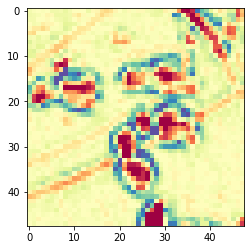

Epoch 217/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3723 - acc: 0.9942 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00217: ReduceLROnPlateau reducing learning rate to 1.000000003171077e-31.

Epoch 00217: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567461645646846, 'val_acc': 0.9816849936932435, 'loss': 0.37230832144100234, 'acc': 0.9942084985810358, 'lr': 1e-30}


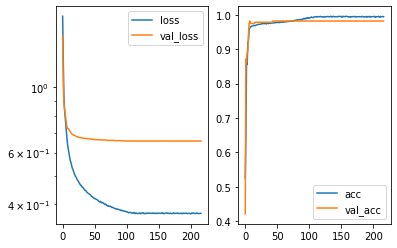

Predicted cell: Cells Probability: [[0.96071976]]
True Cell type: Cells
x [[0.6985138]]
True positional value x 0.7083333333333334
y [[0.29817885]]
True positional value y 0.5


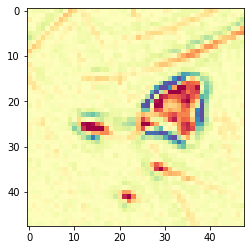

Epoch 218/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3745 - acc: 0.9932 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00218: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567586540302515, 'val_acc': 0.9816849936932435, 'loss': 0.37450477158701095, 'acc': 0.9932432496869886, 'lr': 1e-31}


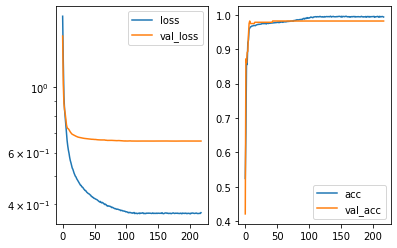

Predicted cell: Cells Probability: [[0.95270896]]
True Cell type: Normal
x [[0.4567555]]
True positional value x 0.5
y [[0.3929281]]
True positional value y 0.5


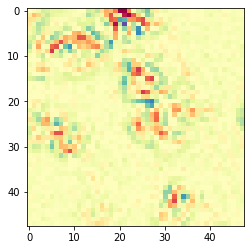

Epoch 219/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9940 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00219: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656911408726549, 'val_acc': 0.9816849936932435, 'loss': 0.37336797891436396, 'acc': 0.9940154485720926, 'lr': 1e-31}


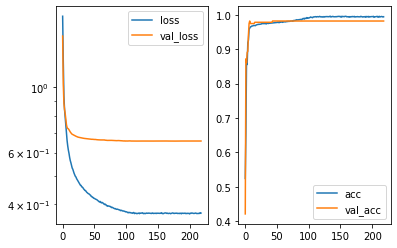

Predicted cell: Cells Probability: [[0.9933693]]
True Cell type: Cells
x [[0.5156145]]
True positional value x 0.2916666666666667
y [[0.3850434]]
True positional value y 0.5


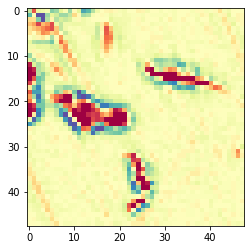

Epoch 220/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3717 - acc: 0.9948 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00220: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567976359045986, 'val_acc': 0.9816849936932435, 'loss': 0.3717282024359611, 'acc': 0.9947876497585341, 'lr': 1e-31}


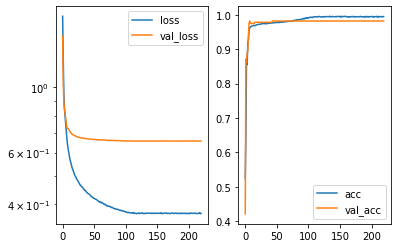

Predicted cell: Cells Probability: [[0.97869325]]
True Cell type: Cells
x [[0.6981525]]
True positional value x 0.7083333333333334
y [[0.7229793]]
True positional value y 0.7083333333333334


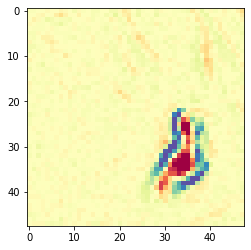

Epoch 221/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3727 - acc: 0.9942 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00221: ReduceLROnPlateau reducing learning rate to 9.999999796611899e-33.

Epoch 00221: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566688566854149, 'val_acc': 0.9816849936932435, 'loss': 0.37269815250253124, 'acc': 0.9942084997317046, 'lr': 1e-31}


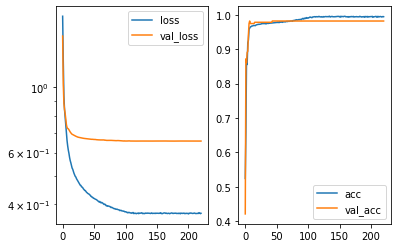

Predicted cell: Cells Probability: [[0.9917031]]
True Cell type: Cells
x [[0.6646541]]
True positional value x 0.5
y [[0.6066203]]
True positional value y 0.7083333333333334


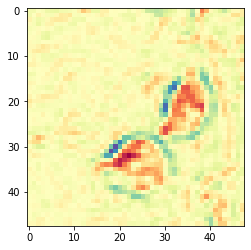

Epoch 222/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9952 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00222: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566974446450398, 'val_acc': 0.9816849936932435, 'loss': 0.373221207884748, 'acc': 0.9951737497764205, 'lr': 9.9999995e-33}


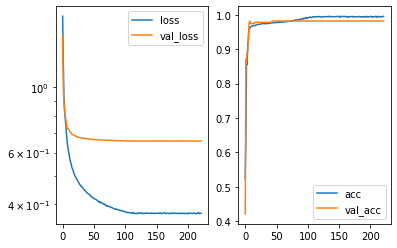

Predicted cell: Cells Probability: [[0.990175]]
True Cell type: Cells
x [[0.17003687]]
True positional value x 0.2916666666666667
y [[0.5462812]]
True positional value y 0.5


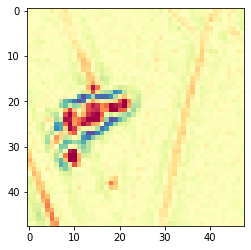

Epoch 223/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3741 - acc: 0.9936 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00223: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566648424326719, 'val_acc': 0.9816849936932435, 'loss': 0.37412647621051687, 'acc': 0.993629349704875, 'lr': 9.9999995e-33}


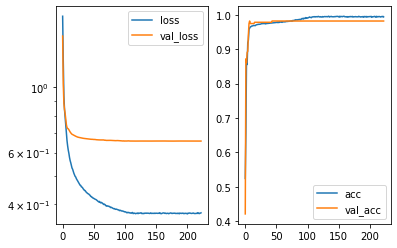

Predicted cell: Cells Probability: [[0.96552193]]
True Cell type: Cells
x [[0.685494]]
True positional value x 0.7083333333333334
y [[0.21409877]]
True positional value y 0.2916666666666667


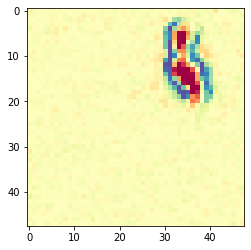

Epoch 224/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9942 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00224: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567779703017993, 'val_acc': 0.9816849936932435, 'loss': 0.3727708653363482, 'acc': 0.9942084997317046, 'lr': 9.9999995e-33}


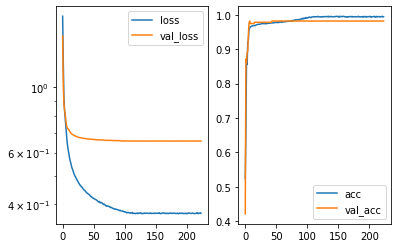

Predicted cell: Normal Probability: [[0.8643346]]
True Cell type: Normal
x [[0.50723666]]
True positional value x 0.5
y [[0.49849808]]
True positional value y 0.5


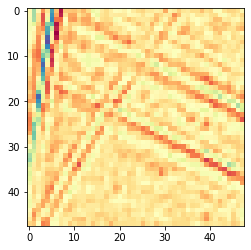

Epoch 225/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3717 - acc: 0.9952 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00225: ReduceLROnPlateau reducing learning rate to 9.999999502738312e-34.

Epoch 00225: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568653494010478, 'val_acc': 0.9816849936932435, 'loss': 0.3717089451878227, 'acc': 0.9951737497764205, 'lr': 9.9999995e-33}


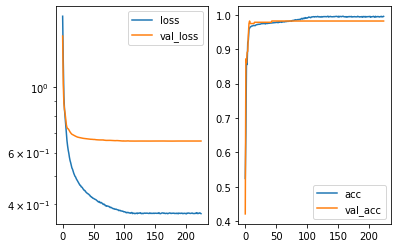

Predicted cell: Cells Probability: [[0.9825075]]
True Cell type: Cells
x [[0.40390065]]
True positional value x 0.2916666666666667
y [[0.7099413]]
True positional value y 0.7083333333333334


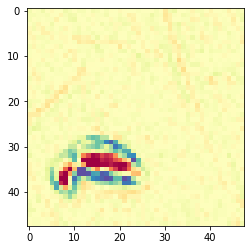

Epoch 226/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9942 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00226: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566615665788615, 'val_acc': 0.9816849936932435, 'loss': 0.373187828133005, 'acc': 0.9942084997317046, 'lr': 9.999999e-34}


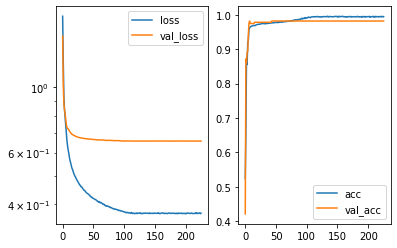

Predicted cell: Cells Probability: [[0.98957205]]
True Cell type: Cells
x [[0.37217087]]
True positional value x 0.5
y [[0.52577937]]
True positional value y 0.5


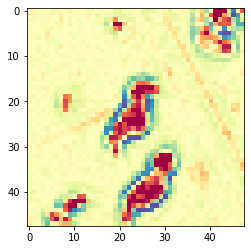

Epoch 227/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3716 - acc: 0.9942 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00227: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567139046969431, 'val_acc': 0.9816849936932435, 'loss': 0.37164901030109654, 'acc': 0.9942084985810358, 'lr': 9.999999e-34}


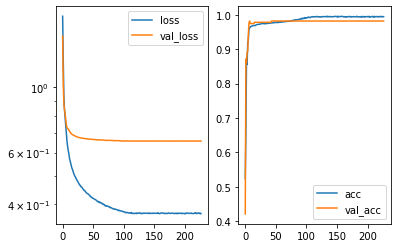

Predicted cell: Cells Probability: [[0.98247004]]
True Cell type: Cells
x [[0.40414858]]
True positional value x 0.2916666666666667
y [[0.7099592]]
True positional value y 0.7083333333333334


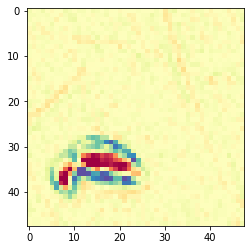

Epoch 228/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3723 - acc: 0.9958 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00228: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567468948853321, 'val_acc': 0.9816849936932435, 'loss': 0.3722598683880103, 'acc': 0.99575289980325, 'lr': 9.999999e-34}


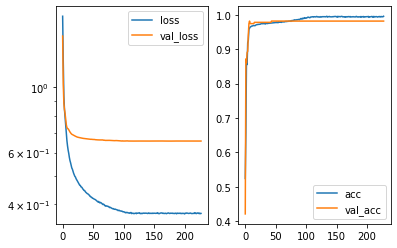

Predicted cell: Normal Probability: [[0.98133045]]
True Cell type: Normal
x [[0.33052644]]
True positional value x 0.5
y [[0.44124475]]
True positional value y 0.5


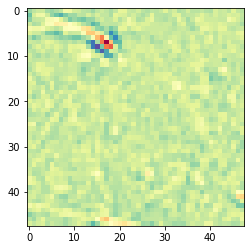

Epoch 229/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9954 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00229: ReduceLROnPlateau reducing learning rate to 9.999999319067318e-35.

Epoch 00229: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566884294971005, 'val_acc': 0.9816849936932435, 'loss': 0.3722220828404298, 'acc': 0.9953667986346948, 'lr': 9.999999e-34}


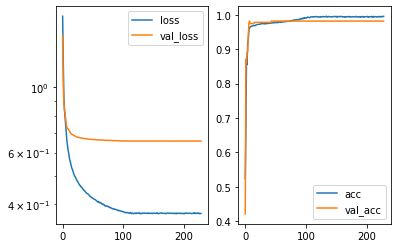

Predicted cell: Normal Probability: [[0.9961241]]
True Cell type: Normal
x [[0.5009952]]
True positional value x 0.5
y [[0.57587796]]
True positional value y 0.5


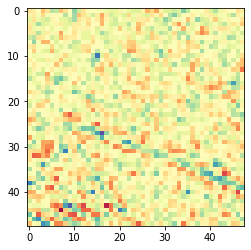

Epoch 230/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3735 - acc: 0.9948 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00230: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568726921256208, 'val_acc': 0.9816849936932435, 'loss': 0.3734701153854606, 'acc': 0.9947876497585341, 'lr': 9.999999e-35}


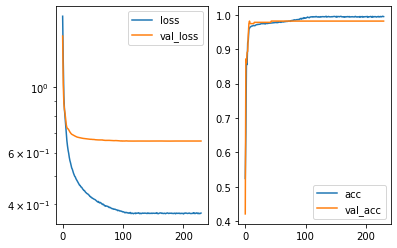

Predicted cell: Cells Probability: [[0.96849334]]
True Cell type: Cells
x [[0.57446015]]
True positional value x 0.5
y [[0.3307946]]
True positional value y 0.2916666666666667


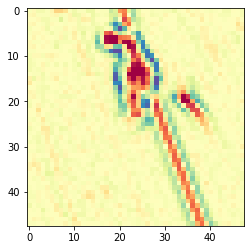

Epoch 231/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3725 - acc: 0.9944 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00231: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567773668320624, 'val_acc': 0.9816849936932435, 'loss': 0.37246308110395454, 'acc': 0.9944015485899789, 'lr': 9.999999e-35}


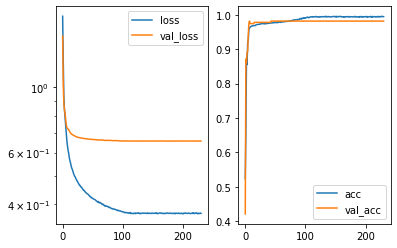

Predicted cell: Normal Probability: [[0.9657786]]
True Cell type: Normal
x [[0.43418992]]
True positional value x 0.5
y [[0.57014483]]
True positional value y 0.5


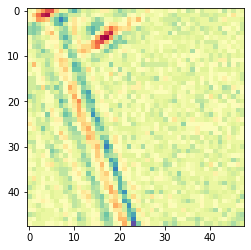

Epoch 232/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3738 - acc: 0.9938 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00232: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568005464889191, 'val_acc': 0.9816849936932435, 'loss': 0.3737552073931602, 'acc': 0.9938223985631494, 'lr': 9.999999e-35}


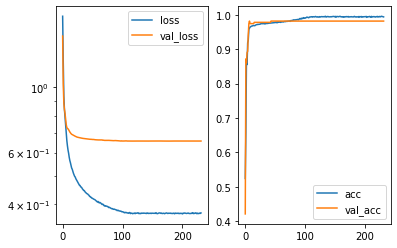

Predicted cell: Cells Probability: [[0.9946465]]
True Cell type: Cells
x [[0.81217015]]
True positional value x 0.7083333333333334
y [[0.21793929]]
True positional value y 0.2916666666666667


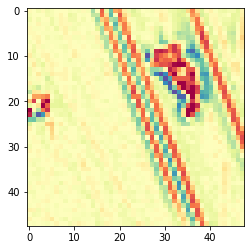

Epoch 233/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9936 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00233: ReduceLROnPlateau reducing learning rate to 9.999999319067319e-36.

Epoch 00233: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568154439384684, 'val_acc': 0.9816849936932435, 'loss': 0.37308081363158796, 'acc': 0.993629349704875, 'lr': 9.999999e-35}


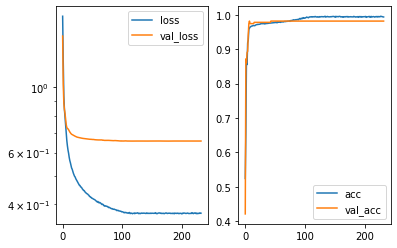

Predicted cell: Cells Probability: [[0.9988201]]
True Cell type: Cells
x [[0.49836847]]
True positional value x 0.7083333333333334
y [[0.87212396]]
True positional value y 0.7083333333333334


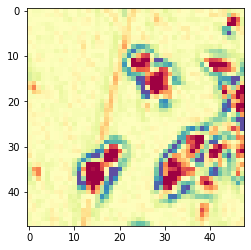

Epoch 234/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3721 - acc: 0.9946 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00234: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569060233486441, 'val_acc': 0.9816849936932435, 'loss': 0.37214178203615905, 'acc': 0.9945945997495909, 'lr': 9.9999995e-36}


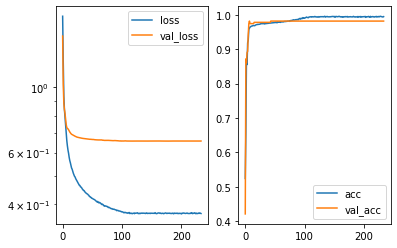

Predicted cell: Cells Probability: [[0.9802995]]
True Cell type: Cells
x [[0.4837993]]
True positional value x 0.5
y [[0.5292508]]
True positional value y 0.7083333333333334


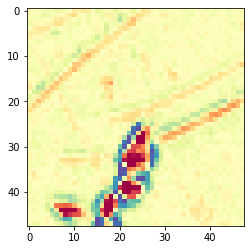

Epoch 235/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3724 - acc: 0.9934 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00235: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568835777240795, 'val_acc': 0.9816849936932435, 'loss': 0.3723816900409787, 'acc': 0.9934362996959318, 'lr': 9.9999995e-36}


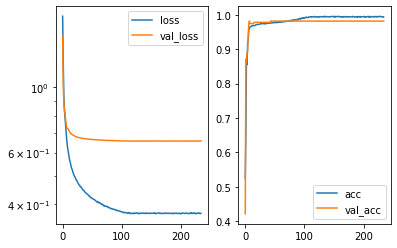

Predicted cell: Cells Probability: [[0.9944072]]
True Cell type: Cells
x [[0.543694]]
True positional value x 0.5
y [[0.5121808]]
True positional value y 0.5


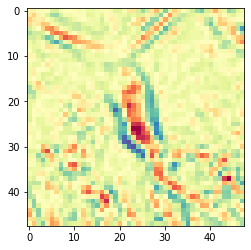

Epoch 236/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9946 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00236: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567176923210367, 'val_acc': 0.9816849936932435, 'loss': 0.3730851884744342, 'acc': 0.9945945997495909, 'lr': 9.9999995e-36}


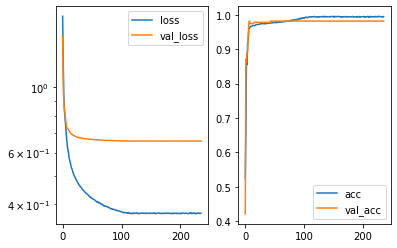

Predicted cell: Cells Probability: [[0.99832255]]
True Cell type: Cells
x [[0.34214017]]
True positional value x 0.2916666666666667
y [[0.68493396]]
True positional value y 0.5


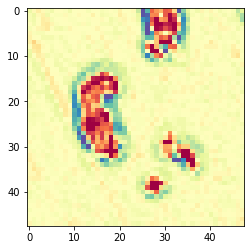

Epoch 237/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3754 - acc: 0.9927 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00237: ReduceLROnPlateau reducing learning rate to 9.999999462560281e-37.

Epoch 00237: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566879059368874, 'val_acc': 0.9816849936932435, 'loss': 0.375358860695224, 'acc': 0.9926640973588214, 'lr': 9.9999995e-36}


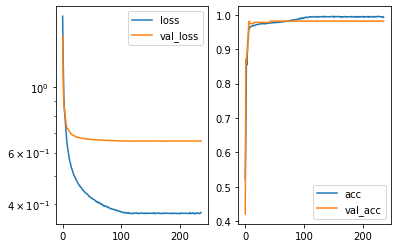

Predicted cell: Cells Probability: [[0.71959263]]
True Cell type: Normal
x [[0.48835325]]
True positional value x 0.5
y [[0.6002802]]
True positional value y 0.5


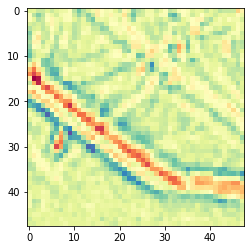

Epoch 238/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3722 - acc: 0.9946 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00238: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566450803271143, 'val_acc': 0.9816849936932435, 'loss': 0.3722255109129725, 'acc': 0.9945945997495909, 'lr': 9.9999995e-37}


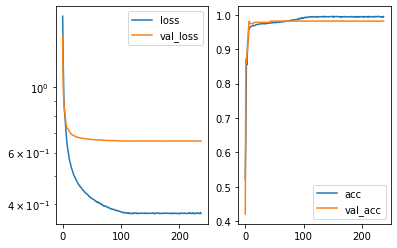

Predicted cell: Cells Probability: [[0.9816219]]
True Cell type: Cells
x [[0.52982706]]
True positional value x 0.5
y [[0.58584917]]
True positional value y 0.2916666666666667


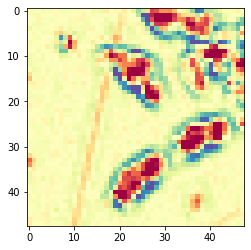

Epoch 239/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3732 - acc: 0.9938 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00239: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566547450128493, 'val_acc': 0.9816849936932435, 'loss': 0.3731907202240123, 'acc': 0.9938223997138181, 'lr': 9.9999995e-37}


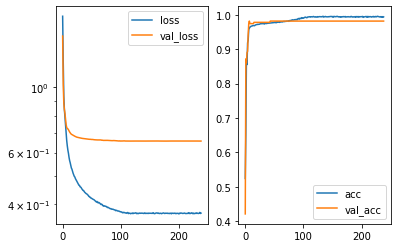

Predicted cell: Cells Probability: [[0.986565]]
True Cell type: Cells
x [[0.3126596]]
True positional value x 0.2916666666666667
y [[0.17989276]]
True positional value y 0.2916666666666667


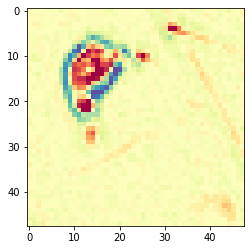

Epoch 240/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9946 - val_loss: 0.6567 - val_acc: 0.9817

Epoch 00240: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567208734187451, 'val_acc': 0.9816849936932435, 'loss': 0.37277885972302854, 'acc': 0.9945945997495909, 'lr': 9.9999995e-37}


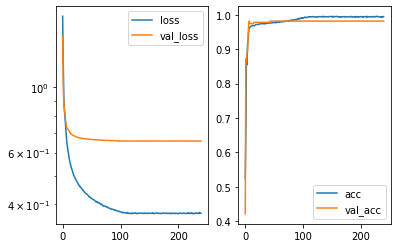

Predicted cell: Cells Probability: [[0.9974675]]
True Cell type: Cells
x [[0.6851122]]
True positional value x 0.7083333333333334
y [[0.62374854]]
True positional value y 0.7083333333333334


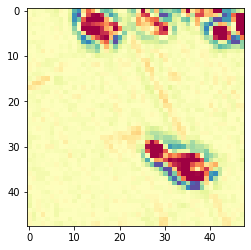

Epoch 241/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3723 - acc: 0.9954 - val_loss: 0.6566 - val_acc: 0.9817

Epoch 00241: ReduceLROnPlateau reducing learning rate to 9.99999946256028e-38.

Epoch 00241: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6566419341625311, 'val_acc': 0.9816849936932435, 'loss': 0.37231900344484103, 'acc': 0.9953667997853636, 'lr': 9.9999995e-37}


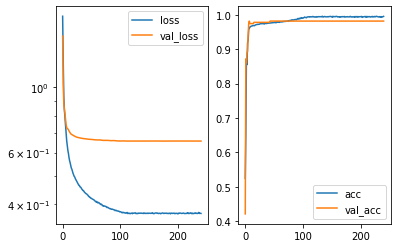

Predicted cell: Cells Probability: [[0.93963593]]
True Cell type: Cells
x [[0.30106482]]
True positional value x 0.2916666666666667
y [[0.7103101]]
True positional value y 0.7083333333333334


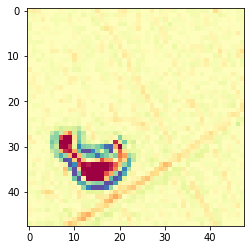

Epoch 242/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3743 - acc: 0.9936 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00242: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567965200095823, 'val_acc': 0.9816849936932435, 'loss': 0.3742972413315276, 'acc': 0.993629349704875, 'lr': 1e-37}


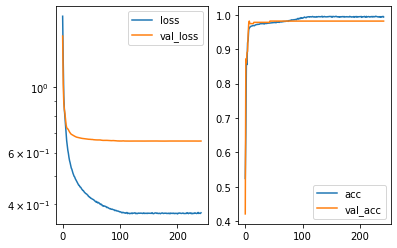

Predicted cell: Normal Probability: [[0.9868615]]
True Cell type: Normal
x [[0.60116684]]
True positional value x 0.5
y [[0.5677408]]
True positional value y 0.5


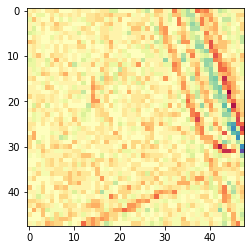

Epoch 243/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3717 - acc: 0.9961 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00243: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567795763522277, 'val_acc': 0.9816849936932435, 'loss': 0.371692105609938, 'acc': 0.9961389998211364, 'lr': 1e-37}


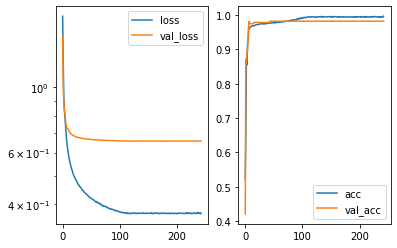

Predicted cell: Cells Probability: [[0.99614537]]
True Cell type: Cells
x [[0.3158446]]
True positional value x 0.2916666666666667
y [[0.6675228]]
True positional value y 0.7083333333333334


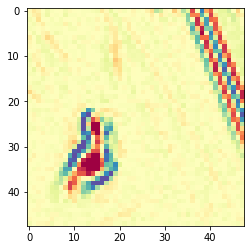

Epoch 244/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3720 - acc: 0.9942 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00244: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.656856677252731, 'val_acc': 0.9816849936932435, 'loss': 0.3719744465986274, 'acc': 0.9942084997317046, 'lr': 1e-37}


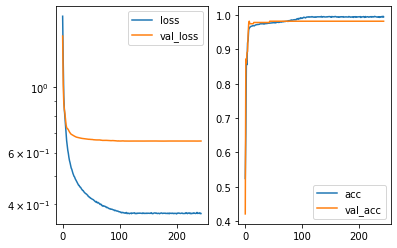

Predicted cell: Cells Probability: [[0.9936094]]
True Cell type: Cells
x [[0.6943264]]
True positional value x 0.7083333333333334
y [[0.17100775]]
True positional value y 0.5


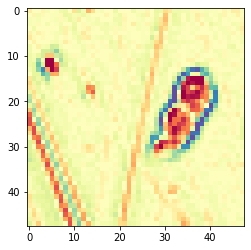

Epoch 245/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3728 - acc: 0.9934 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00245: ReduceLROnPlateau reducing learning rate to 9.99999991097579e-39.

Epoch 00245: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568896294513464, 'val_acc': 0.9816849936932435, 'loss': 0.37277679254649687, 'acc': 0.9934362985452629, 'lr': 1e-37}


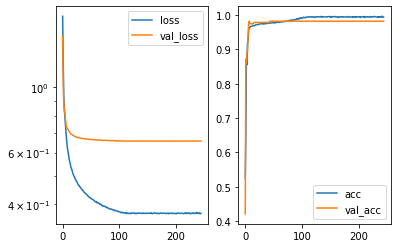

Predicted cell: Cells Probability: [[0.97037965]]
True Cell type: Cells
x [[0.48334327]]
True positional value x 0.5
y [[0.62076783]]
True positional value y 0.5


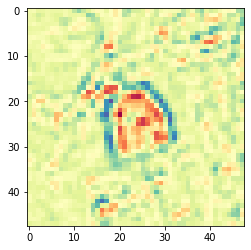

Epoch 246/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3729 - acc: 0.9938 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00246: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567507373107658, 'val_acc': 0.9816849936932435, 'loss': 0.37286677197139695, 'acc': 0.9938223985631494, 'lr': 1e-38}


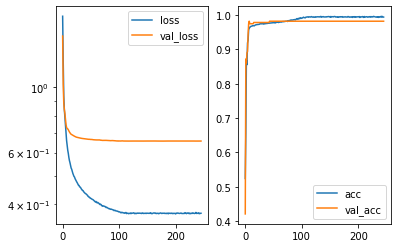

Predicted cell: Cells Probability: [[0.98476195]]
True Cell type: Cells
x [[0.5065232]]
True positional value x 0.5
y [[0.64969116]]
True positional value y 0.5


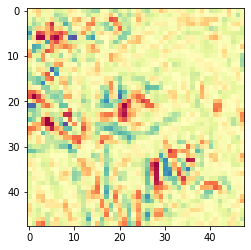

Epoch 247/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3731 - acc: 0.9940 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00247: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568964324591361, 'val_acc': 0.9816849936932435, 'loss': 0.37314414713373517, 'acc': 0.9940154497227613, 'lr': 1e-38}


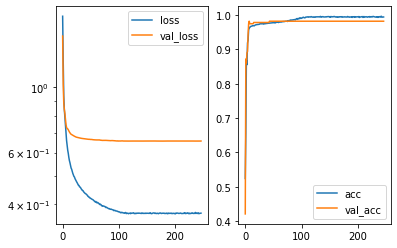

Predicted cell: Cells Probability: [[0.9983266]]
True Cell type: Cells
x [[0.3424564]]
True positional value x 0.2916666666666667
y [[0.68417454]]
True positional value y 0.5


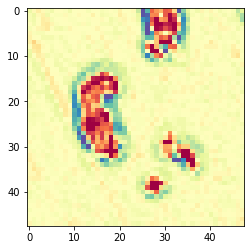

Epoch 248/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3733 - acc: 0.9942 - val_loss: 0.6570 - val_acc: 0.9817

Epoch 00248: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6569751557849702, 'val_acc': 0.9816849936932435, 'loss': 0.37328299477293686, 'acc': 0.9942084997317046, 'lr': 1e-38}


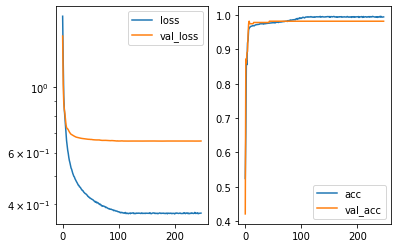

Predicted cell: Cells Probability: [[0.9877458]]
True Cell type: Cells
x [[0.47790495]]
True positional value x 0.5
y [[0.20190923]]
True positional value y 0.2916666666666667


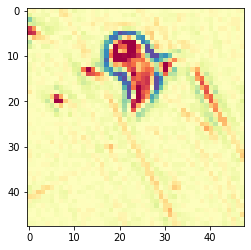

Epoch 249/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3726 - acc: 0.9944 - val_loss: 0.6568 - val_acc: 0.9817

Epoch 00249: ReduceLROnPlateau reducing learning rate to 9.999999350456405e-40.

Epoch 00249: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6567860549186175, 'val_acc': 0.9816849936932435, 'loss': 0.37256001022331503, 'acc': 0.9944015497406478, 'lr': 1e-38}


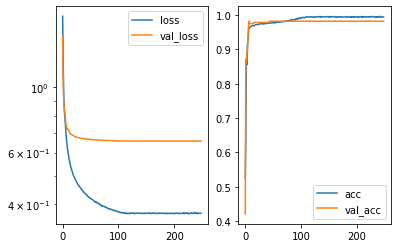

Predicted cell: Cells Probability: [[0.97767025]]
True Cell type: Cells
x [[0.29155526]]
True positional value x 0.5
y [[0.358248]]
True positional value y 0.2916666666666667


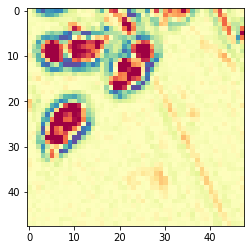

Epoch 250/250
5180/5180 [==============================] - 6s 1ms/step - loss: 0.3734 - acc: 0.9938 - val_loss: 0.6569 - val_acc: 0.9817

Epoch 00250: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.6568888386527261, 'val_acc': 0.9816849936932435, 'loss': 0.3734235862507323, 'acc': 0.9938223997138181, 'lr': 1e-39}


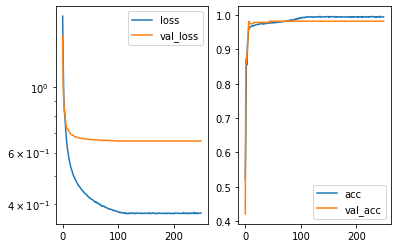

Predicted cell: Cells Probability: [[0.9632076]]
True Cell type: Cells
x [[0.7001126]]
True positional value x 0.7083333333333334
y [[0.44989517]]
True positional value y 0.2916666666666667


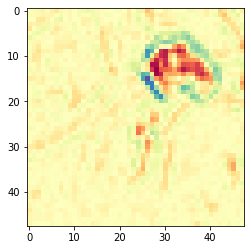

In [5]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
